# **결론: 도루 능력이 높은 타자가 앞선 타순에 배치되면, 뒤 타자의 타율이 증가한다**

# 라이브러리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc, rcParams
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind
import matplotlib.font_manager as fm
from matplotlib import rc
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
from matplotlib.colors import to_rgba
import matplotlib.patches as mpatches
from matplotlib import font_manager, rc, rcParams

In [ ]:
# 1. 폰트 업로드
from google.colab import files
uploaded = files.upload()

Saving KBO Dia Gothic_bold.ttf to KBO Dia Gothic_bold.ttf


Uploaded file: KBO Dia Gothic_bold.ttf
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


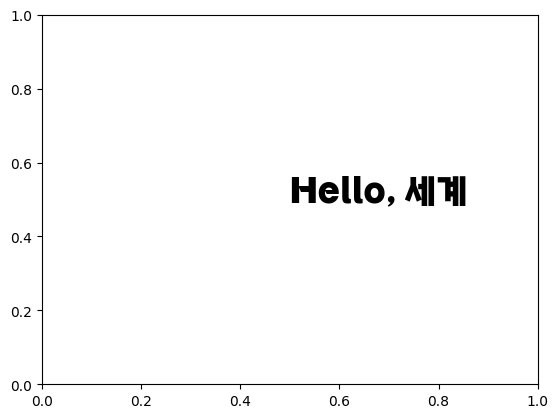

In [ ]:
import os
import shutil

# 2. 업로드된 파일 확인 및 이동
for file_name in uploaded.keys():
    print(f"Uploaded file: {file_name}")
    # 업로드된 파일이 현재 작업 디렉토리에 있는지 확인
    if os.path.exists(file_name):
        # 파일 이동
        new_path = f'/usr/share/fonts/truetype/{file_name.replace(" ", "_")}'
        shutil.move(file_name, new_path)
    else:
        print(f"File {file_name} not found in the current directory")

# 3. 폰트 캐시 리빌드
!fc-cache -fv

# 4. 폰트 사용 예제
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 업로드된 파일 중 하나의 경로를 설정
font_path = new_path
font_prop = FontProperties(fname=font_path)

plt.text(0.5, 0.5, 'Hello, 세계', fontproperties=font_prop, fontsize=24)
plt.show()

In [ ]:
# 업로드된 파일 이동 및 폰트 경로 설정
uploaded = {'KBO Dia Gothic_bold.ttf': 'KBO Dia Gothic_bold.ttf'}  # 예시 딕셔너리
for file_name in uploaded.keys():
    if os.path.exists(file_name):
        new_path = f'/usr/share/fonts/truetype/{file_name.replace(" ", "_")}'
        shutil.move(file_name, new_path)
        font_path = new_path
    else:
        print(f"File {file_name} not found in the current directory")

# 폰트 캐시 리빌드
!fc-cache -fv

File KBO Dia Gothic_bold.ttf not found in the current directory
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 1 fonts, 2 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
# 폰트 속성 설정
font_prop = FontProperties(fname=font_path)

# 두산

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_2023.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_batting_order_2023.csv', encoding='cp949')

In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

doosan_2023 = df4.merge(df3_run, on='선수명')
doosan_2023

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,박준영,두산,1.000,1,1,0,0,0,0,0,0,0,0,1번,2,1,66.7
1,박준영,두산,0.000,3,0,0,0,0,0,0,0,0,0,2번,2,1,66.7
2,박준영,두산,0.500,2,1,0,0,0,0,0,0,0,0,5번,2,1,66.7
3,박준영,두산,0.000,4,0,0,0,0,0,0,0,1,0,6번,2,1,66.7
4,박준영,두산,0.154,52,8,3,0,1,2,3,0,25,0,7번,2,1,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,서예일,두산,0.222,9,2,0,0,0,1,0,0,2,0,하위(6~9번),0,0,-
250,박유연,두산,0.267,15,4,2,0,0,1,0,0,4,0,8번,0,0,-
251,박유연,두산,0.267,15,4,2,0,0,1,0,0,4,0,하위(6~9번),0,0,-
252,권민석,두산,0.000,2,0,0,0,0,0,0,0,1,0,9번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
doosan_2023['타율'] = pd.to_numeric(doosan_2023['타율'], errors='coerce')
doosan_2023['도루성공률'] = pd.to_numeric(doosan_2023['도루성공률'], errors='coerce')

doosan_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
doosan_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     254 non-null    object 
 1   팀명      254 non-null    object 
 2   타율      249 non-null    float64
 3   타수      254 non-null    int64  
 4   타점      254 non-null    int64  
 5   타순      254 non-null    object 
 6   도루허용    254 non-null    int64  
 7   도루저지    254 non-null    int64  
 8   도루성공률   235 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 18.0+ KB


In [ ]:
table = doosan_2023[doosan_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2023[doosan_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2023[doosan_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(58, 9) (79, 9) (117, 9)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(56, 9)

In [ ]:
table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_3 = table.nlargest(30, '타율')
center_4 = center.nlargest(30, '도루성공률')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.7676693881545721, p-value: 7.471054665902745e-09

상관계수: 0.48179874665336253, p-value: 0.007020132073266872

상관계수: -0.5753060934859722, p-value: 0.0008812427924071882


<Figure size 2000x600 with 0 Axes>

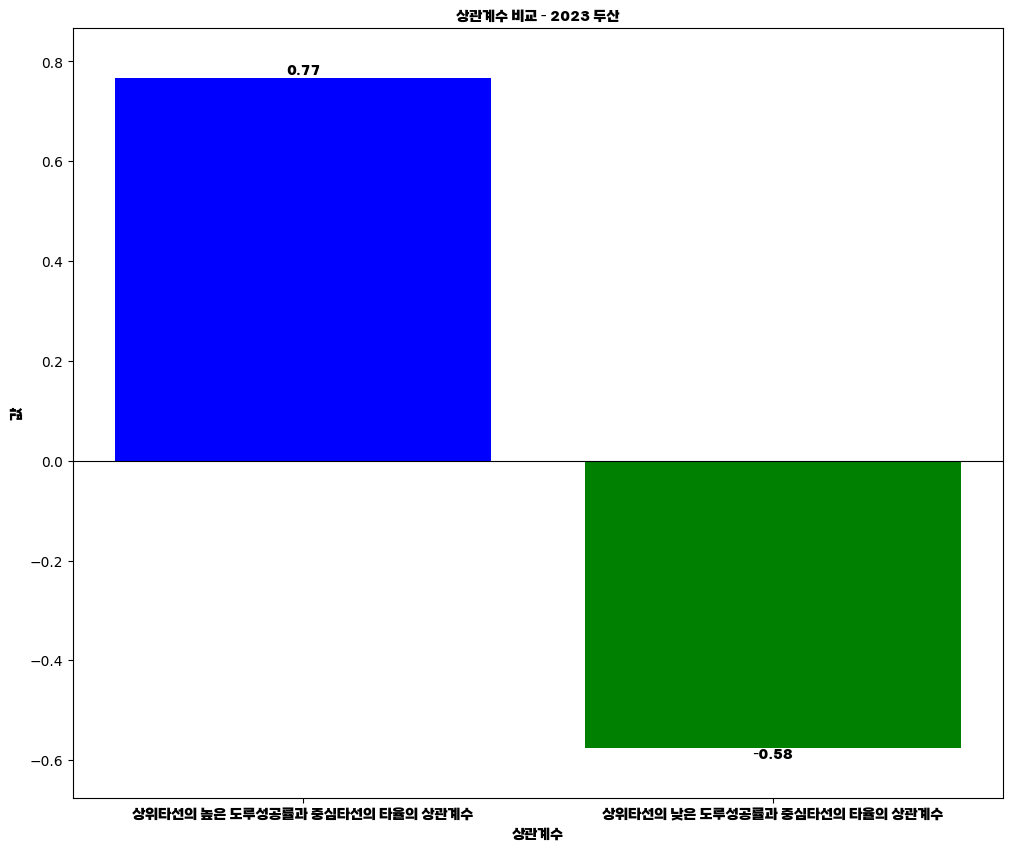

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 두산', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom',fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top',fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_2022.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_batting_order_2022.csv', encoding='cp949')

df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

doosan_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
doosan_2022['타율'] = pd.to_numeric(doosan_2022['타율'], errors='coerce')
doosan_2022['도루성공률'] = pd.to_numeric(doosan_2022['도루성공률'], errors='coerce')

doosan_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
doosan_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     264 non-null    object 
 1   팀명      264 non-null    object 
 2   타율      261 non-null    float64
 3   타수      264 non-null    int64  
 4   타점      264 non-null    int64  
 5   타순      264 non-null    object 
 6   도루허용    264 non-null    int64  
 7   도루저지    264 non-null    int64  
 8   도루성공률   174 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 18.7+ KB


In [ ]:
able = doosan_2022[doosan_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2022[doosan_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2022[doosan_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(56, 9) (72, 9) (130, 9)


In [ ]:
table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(30, '타율')
center_4 = center.nlargest(30, '도루성공률')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.8943627635856242, p-value: 2.7374032268575683e-11

상관계수: 0.5158886309317103, p-value: 0.0035224153765871244

상관계수: -0.6313675089584918, p-value: 0.00018302492922820775


<Figure size 2000x600 with 0 Axes>

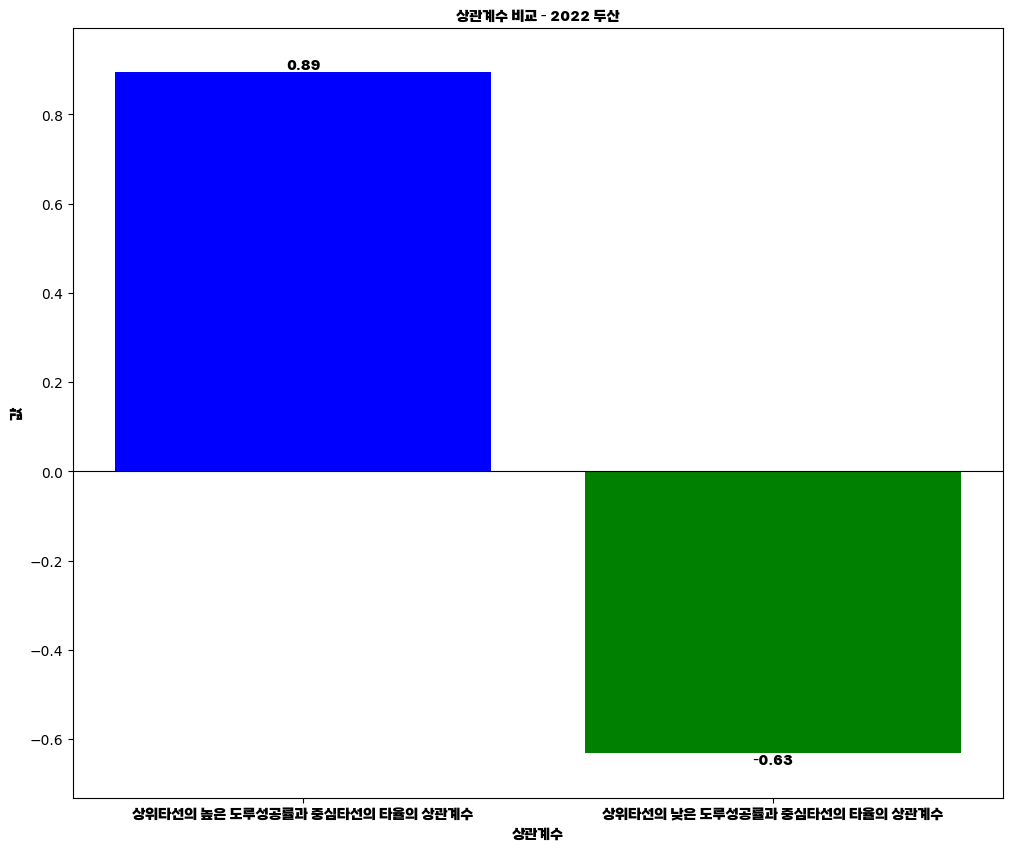

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 두산',fontproperties=font_prop)
plt.xlabel('상관계수',fontproperties=font_prop)
plt.ylabel('값',fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom',fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top',fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_2021.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_batting_order_2021.csv', encoding='cp949')

df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

doosan_2021 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
doosan_2021['타율'] = pd.to_numeric(doosan_2021['타율'], errors='coerce')
doosan_2021['도루성공률'] = pd.to_numeric(doosan_2021['도루성공률'], errors='coerce')


doosan_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
doosan_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     232 non-null    object 
 1   팀명      232 non-null    object 
 2   타율      228 non-null    float64
 3   타수      232 non-null    int64  
 4   타점      232 non-null    int64  
 5   타순      232 non-null    object 
 6   도루허용    232 non-null    int64  
 7   도루저지    232 non-null    int64  
 8   도루성공률   162 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 16.4+ KB


In [ ]:
able = doosan_2021[doosan_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2021[doosan_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2021[doosan_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(30, '타율')
center_4 = center.nlargest(30, '도루성공률')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(56, 9) (69, 9) (104, 9)
상관계수: 0.8777768267135184, p-value: 1.8969174803155373e-10

상관계수: 0.7079431727522263, p-value: 1.2084301758326161e-05

상관계수: -0.6053393391479215, p-value: 0.0003937642968590187


<Figure size 2000x600 with 0 Axes>

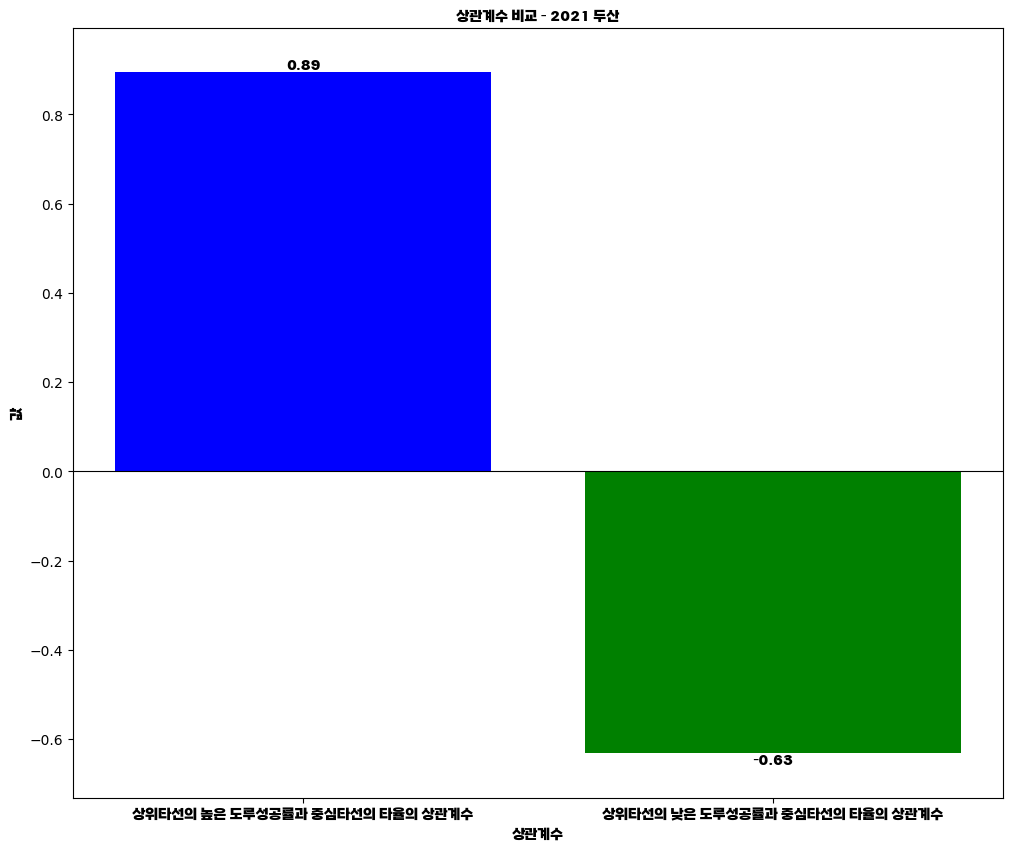

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 두산',fontproperties=font_prop)
plt.xlabel('상관계수',fontproperties=font_prop)
plt.ylabel('값',fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom',fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top',fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_batting_order_2020.csv', encoding='cp949')

df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

doosan_2020 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
doosan_2020['타율'] = pd.to_numeric(doosan_2020['타율'], errors='coerce')
doosan_2020['도루성공률'] = pd.to_numeric(doosan_2020['도루성공률'], errors='coerce')

doosan_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
doosan_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     220 non-null    object 
 1   팀명      220 non-null    object 
 2   타율      217 non-null    float64
 3   타수      220 non-null    int64  
 4   타점      220 non-null    int64  
 5   타순      220 non-null    object 
 6   도루허용    220 non-null    int64  
 7   도루저지    220 non-null    int64  
 8   도루성공률   144 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 15.6+ KB


In [ ]:
table = doosan_2020[doosan_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2020[doosan_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2020[doosan_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(47, 9) (68, 9) (105, 9)
상관계수: 0.817344603184077, p-value: 3.5491192080511506e-08

상관계수: 0.7632572738481307, p-value: 9.04619655609996e-05

상관계수: -0.7883314525456191, p-value: 2.3056867609187522e-07


<Figure size 2000x600 with 0 Axes>

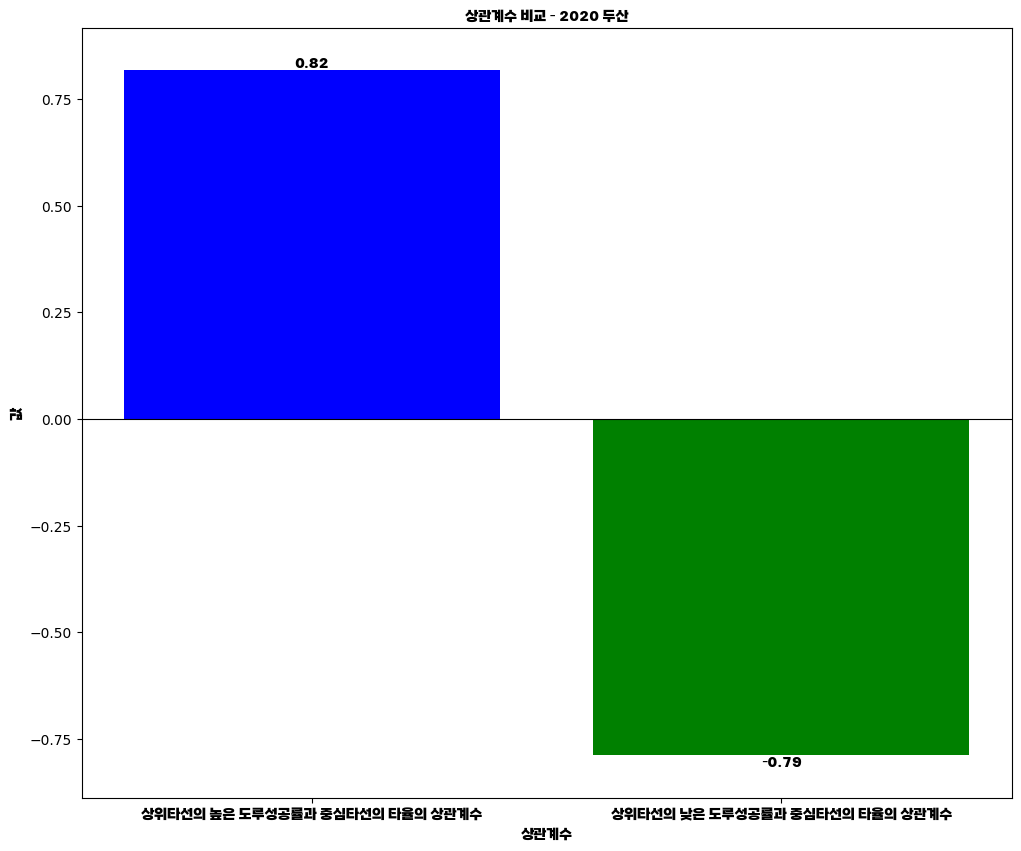

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 두산', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_2019.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/두산/doosan_batting_order_2019.csv', encoding='cp949')

df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

doosan_2019 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
doosan_2019['타율'] = pd.to_numeric(doosan_2019['타율'], errors='coerce')
doosan_2019['도루성공률'] = pd.to_numeric(doosan_2019['도루성공률'], errors='coerce')

doosan_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
doosan_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     213 non-null    object 
 1   팀명      213 non-null    object 
 2   타율      209 non-null    float64
 3   타수      213 non-null    int64  
 4   타점      213 non-null    int64  
 5   타순      213 non-null    object 
 6   도루허용    213 non-null    int64  
 7   도루저지    213 non-null    int64  
 8   도루성공률   139 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 15.1+ KB


In [ ]:
table = doosan_2019[doosan_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2019[doosan_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2019[doosan_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(31, 9) (63, 9) (101, 9)
상관계수: 0.7255632104302123, p-value: 0.0002938291047839211

상관계수: 0.7632572738481307, p-value: 9.04619655609996e-05

상관계수: -0.9392214035088456, p-value: 1.5815920481593655e-14


<Figure size 2000x600 with 0 Axes>

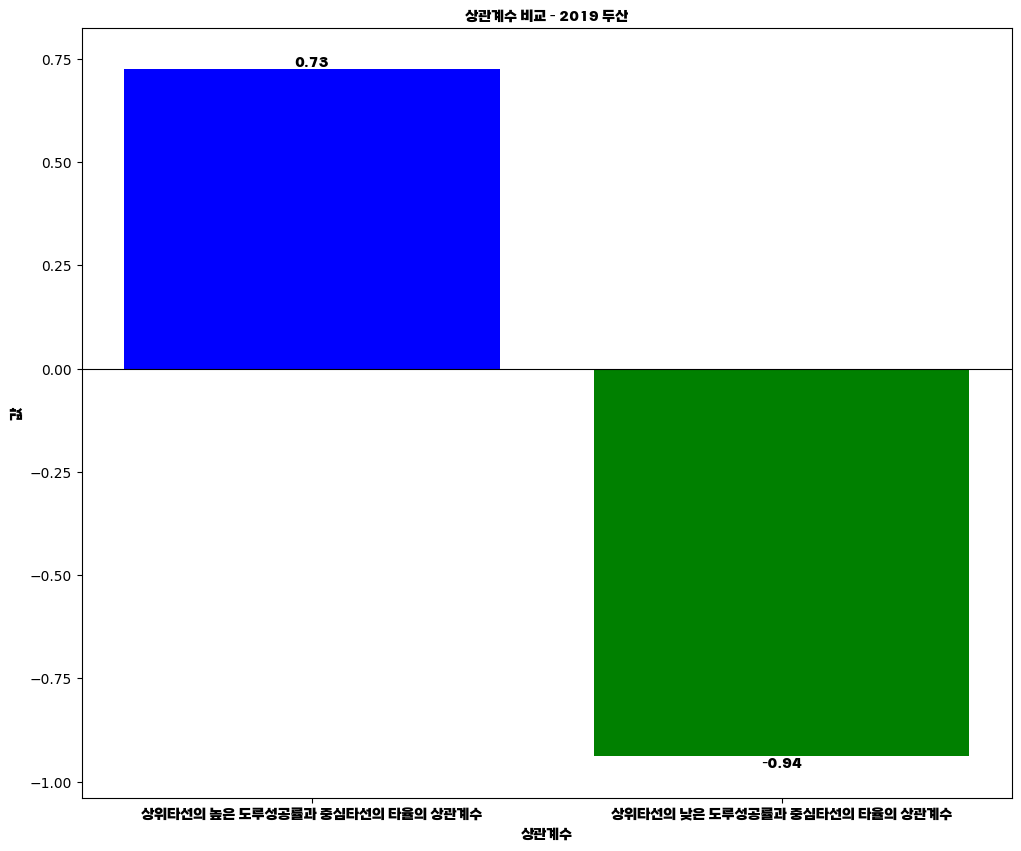

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 두산', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

In [ ]:
correlation_mean1 = (0.77+0.76+0.71+0.82+0.68)/5
correlation_mean2 = (0.55+0.55+0.47+0.52+0.48)/5

<Figure size 2000x600 with 0 Axes>

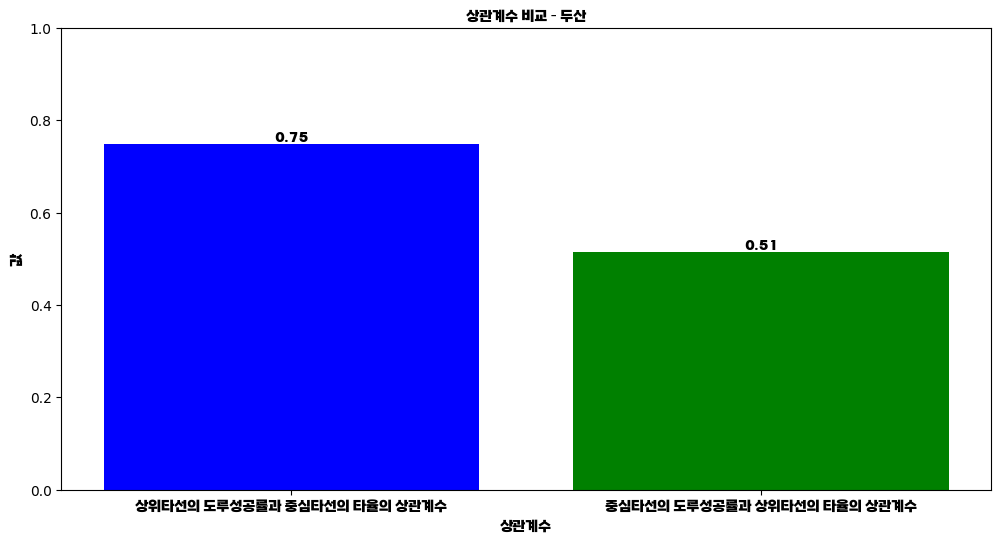

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 도루성공률과 중심타선의 타율의 상관계수', '중심타선의 도루성공률과 상위타선의 타율의 상관계수']
correlation_values = [correlation_mean1, correlation_mean2]

plt.figure(figsize=(12, 6))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 두산',fontproperties=font_prop)
plt.xlabel('상관계수',fontproperties=font_prop)
plt.ylabel('값',fontproperties=font_prop)
plt.ylim(0, 1)
plt.text(0, correlation_mean1, f'{correlation_mean1:.2f}', ha='center', va='bottom',fontproperties=font_prop)
plt.text(1, correlation_mean2, f'{correlation_mean2:.2f}', ha='center', va='bottom',fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)

plt.show()

# 롯데

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_2023.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_batting_order_2023.csv', encoding='cp949')

In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

lotte_2023 = df4.merge(df3_run, on='선수명')
lotte_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,노진혁,롯데,1.0,1,1,0,0,0,0,0,0,0,0,1번,7,2,77.8
1,3,노진혁,롯데,0.4,5,2,1,0,0,2,1,0,2,0,2번,7,2,77.8
2,8,노진혁,롯데,0.238,21,5,3,0,0,4,4,0,5,0,5번,7,2,77.8
3,14,노진혁,롯데,0.257,136,35,9,0,3,16,12,2,32,1,6번,7,2,77.8
4,13,노진혁,롯데,0.216,88,19,6,1,1,14,11,1,24,2,7번,7,2,77.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,20,윤수녕,롯데,0.0,3,0,0,0,0,0,0,0,1,0,9번,0,0,-
265,1,윤수녕,롯데,1.000,1,1,0,0,0,1,0,0,0,0,중심(3~5번),0,0,-
266,26,윤수녕,롯데,0.0,3,0,0,0,0,0,0,0,1,0,하위(6~9번),0,0,-
267,19,박형준,롯데,0.0,1,0,0,0,0,0,0,0,1,0,8번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lotte_2023['타율'] = pd.to_numeric(lotte_2023['타율'], errors='coerce')
lotte_2023['도루성공률'] = pd.to_numeric(lotte_2023['도루성공률'], errors='coerce')

lotte_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lotte_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      269 non-null    int64  
 1   선수명     269 non-null    object 
 2   팀명      269 non-null    object 
 3   타율      266 non-null    float64
 4   타수      269 non-null    int64  
 5   타점      269 non-null    int64  
 6   타순      269 non-null    object 
 7   도루허용    269 non-null    int64  
 8   도루저지    269 non-null    int64  
 9   도루성공률   205 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 21.1+ KB


In [ ]:
table = lotte_2023[lotte_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lotte_2023[lotte_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lotte_2023[lotte_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(64, 10) (86, 10) (119, 10)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(50, 10)

In [ ]:
table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')


table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.6285425082403102, p-value: 0.00019955766840641618

상관계수: -0.8746217462866533, p-value: 4.573207441427957e-07


<Figure size 2000x600 with 0 Axes>

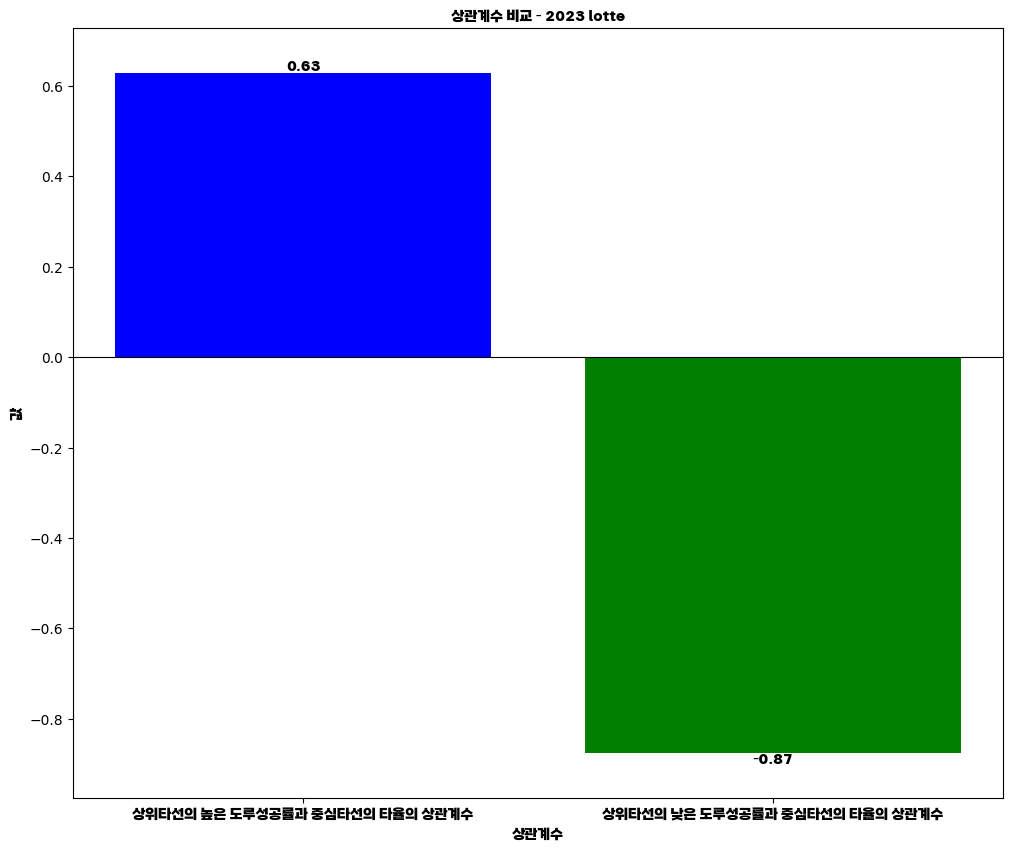

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 lotte',fontproperties=font_prop)
plt.xlabel('상관계수',fontproperties=font_prop)
plt.ylabel('값',fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom',fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top',fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_2022.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

lotte_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lotte_2022['타율'] = pd.to_numeric(lotte_2022['타율'], errors='coerce')
lotte_2022['도루성공률'] = pd.to_numeric(lotte_2022['도루성공률'], errors='coerce')

lotte_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lotte_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      248 non-null    int64  
 1   선수명     248 non-null    object 
 2   팀명      248 non-null    object 
 3   타율      243 non-null    float64
 4   타수      248 non-null    int64  
 5   타점      248 non-null    int64  
 6   타순      248 non-null    object 
 7   도루허용    248 non-null    int64  
 8   도루저지    248 non-null    int64  
 9   도루성공률   187 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 19.5+ KB


In [ ]:
able = lotte_2022[lotte_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lotte_2022[lotte_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lotte_2022[lotte_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(50, 10) (70, 10) (121, 10)


In [ ]:
table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.7486734162979485, p-value: 2.7716871677348397e-08

상관계수: -0.9522833513818434, p-value: 5.79724320229369e-16


<Figure size 2000x600 with 0 Axes>

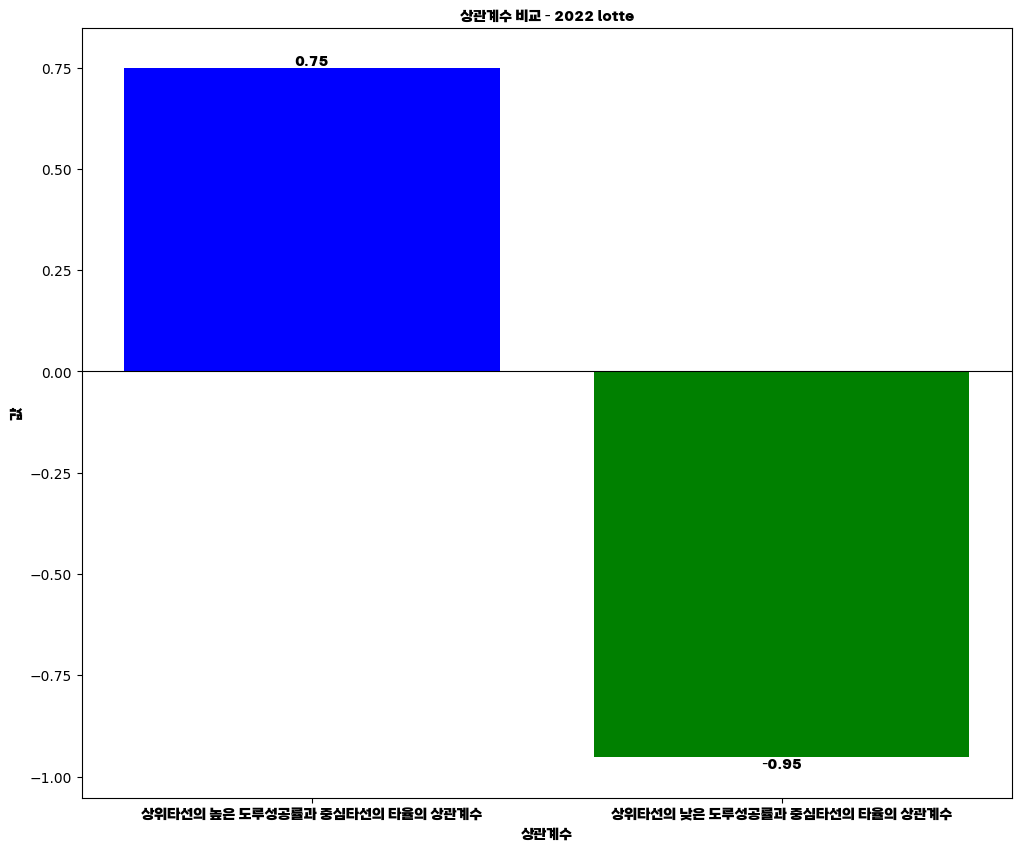

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 lotte', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_batting_order_2021.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

lotte_2021 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lotte_2021['타율'] = pd.to_numeric(lotte_2021['타율'], errors='coerce')
lotte_2021['도루성공률'] = pd.to_numeric(lotte_2021['도루성공률'], errors='coerce')


lotte_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lotte_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      232 non-null    int64  
 1   선수명     232 non-null    object 
 2   팀명      232 non-null    object 
 3   타율      225 non-null    float64
 4   타수      232 non-null    int64  
 5   타점      232 non-null    int64  
 6   타순      232 non-null    object 
 7   도루허용    232 non-null    int64  
 8   도루저지    232 non-null    int64  
 9   도루성공률   159 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 18.2+ KB


In [ ]:
able = lotte_2021[lotte_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lotte_2021[lotte_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lotte_2021[lotte_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(50, 10) (70, 10) (113, 10)
상관계수: 0.7791212266690897, p-value: 3.188887499285529e-09

상관계수: -0.9391910636570301, p-value: 1.5923799259910004e-14


<Figure size 2000x600 with 0 Axes>

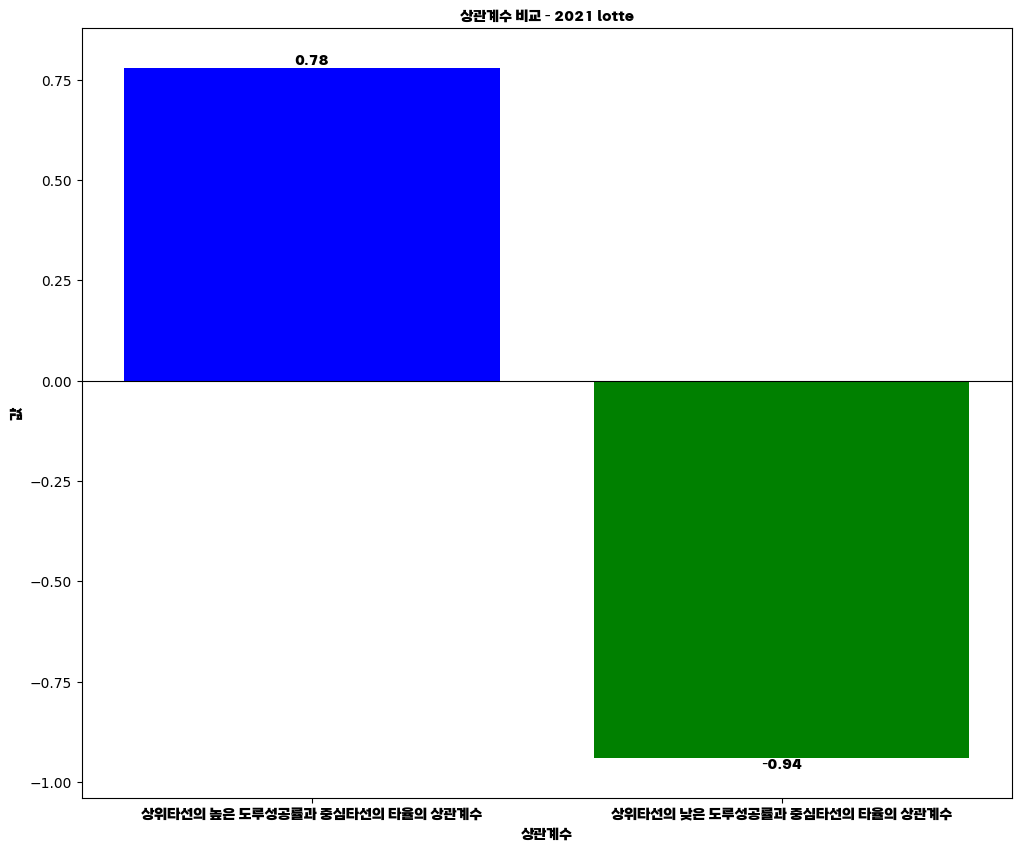

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 lotte', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_2020.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


lotte_2020 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lotte_2020['타율'] = pd.to_numeric(lotte_2020['타율'], errors='coerce')
lotte_2020['도루성공률'] = pd.to_numeric(lotte_2020['도루성공률'], errors='coerce')

lotte_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lotte_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      200 non-null    int64  
 1   선수명     200 non-null    object 
 2   팀명      200 non-null    object 
 3   타율      196 non-null    float64
 4   타수      200 non-null    int64  
 5   타점      200 non-null    int64  
 6   타순      200 non-null    object 
 7   도루허용    200 non-null    int64  
 8   도루저지    200 non-null    int64  
 9   도루성공률   150 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 15.8+ KB


In [ ]:
table = lotte_2020[lotte_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lotte_2020[lotte_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lotte_2020[lotte_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(35, 10) (61, 10) (99, 10)
상관계수: 0.7775089592019904, p-value: 4.310093315734341e-07

상관계수: -0.7454121709401837, p-value: 0.00016198469849421147


<Figure size 2000x600 with 0 Axes>

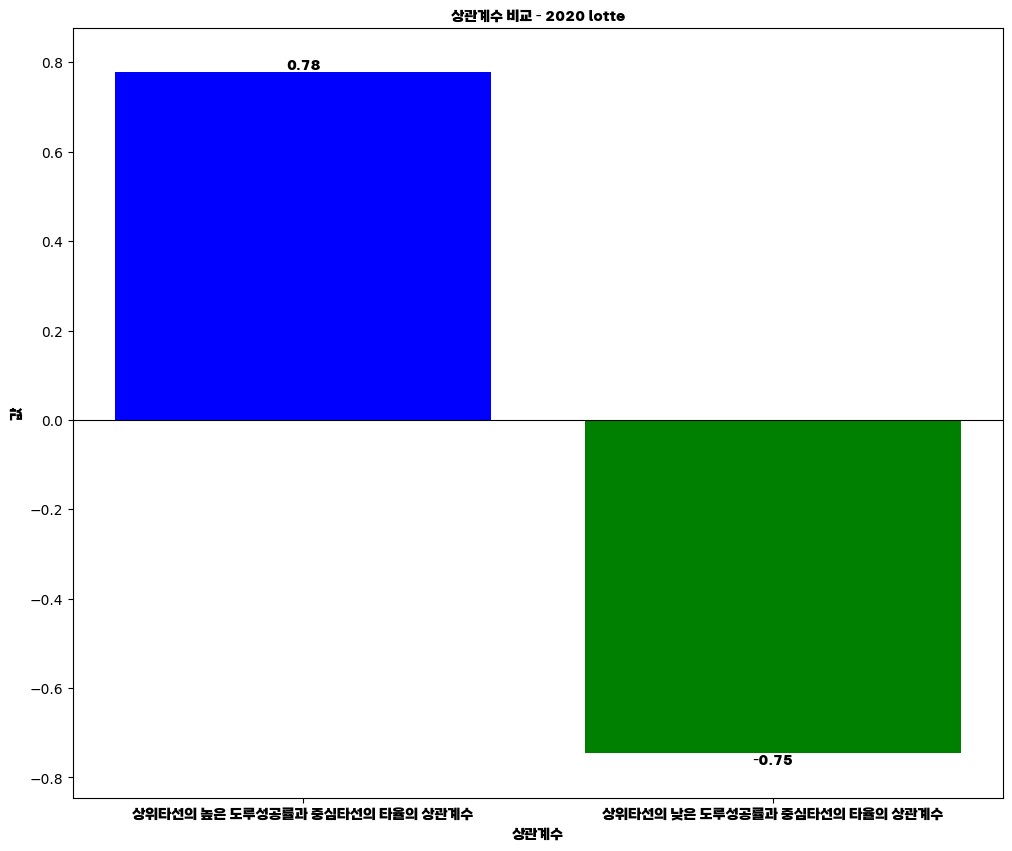

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 lotte', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/Lotte/lotte_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


lotte_2019 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lotte_2019['타율'] = pd.to_numeric(lotte_2019['타율'], errors='coerce')
lotte_2019['도루성공률'] = pd.to_numeric(lotte_2019['도루성공률'], errors='coerce')

lotte_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lotte_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      257 non-null    int64  
 1   선수명     257 non-null    object 
 2   팀명      257 non-null    object 
 3   타율      251 non-null    float64
 4   타수      257 non-null    int64  
 5   타점      257 non-null    int64  
 6   타순      257 non-null    object 
 7   도루허용    257 non-null    int64  
 8   도루저지    257 non-null    int64  
 9   도루성공률   150 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.2+ KB


In [ ]:
table = lotte_2019[lotte_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lotte_2019[lotte_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lotte_2019[lotte_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(39, 10) (72, 10) (122, 10)
상관계수: 0.6392159274192933, p-value: 0.00014328786432708308

상관계수: -0.8993106773772337, p-value: 1.4431907724061215e-11


<Figure size 2000x600 with 0 Axes>

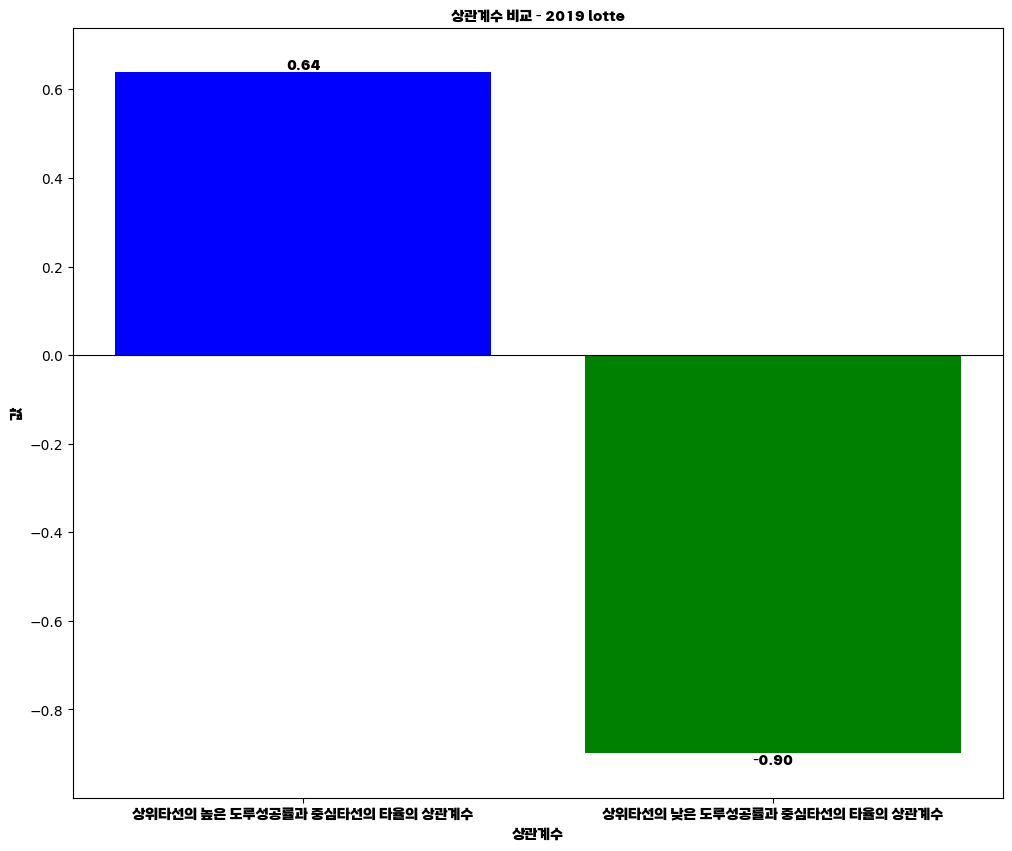

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 lotte', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# 키움

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_2023.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_detail_2023.csv')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_batting_order_2023.csv', encoding='cp949')

In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kiwoom_2023 = df4.merge(df3_run, on='선수명')
kiwoom_2023

,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,임지열,키움,0.500,12,6,1,0,1,5,3,0,2,0,1번,1,0,100
1,임지열,키움,0.115,26,3,0,0,0,0,3,0,9,1,2번,1,0,100
2,임지열,키움,-,0,0,0,0,0,0,1,0,0,0,3번,1,0,100
3,임지열,키움,0.348,23,8,1,0,0,5,5,1,6,0,4번,1,0,100
4,임지열,키움,0.184,38,7,1,0,1,5,5,0,16,0,5번,1,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,김건희,키움,0.182,11,2,0,0,0,0,2,0,4,1,하위(6~9번),0,0,-
285,김시앙,키움,0.000,4,0,0,0,0,0,0,0,1,1,6번,0,0,-
286,김시앙,키움,0.063,16,1,0,0,0,0,1,1,5,1,8번,0,0,-
287,김시앙,키움,0.286,56,16,1,0,0,7,2,2,12,2,9번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kiwoom_2023['타율'] = pd.to_numeric(kiwoom_2023['타율'], errors='coerce')
kiwoom_2023['도루성공률'] = pd.to_numeric(kiwoom_2023['도루성공률'], errors='coerce')

kiwoom_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kiwoom_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     289 non-null    object 
 1   팀명      289 non-null    object 
 2   타율      283 non-null    float64
 3   타수      289 non-null    int64  
 4   타점      289 non-null    int64  
 5   타순      289 non-null    object 
 6   도루허용    289 non-null    int64  
 7   도루저지    289 non-null    int64  
 8   도루성공률   112 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 20.4+ KB


In [ ]:
table = kiwoom_2023[kiwoom_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kiwoom_2023[kiwoom_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kiwoom_2023[kiwoom_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(70, 9) (86, 9) (133, 9)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(31, 9)

In [ ]:
table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_3 = table.nlargest(30, '타율')
center_4 = center.nlargest(30, '도루성공률')

table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.588084422339933, p-value: 0.006387342972519926

상관계수: 0.5905577895925591, p-value: 0.0005911489289427211

상관계수: -0.8937596644015025, p-value: 1.1072860323873139e-07


<Figure size 2000x600 with 0 Axes>

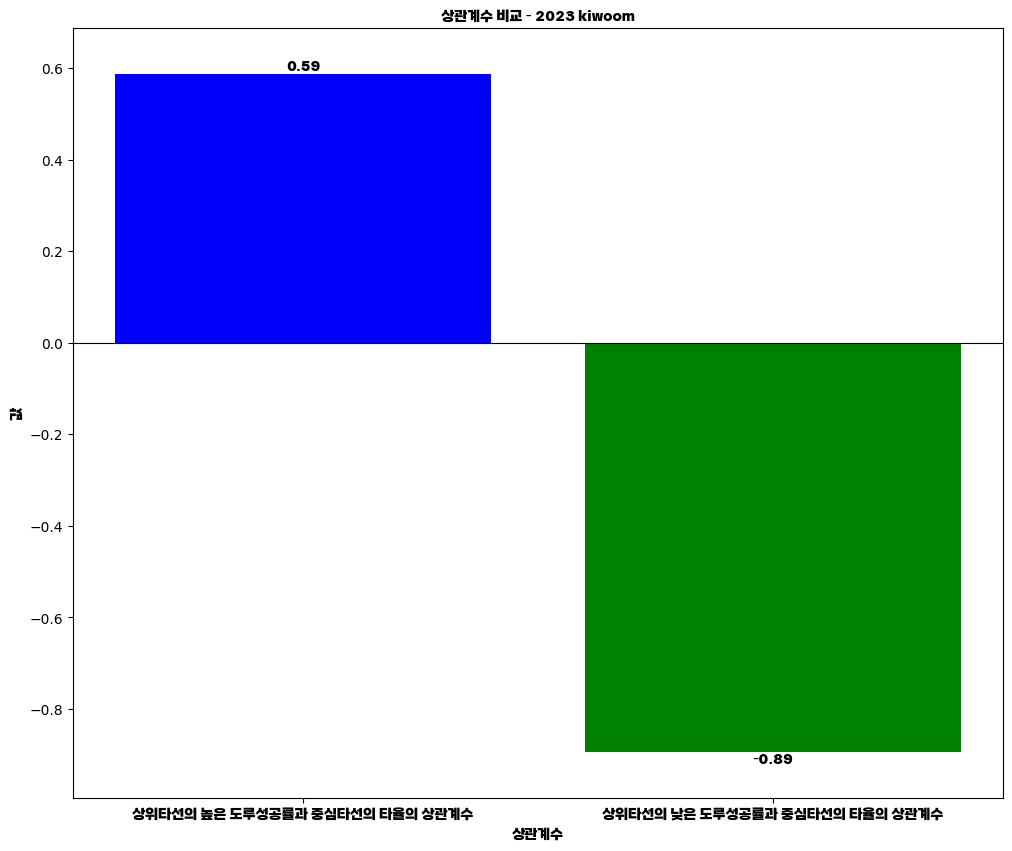

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 kiwoom', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_2022.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kiwoom_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kiwoom_2022['타율'] = pd.to_numeric(kiwoom_2022['타율'], errors='coerce')
kiwoom_2022['도루성공률'] = pd.to_numeric(kiwoom_2022['도루성공률'], errors='coerce')

kiwoom_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kiwoom_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     224 non-null    object 
 1   팀명      224 non-null    object 
 2   타율      218 non-null    float64
 3   타수      224 non-null    int64  
 4   타점      224 non-null    int64  
 5   타순      224 non-null    object 
 6   도루허용    224 non-null    int64  
 7   도루저지    224 non-null    int64  
 8   도루성공률   125 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 15.9+ KB


In [ ]:
able = kiwoom_2022[kiwoom_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kiwoom_2022[kiwoom_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kiwoom_2022[kiwoom_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(31, 9) (58, 9) (110, 9)


In [ ]:
table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(30, '타율')
center_4 = center.nlargest(30, '도루성공률')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.9365032253717545, p-value: 2.869097533635821e-14

상관계수: 0.7082925182491814, p-value: 1.19123803587966e-05

상관계수: -0.7171778360686748, p-value: 8.216204304957382e-06


<Figure size 2000x600 with 0 Axes>

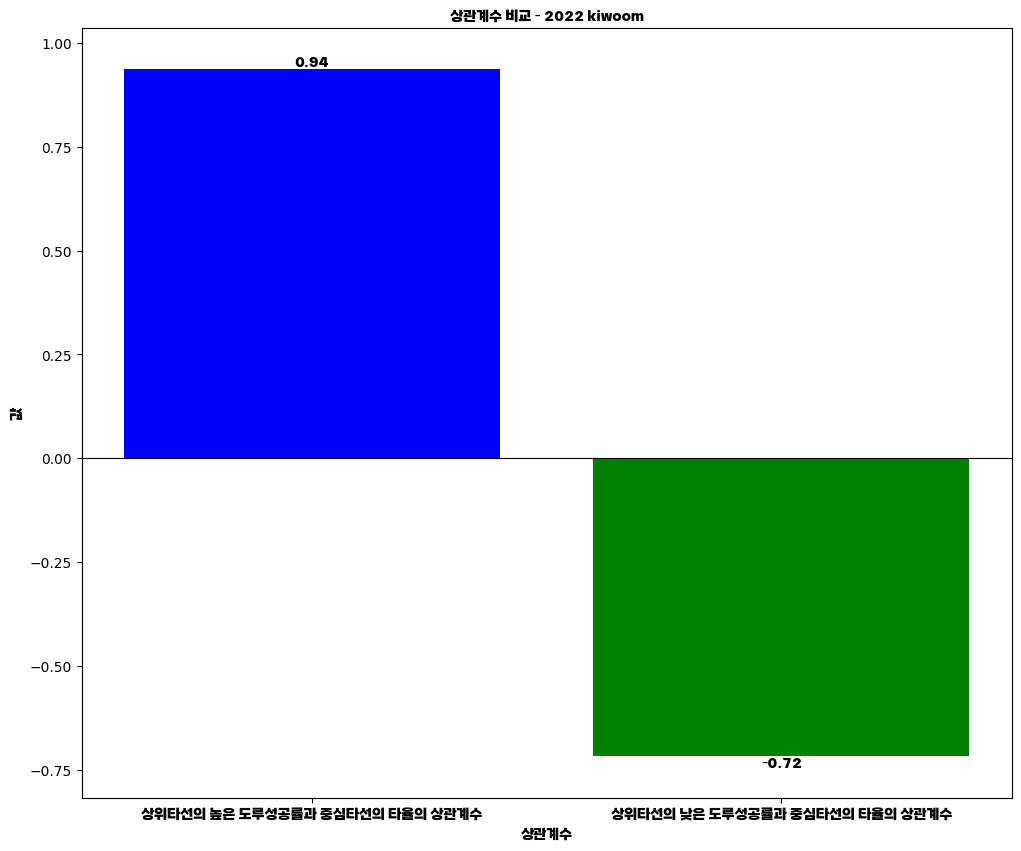

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 kiwoom', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)


# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_batting_order_2021.csv', encoding='cp949')

df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kiwoom_2021 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kiwoom_2021['타율'] = pd.to_numeric(kiwoom_2021['타율'], errors='coerce')
kiwoom_2021['도루성공률'] = pd.to_numeric(kiwoom_2021['도루성공률'], errors='coerce')


kiwoom_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kiwoom_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     238 non-null    object 
 1   팀명      238 non-null    object 
 2   타율      233 non-null    float64
 3   타수      238 non-null    int64  
 4   타점      238 non-null    int64  
 5   타순      238 non-null    object 
 6   도루허용    238 non-null    int64  
 7   도루저지    238 non-null    int64  
 8   도루성공률   166 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 16.9+ KB


In [ ]:
table_1

,선수명,팀명,타율,타수,타점,타순,도루허용,도루저지,도루성공률
0,임지열,키움,0.500,12,5,1번,1,0,100.0
1,임지열,키움,0.115,26,0,2번,1,0,100.0
9,임지열,키움,0.237,38,5,상위(1~2번),1,0,100.0
40,송성문,키움,0.290,31,4,1번,1,0,100.0
41,송성문,키움,0.000,4,0,2번,1,0,100.0
49,송성문,키움,0.257,35,4,상위(1~2번),1,0,100.0
114,임병욱,키움,0.125,8,0,1번,4,0,100.0
115,임병욱,키움,1.000,1,2,2번,4,0,100.0
123,임병욱,키움,0.222,9,2,상위(1~2번),4,0,100.0
161,박주홍,키움,0.000,2,0,1번,1,0,100.0


In [ ]:
able = kiwoom_2021[kiwoom_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kiwoom_2021[kiwoom_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kiwoom_2021[kiwoom_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_3 = table.nlargest(30, '타율')
center_4 = center.nlargest(30, '도루성공률')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(31, 9) (66, 9) (123, 9)
상관계수: 0.454265195130581, p-value: 0.04421082746454719

상관계수: 0.8024670133152725, p-value: 9.626468876854071e-08

상관계수: -0.8435653170612739, p-value: 4.814531071161539e-09


<Figure size 2000x600 with 0 Axes>

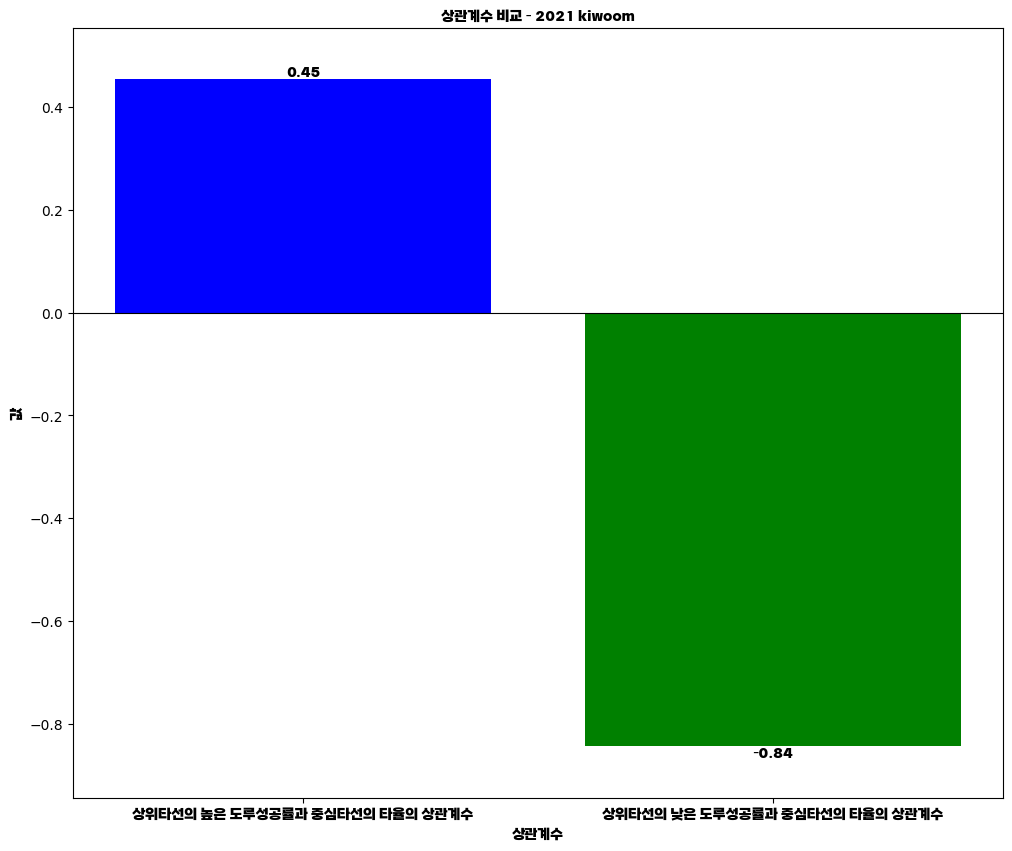

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 kiwoom', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_2020.csv')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


kiwoom_2020 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kiwoom_2020['타율'] = pd.to_numeric(kiwoom_2020['타율'], errors='coerce')
kiwoom_2020['도루성공률'] = pd.to_numeric(kiwoom_2020['도루성공률'], errors='coerce')

kiwoom_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kiwoom_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     237 non-null    object 
 1   팀명      237 non-null    object 
 2   타율      235 non-null    float64
 3   타수      237 non-null    int64  
 4   타점      237 non-null    int64  
 5   타순      237 non-null    object 
 6   도루허용    237 non-null    int64  
 7   도루저지    237 non-null    int64  
 8   도루성공률   142 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 16.8+ KB


In [ ]:
table = doosan_2020[doosan_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2020[doosan_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2020[doosan_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(32, 9) (68, 9) (105, 9)
상관계수: 0.8333499537677993, p-value: 5.0557150992508644e-06

상관계수: 0.7632572738481307, p-value: 9.04619655609996e-05

상관계수: -0.752350420173837, p-value: 0.00012988891619749796


<Figure size 2000x600 with 0 Axes>

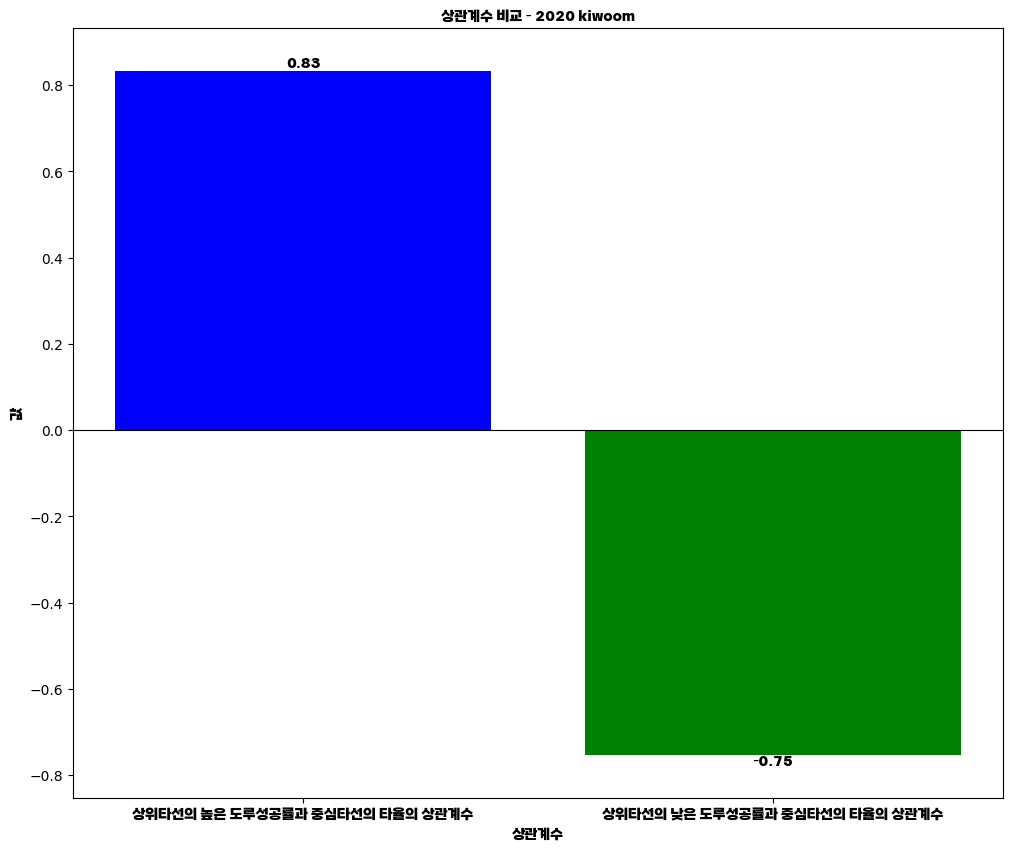

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 kiwoom', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/키움/kiwoom_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


kiwoom_2019 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kiwoom_2019['타율'] = pd.to_numeric(kiwoom_2019['타율'], errors='coerce')
kiwoom_2019['도루성공률'] = pd.to_numeric(kiwoom_2019['도루성공률'], errors='coerce')

kiwoom_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kiwoom_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선수명     174 non-null    object 
 1   팀명      174 non-null    object 
 2   타율      170 non-null    float64
 3   타수      174 non-null    int64  
 4   타점      174 non-null    int64  
 5   타순      174 non-null    object 
 6   도루허용    174 non-null    int64  
 7   도루저지    174 non-null    int64  
 8   도루성공률   109 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 12.4+ KB


In [ ]:
table = kiwoom_2019[kiwoom_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kiwoom_2019[kiwoom_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kiwoom_2019[kiwoom_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(28, 9) (56, 9) (81, 9)
상관계수: 0.5986162099720503, p-value: 0.005294316554990854

상관계수: -0.5983721476700314, p-value: 0.005317773511693891


<Figure size 2000x600 with 0 Axes>

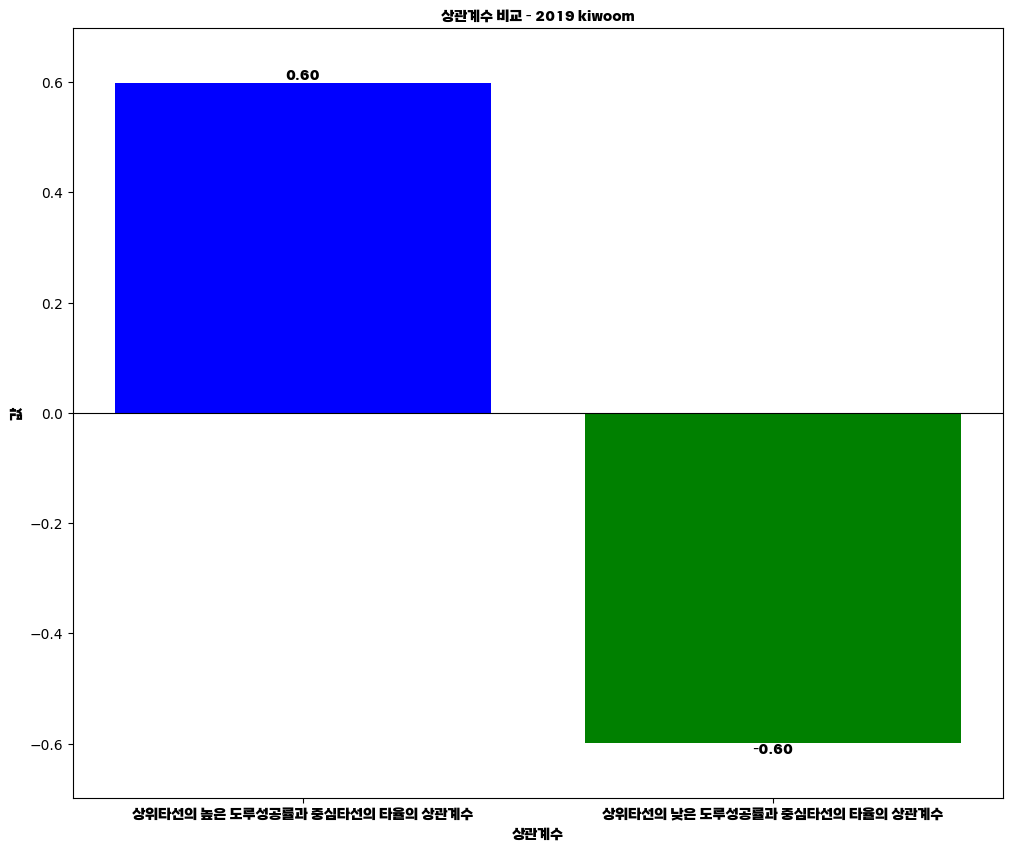

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 kiwoom', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# KIA

## 2023

In [ ]:
runner_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_runner_2023.csv', encoding='cp949')
hitter_detail_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_detail_2023.csv', encoding='cp949')
hitter_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_2023.csv', encoding='cp949')
batting_order_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_bating_order_2023.csv', encoding='cp949')

In [ ]:
runner_df = runner_df[['선수명', '도루허용', '도루저지', '도루성공률']]

KIA_2023 = batting_order_df.merge(runner_df, on='선수명')
KIA_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,오선우,KIA,0.4,5,2,0,0,1,1,0,0,1,0,1번,0,0,-
1,10,오선우,KIA,-,0,0,0,0,0,0,1,0,0,0,3번,0,0,-
2,8,오선우,KIA,0.000,1,0,0,0,0,0,0,0,1,0,4번,0,0,-
3,12,오선우,KIA,0.000,2,0,0,0,0,0,0,0,2,0,6번,0,0,-
4,4,오선우,KIA,0.333,9,3,0,0,1,4,0,0,3,0,7번,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,11,한승택,KIA,0.133,60,8,1,0,0,3,7,1,23,0,8번,0,0,-
211,15,한승택,KIA,0.120,25,3,1,0,0,0,3,1,9,1,9번,0,0,-
212,22,한승택,KIA,0.129,85,11,2,0,0,3,11,2,32,1,하위(6~9번),0,0,-
213,16,윤도현,KIA,0.000,1,0,0,0,0,0,0,0,1,0,7번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
KIA_2023['타율'] = pd.to_numeric(KIA_2023['타율'], errors='coerce')
KIA_2023['도루성공률'] = pd.to_numeric(KIA_2023['도루성공률'], errors='coerce')
KIA_2023.fillna(0, inplace=True)

# 변환 결과 확인
KIA_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      215 non-null    int64  
 1   선수명     215 non-null    object 
 2   팀명      215 non-null    object 
 3   타율      215 non-null    float64
 4   타수      215 non-null    int64  
 5   안타      215 non-null    int64  
 6   2루타     215 non-null    int64  
 7   3루타     215 non-null    int64  
 8   홈런      215 non-null    int64  
 9   타점      215 non-null    int64  
 10  볼넷      215 non-null    int64  
 11  사구      215 non-null    int64  
 12  삼진      215 non-null    int64  
 13  병살타     215 non-null    int64  
 14  타순      215 non-null    object 
 15  도루허용    215 non-null    int64  
 16  도루저지    215 non-null    int64  
 17  도루성공률   215 non-null    float64
dtypes: float64(2), int64(13), object(3)
memory usage: 30.4+ KB


In [ ]:
df1 = KIA_2023[KIA_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
df2 = KIA_2023[KIA_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
df3 = KIA_2023[KIA_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 도루 성공률 평균 계산
top_steal_success_rate = top_order['도루성공률'].mean()

# 중심 타선 도루 성공률 평균 계산
middle_batting_average = middle_order['도루성공률'].mean()

# 하위 타선 도루 성공률 평균 계산
bottom_batting_average = bottom_order['도루성공률'].mean()


print(f'상위 타선 도루 성공률 평균: {top_steal_success_rate}')
print(f'중심 타선 도루 성공률 평균: {middle_batting_average}')
print(f'하위 타선 도루 성공률 평균: {bottom_batting_average}')

상위 타선 도루 성공률 평균: 51.4
중심 타선 도루 성공률 평균: 43.620000000000005
하위 타선 도루 성공률 평균: 38.31682242990654


In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order1 = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order1 = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order1 = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 타율 평균 계산
top_hit = top_order['타율'].mean()

# 중심 타선 타율 평균 계산
middle_hit = middle_order['타율'].mean()

# 하위 타선 타율 평균 계산
bottom_hit = bottom_order['타율'].mean()


print(f'상위 타선 타율 평균: {top_hit}')
print(f'중심 타선 타율 평균: {middle_hit}')
print(f'하위 타선 타율 평균: {bottom_hit}')

상위 타선 타율 평균: 0.22179069767441859
중심 타선 타율 평균: 0.24164615384615384
하위 타선 타율 평균: 0.21030841121495328


In [ ]:
top_1 = df1.nlargest(40, '도루성공률')
top_2 = df1.nlargest(40, '도루허용')
top_3 = df1.nlargest(30, '타율')

middle_1 = df2.nlargest(40, '타율')
middle_2 = df2.nlargest(70, '도루성공률')
middle_3 = df2.nlargest(70, '도루허용')
middle_4 = df2.nlargest(30, '도루성공률')
middle_5 = df2.nlargest(40, '도루허용')

bottom_1 = df3.nlargest(30, '타율')

In [ ]:
# 상위 타선 도루 성공률과 중심 타선 타율의 상관계수 계산
correlation_1, p_value_1 = pearsonr(top_1['도루성공률'], middle_1['타율'])
correlation_1, p_value_1

(0.6487719167329407, 5.963008247259922e-06)

In [ ]:
correlation_2, p_value_2 = pearsonr(middle_4['도루성공률'], top_3['타율'])
correlation_2, p_value_2

(0.8891617295000366, 5.190021670679591e-11)

<Figure size 2000x600 with 0 Axes>

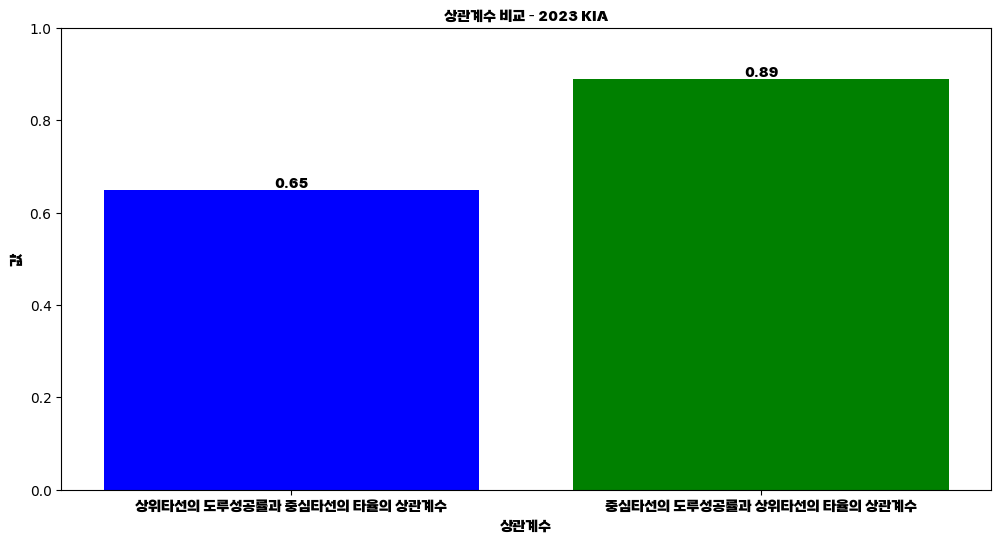

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 도루성공률과 중심타선의 타율의 상관계수', '중심타선의 도루성공률과 상위타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 6))

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 KIA', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
plt.ylim(0, 1)
plt.text(0, correlation_1, f'{correlation_1:.2f}', ha='center', va='bottom', fontproperties=font_prop)
plt.text(1, correlation_2, f'{correlation_2:.2f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
runner_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_runner_2022.csv', encoding='cp949')
hitter_detail_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_detail_2022.csv', encoding='cp949')
hitter_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_2022.csv', encoding='cp949')
batting_order_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_bating_order_2022.csv', encoding='cp949')

In [ ]:
runner_df = runner_df[['선수명', '도루허용', '도루저지', '도루성공률']]

KIA_2022 = batting_order_df.merge(runner_df, on='선수명')
KIA_2022

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,김호령,KIA,1.0,1,1,0,0,0,0,0,0,0,0,1번,2,1,66.7
1,5,김호령,KIA,0.286,7,2,0,0,1,4,1,0,2,1,2번,2,1,66.7
2,7,김호령,KIA,0.0,2,0,0,0,0,0,0,0,2,0,3번,2,1,66.7
3,1,김호령,KIA,1.0,1,1,1,0,0,0,0,0,0,0,4번,2,1,66.7
4,9,김호령,KIA,0.0,4,0,0,0,0,0,0,0,2,0,5번,2,1,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,1,권혁경,KIA,0.5,2,1,0,0,0,1,0,0,0,0,하위(6~9번),0,0,-
190,7,박정우,KIA,0.333,3,1,0,0,0,2,0,0,1,0,8번,0,0,-
191,4,박정우,KIA,0.333,3,1,0,0,0,2,0,0,1,0,하위(6~9번),0,0,-
192,17,신범수,KIA,0.0,3,0,0,0,0,0,0,0,1,0,8번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
KIA_2022['타율'] = pd.to_numeric(KIA_2022['타율'], errors='coerce')
KIA_2022['도루성공률'] = pd.to_numeric(KIA_2022['도루성공률'], errors='coerce')
KIA_2022.fillna(0, inplace=True)

# 변환 결과 확인
KIA_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      194 non-null    int64  
 1   선수명     194 non-null    object 
 2   팀명      194 non-null    object 
 3   타율      194 non-null    float64
 4   타수      194 non-null    int64  
 5   안타      194 non-null    int64  
 6   2루타     194 non-null    int64  
 7   3루타     194 non-null    int64  
 8   홈런      194 non-null    int64  
 9   타점      194 non-null    int64  
 10  볼넷      194 non-null    int64  
 11  사구      194 non-null    int64  
 12  삼진      194 non-null    int64  
 13  병살타     194 non-null    int64  
 14  타순      194 non-null    object 
 15  도루허용    194 non-null    int64  
 16  도루저지    194 non-null    int64  
 17  도루성공률   194 non-null    float64
dtypes: float64(2), int64(13), object(3)
memory usage: 27.4+ KB


In [ ]:
df1 = KIA_2022[KIA_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
df2 = KIA_2022[KIA_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
df3 = KIA_2022[KIA_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 도루 성공률 평균 계산
top_steal_success_rate = top_order['도루성공률'].mean()

# 중심 타선 도루 성공률 평균 계산
middle_batting_average = middle_order['도루성공률'].mean()

# 하위 타선 도루 성공률 평균 계산
bottom_batting_average = bottom_order['도루성공률'].mean()


print(f'상위 타선 도루 성공률 평균: {top_steal_success_rate}')
print(f'중심 타선 도루 성공률 평균: {middle_batting_average}')
print(f'하위 타선 도루 성공률 평균: {bottom_batting_average}')

상위 타선 도루 성공률 평균: 49.307317073170736
중심 타선 도루 성공률 평균: 47.908620689655166
하위 타선 도루 성공률 평균: 39.02736842105263


In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order1 = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order1 = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order1 = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 타율 평균 계산
top_hit = top_order['타율'].mean()

# 중심 타선 타율 평균 계산
middle_hit = middle_order['타율'].mean()

# 하위 타선 타율 평균 계산
bottom_hit = bottom_order['타율'].mean()


print(f'상위 타선 타율 평균: {top_hit}')
print(f'중심 타선 타율 평균: {middle_hit}')
print(f'하위 타선 타율 평균: {bottom_hit}')

상위 타선 타율 평균: 0.21380487804878048
중심 타선 타율 평균: 0.21660344827586206
하위 타선 타율 평균: 0.22075789473684207


In [ ]:
top_1 = df1.nlargest(40, '도루성공률')
top_2 = df1.nlargest(40, '도루허용')
top_3 = df1.nlargest(30, '타율')

middle_1 = df2.nlargest(40, '타율')
middle_2 = df2.nlargest(70, '도루성공률')
middle_3 = df2.nlargest(70, '도루허용')
middle_4 = df2.nlargest(30, '도루성공률')
middle_5 = df2.nlargest(40, '도루허용')

bottom_1 = df3.nlargest(30, '타율')

In [ ]:
# 상위 타선 도루 성공률과 중심 타선 타율의 상관계수 계산
correlation_1, p_value_1 = pearsonr(top_1['도루성공률'], middle_1['타율'])
correlation_1, p_value_1

(0.7302563601813533, 8.888598688691419e-08)

In [ ]:
correlation_2, p_value_2 = pearsonr(middle_4['도루성공률'], top_3['타율'])
correlation_2, p_value_2

(0.606938113253324, 0.0003763824337286077)

<Figure size 2000x600 with 0 Axes>

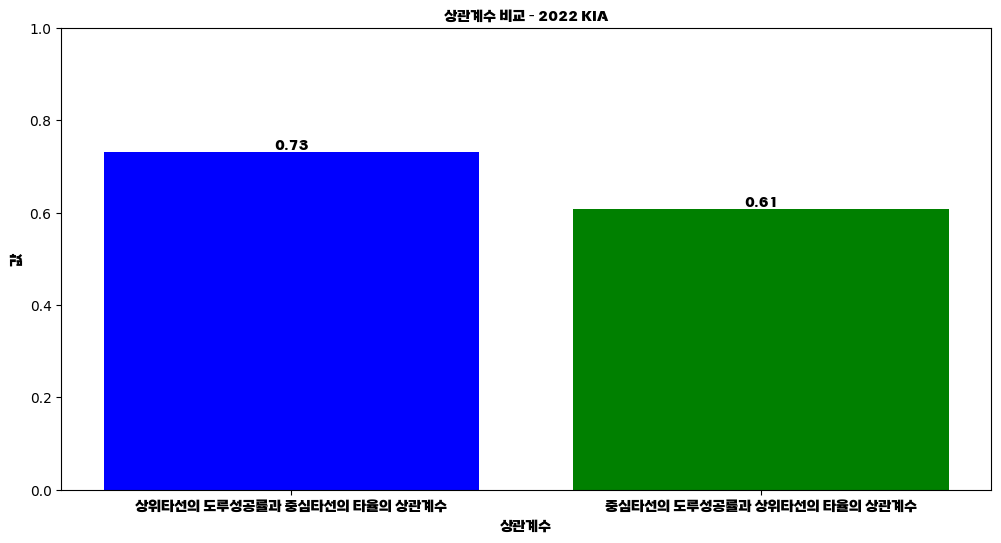

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 도루성공률과 중심타선의 타율의 상관계수', '중심타선의 도루성공률과 상위타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 6))

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 KIA', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
plt.ylim(0, 1)
plt.text(0, correlation_1, f'{correlation_1:.2f}', ha='center', va='bottom', fontproperties=font_prop)
plt.text(1, correlation_2, f'{correlation_2:.2f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
runner_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_runner_2021.csv', encoding='cp949')
hitter_detail_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_detail_2021.csv', encoding='cp949')
hitter_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_2021.csv', encoding='cp949')
batting_order_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_bating_order_2021.csv', encoding='cp949')

In [ ]:
runner_df = runner_df[['선수명', '도루허용', '도루저지', '도루성공률']]

KIA_2021 = batting_order_df.merge(runner_df, on='선수명')
KIA_2021

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,이우성,KIA,1.0,1,1,0,0,0,0,0,0,0,0,1번,2,1,66.7
1,1,이우성,KIA,0.5,2,1,0,0,0,0,0,0,0,0,3번,2,1,66.7
2,3,이우성,KIA,0.6,5,3,0,0,0,2,1,0,1,0,5번,2,1,66.7
3,16,이우성,KIA,0.129,31,4,2,0,0,0,5,0,5,1,6번,2,1,66.7
4,12,이우성,KIA,0.25,28,7,3,0,0,0,4,0,7,0,7번,2,1,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,13,권혁경,KIA,0.222,18,4,0,0,0,0,0,0,6,2,하위(6~9번),0,0,-
219,18,오선우,KIA,0.0,7,0,0,0,0,0,1,0,5,0,7번,0,0,-
220,16,오선우,KIA,0.0,2,0,0,0,0,0,0,0,2,0,8번,0,0,-
221,11,오선우,KIA,0.167,6,1,0,0,0,0,0,0,2,0,9번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
KIA_2021['타율'] = pd.to_numeric(KIA_2021['타율'], errors='coerce')
KIA_2021['도루성공률'] = pd.to_numeric(KIA_2021['도루성공률'], errors='coerce')
KIA_2021.fillna(0, inplace=True)

# 변환 결과 확인
KIA_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      223 non-null    int64  
 1   선수명     223 non-null    object 
 2   팀명      223 non-null    object 
 3   타율      223 non-null    float64
 4   타수      223 non-null    int64  
 5   안타      223 non-null    int64  
 6   2루타     223 non-null    int64  
 7   3루타     223 non-null    int64  
 8   홈런      223 non-null    int64  
 9   타점      223 non-null    int64  
 10  볼넷      223 non-null    int64  
 11  사구      223 non-null    int64  
 12  삼진      223 non-null    int64  
 13  병살타     223 non-null    int64  
 14  타순      223 non-null    object 
 15  도루허용    223 non-null    int64  
 16  도루저지    223 non-null    int64  
 17  도루성공률   223 non-null    float64
dtypes: float64(2), int64(13), object(3)
memory usage: 31.5+ KB


In [ ]:
df1 = KIA_2021[KIA_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
df2 = KIA_2021[KIA_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
df3 = KIA_2021[KIA_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 도루 성공률 평균 계산
top_steal_success_rate = top_order['도루성공률'].mean()

# 중심 타선 도루 성공률 평균 계산
middle_batting_average = middle_order['도루성공률'].mean()

# 하위 타선 도루 성공률 평균 계산
bottom_batting_average = bottom_order['도루성공률'].mean()


print(f'상위 타선 도루 성공률 평균: {top_steal_success_rate}')
print(f'중심 타선 도루 성공률 평균: {middle_batting_average}')
print(f'하위 타선 도루 성공률 평균: {bottom_batting_average}')

상위 타선 도루 성공률 평균: 39.16153846153846
중심 타선 도루 성공률 평균: 30.702985074626863
하위 타선 도루 성공률 평균: 27.73931623931624


In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order1 = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order1 = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order1 = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 타율 평균 계산
top_hit = top_order['타율'].mean()

# 중심 타선 타율 평균 계산
middle_hit = middle_order['타율'].mean()

# 하위 타선 타율 평균 계산
bottom_hit = bottom_order['타율'].mean()


print(f'상위 타선 타율 평균: {top_hit}')
print(f'중심 타선 타율 평균: {middle_hit}')
print(f'하위 타선 타율 평균: {bottom_hit}')

상위 타선 타율 평균: 0.2809743589743589
중심 타선 타율 평균: 0.22682089552238807
하위 타선 타율 평균: 0.21763247863247864


In [ ]:
top_1 = df1.nlargest(20, '도루성공률')
top_2 = df1.nlargest(40, '도루허용')
top_3 = df1.nlargest(30, '타율')

middle_1 = df2.nlargest(20, '타율')
middle_2 = df2.nlargest(70, '도루성공률')
middle_3 = df2.nlargest(70, '도루허용')
middle_4 = df2.nlargest(30, '도루성공률')
middle_5 = df2.nlargest(40, '도루허용')

bottom_1 = df3.nlargest(30, '타율')

In [ ]:
# 상위 타선 도루 성공률과 중심 타선 타율의 상관계수 계산
correlation_1, p_value_1 = pearsonr(top_1['도루성공률'], middle_1['타율'])
correlation_1, p_value_1

(0.7913404652291277, 3.2454124060292067e-05)

In [ ]:
correlation_2, p_value_2 = pearsonr(middle_4['도루성공률'], top_3['타율'])
correlation_2, p_value_2

(0.7413955401494298, 2.771501601528014e-06)

<Figure size 2000x600 with 0 Axes>

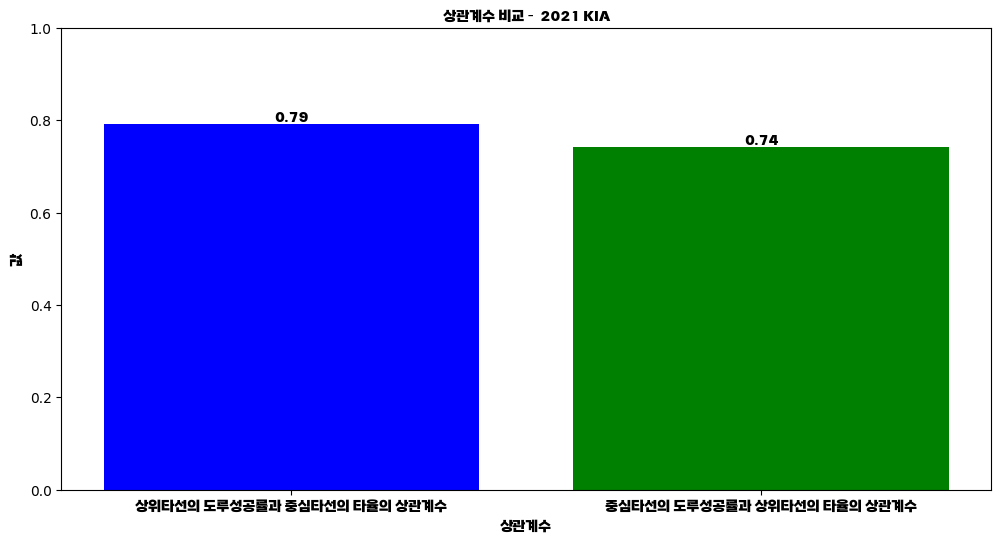

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 도루성공률과 중심타선의 타율의 상관계수', '중심타선의 도루성공률과 상위타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 6))

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 -  2021 KIA', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
plt.ylim(0, 1)
plt.text(0, correlation_1, f'{correlation_1:.2f}', ha='center', va='bottom', fontproperties=font_prop)
plt.text(1, correlation_2, f'{correlation_2:.2f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
runner_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_runner_2020.csv', encoding='cp949')
hitter_detail_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_detail_2020.csv', encoding='cp949')
hitter_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_2020.csv', encoding='cp949')
batting_order_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_bating_order_2020.csv', encoding='cp949')

In [ ]:
runner_df = runner_df[['선수명', '도루허용', '도루저지', '도루성공률']]

KIA_2020 = batting_order_df.merge(runner_df, on='선수명')
KIA_2020

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,고장혁,KIA,0.500,2,1,0,0,0,0,0,0,1,0,1번,0,0,-
1,1,고장혁,KIA,1.0,1,1,0,0,0,0,0,0,0,0,7번,0,0,-
2,17,고장혁,KIA,0.125,8,1,0,0,0,0,0,0,3,0,8번,0,0,-
3,20,고장혁,KIA,0.0,2,0,0,0,0,0,0,0,1,0,9번),0,0,-
4,1,고장혁,KIA,0.500,2,1,0,0,0,0,0,0,1,0,상위(1~2번),0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,4,나주환,KIA,0.306,36,11,2,0,1,4,2,0,4,1,8번,0,0,-
237,17,나주환,KIA,0.2,5,1,0,0,1,1,0,0,2,0,9번),0,0,-
238,7,나주환,KIA,0.279,204,57,5,0,6,26,12,1,44,6,하위(6~9번),0,0,-
239,20,박민,KIA,0.0,1,0,0,0,0,0,1,0,1,0,7번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
KIA_2020['타율'] = pd.to_numeric(KIA_2020['타율'], errors='coerce')
KIA_2020['도루성공률'] = pd.to_numeric(KIA_2020['도루성공률'], errors='coerce')
KIA_2020.fillna(0, inplace=True)

# 변환 결과 확인
KIA_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      241 non-null    int64  
 1   선수명     241 non-null    object 
 2   팀명      241 non-null    object 
 3   타율      241 non-null    float64
 4   타수      241 non-null    int64  
 5   안타      241 non-null    int64  
 6   2루타     241 non-null    int64  
 7   3루타     241 non-null    int64  
 8   홈런      241 non-null    int64  
 9   타점      241 non-null    int64  
 10  볼넷      241 non-null    int64  
 11  사구      241 non-null    int64  
 12  삼진      241 non-null    int64  
 13  병살타     241 non-null    int64  
 14  타순      241 non-null    object 
 15  도루허용    241 non-null    int64  
 16  도루저지    241 non-null    int64  
 17  도루성공률   241 non-null    float64
dtypes: float64(2), int64(13), object(3)
memory usage: 34.0+ KB


In [ ]:
df1 = KIA_2020[KIA_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
df2 = KIA_2020[KIA_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
df3 = KIA_2020[KIA_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 도루 성공률 평균 계산
top_steal_success_rate = top_order['도루성공률'].mean()

# 중심 타선 도루 성공률 평균 계산
middle_batting_average = middle_order['도루성공률'].mean()

# 하위 타선 도루 성공률 평균 계산
bottom_batting_average = bottom_order['도루성공률'].mean()


print(f'상위 타선 도루 성공률 평균: {top_steal_success_rate}')
print(f'중심 타선 도루 성공률 평균: {middle_batting_average}')
print(f'하위 타선 도루 성공률 평균: {bottom_batting_average}')

상위 타선 도루 성공률 평균: 45.86041666666667
중심 타선 도루 성공률 평균: 26.152112676056337
하위 타선 도루 성공률 평균: 31.04742268041237


In [ ]:
top_1 = df1.nlargest(40, '도루성공률')
top_2 = df1.nlargest(40, '도루허용')
top_3 = df1.nlargest(30, '타율')

middle_1 = df2.nlargest(40, '타율')
middle_2 = df2.nlargest(70, '도루성공률')
middle_3 = df2.nlargest(70, '도루허용')
middle_4 = df2.nlargest(30, '도루성공률')
middle_5 = df2.nlargest(40, '도루허용')

bottom_1 = df3.nlargest(30, '타율')

In [ ]:
# 상위 타선 도루 성공률과 중심 타선 타율의 상관계수 계산
correlation_1, p_value_1 = pearsonr(top_1['도루성공률'], middle_1['타율'])
correlation_1, p_value_1

(0.6992025431388689, 5.196767951673974e-07)

In [ ]:
correlation_2, p_value_2 = pearsonr(middle_4['도루성공률'], top_3['타율'])
correlation_2, p_value_2

(0.850427603225278, 2.6865298680802324e-09)

<Figure size 2000x600 with 0 Axes>

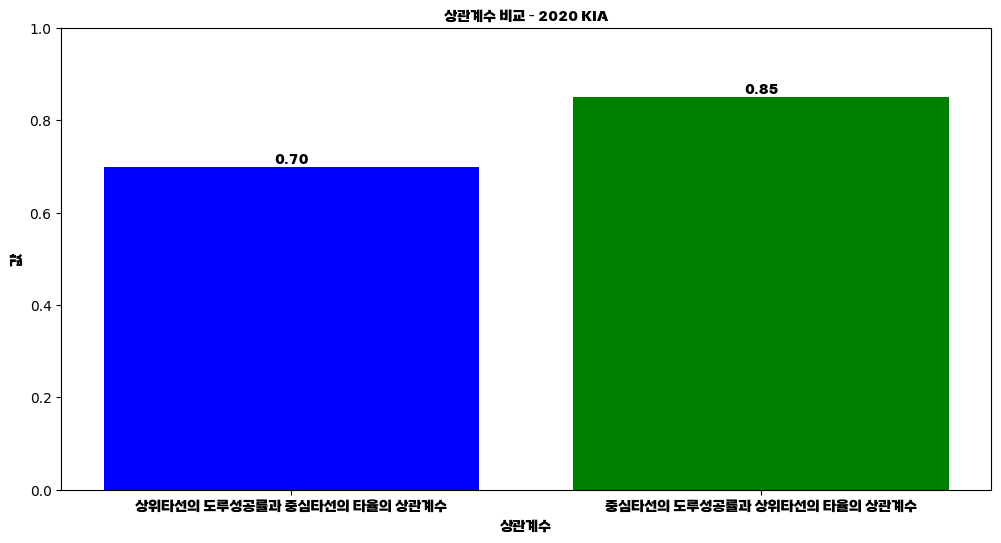

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 도루성공률과 중심타선의 타율의 상관계수', '중심타선의 도루성공률과 상위타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 6))
plt.bar(labels, correlation_values, color=['blue', 'green'])

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
plt.title('상관계수 비교 - 2020 KIA', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
plt.ylim(0, 1)
plt.text(0, correlation_1, f'{correlation_1:.2f}', ha='center', va='bottom', fontproperties=font_prop)
plt.text(1, correlation_2, f'{correlation_2:.2f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
runner_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_runner_2019.csv', encoding='cp949')
hitter_detail_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_detail_2019.csv', encoding='cp949')
hitter_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_hitter_2019.csv', encoding='cp949')
batting_order_df = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KIA/KIA_bating_order_2019.csv', encoding='cp949')

In [ ]:
runner_df = runner_df[['선수명', '도루허용', '도루저지', '도루성공률']]

KIA_2019 = batting_order_df.merge(runner_df, on='선수명')
KIA_2019

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,이우성,KIA,0.500,4,2,0,0,0,1,1,0,1,0,1번,0,0,-
1,2,이우성,KIA,0.500,4,2,2,0,0,0,0,0,0,0,2번,0,0,-
2,3,이우성,KIA,0.5,6,3,1,0,0,2,1,0,1,0,3번,0,0,-
3,9,이우성,KIA,0.25,8,2,0,0,0,0,0,0,2,0,4번,0,0,-
4,14,이우성,KIA,0.136,22,3,0,0,2,5,2,0,7,1,5번,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,24,최정민,KIA,0.0,1,0,0,0,0,0,0,0,1,0,7번,0,0,-
274,17,최정민,KIA,0.0,4,0,0,0,0,0,0,0,1,0,9번,0,0,-
275,9,한준수,KIA,0.300,20,6,2,0,0,2,0,0,2,2,8번,0,0,-
276,5,한준수,KIA,0.3,20,6,2,0,0,2,0,0,2,2,하위(6~9번),0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
KIA_2019['타율'] = pd.to_numeric(KIA_2019['타율'], errors='coerce')
KIA_2019['도루성공률'] = pd.to_numeric(KIA_2019['도루성공률'], errors='coerce')
KIA_2019.fillna(0, inplace=True)

# 변환 결과 확인
KIA_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      278 non-null    int64  
 1   선수명     278 non-null    object 
 2   팀명      278 non-null    object 
 3   타율      278 non-null    float64
 4   타수      278 non-null    int64  
 5   안타      278 non-null    int64  
 6   2루타     278 non-null    int64  
 7   3루타     278 non-null    int64  
 8   홈런      278 non-null    int64  
 9   타점      278 non-null    int64  
 10  볼넷      278 non-null    int64  
 11  사구      278 non-null    int64  
 12  삼진      278 non-null    int64  
 13  병살타     278 non-null    int64  
 14  타순      278 non-null    object 
 15  도루허용    278 non-null    int64  
 16  도루저지    278 non-null    int64  
 17  도루성공률   278 non-null    float64
dtypes: float64(2), int64(13), object(3)
memory usage: 39.2+ KB


In [ ]:
df1 = KIA_2019[KIA_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
df2 = KIA_2019[KIA_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
df3 = KIA_2019[KIA_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

In [ ]:
# 상위 타선(1번, 2번) 데이터 추출
top_order = df1[df1['타순'].isin(['1번', '2번','상위(1~2번)'])]

# 중심 타선(3번, 4번, 5번) 데이터 추출
middle_order = df2[df2['타순'].isin(['3번', '4번', '5번','중심(3~5번)'])]

# 하위 타선(6번, 7번, 8번. 9번) 데이터 추출
bottom_order = df3[df3['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

# 상위 타선 도루 성공률 평균 계산
top_steal_success_rate = top_order['도루성공률'].mean()

# 중심 타선 도루 성공률 평균 계산
middle_batting_average = middle_order['도루성공률'].mean()

# 하위 타선 도루 성공률 평균 계산
bottom_batting_average = bottom_order['도루성공률'].mean()


print(f'상위 타선 도루 성공률 평균: {top_steal_success_rate}')
print(f'중심 타선 도루 성공률 평균: {middle_batting_average}')
print(f'하위 타선 도루 성공률 평균: {bottom_batting_average}')

상위 타선 도루 성공률 평균: 35.73157894736842
중심 타선 도루 성공률 평균: 29.538095238095234
하위 타선 도루 성공률 평균: 31.275912408759126


In [ ]:
top_1 = df1.nlargest(40, '도루성공률')
top_2 = df1.nlargest(40, '도루허용')
top_3 = df1.nlargest(30, '타율')

middle_1 = df2.nlargest(40, '타율')
middle_2 = df2.nlargest(70, '도루성공률')
middle_3 = df2.nlargest(70, '도루허용')
middle_4 = df2.nlargest(30, '도루성공률')
middle_5 = df2.nlargest(40, '도루허용')

bottom_1 = df3.nlargest(30, '타율')

In [ ]:
# 상위 타선 도루 성공률과 중심 타선 타율의 상관계수 계산
correlation_1, p_value_1 = pearsonr(top_1['도루성공률'], middle_1['타율'])
correlation_1, p_value_1

(0.7457940388957716, 3.3471922560203615e-08)

In [ ]:
correlation_2, p_value_2 = pearsonr(middle_4['도루성공률'], top_3['타율'])
correlation_2, p_value_2

(0.9075084394022436, 4.629585637652918e-12)

<Figure size 2000x600 with 0 Axes>

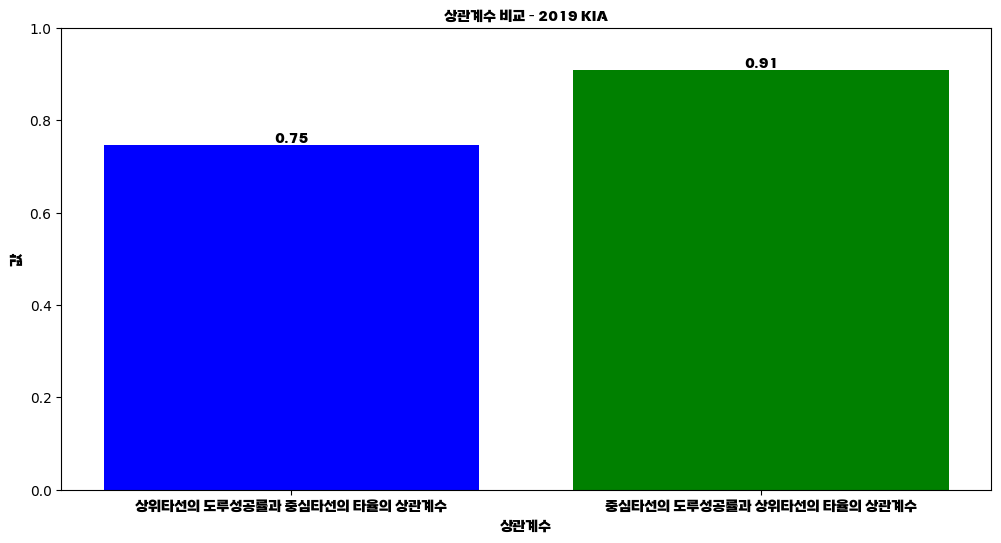

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 도루성공률과 중심타선의 타율의 상관계수', '중심타선의 도루성공률과 상위타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 6))

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 KIA', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
plt.ylim(0, 1)
plt.text(0, correlation_1, f'{correlation_1:.2f}', ha='center', va='bottom', fontproperties=font_prop)
plt.text(1, correlation_2, f'{correlation_2:.2f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

# LG

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_2023.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_batting_order_2023.csv', encoding='cp949')

In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

lg_2023 = df4.merge(df3_run, on='선수명')
lg_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,안익훈,LG,0.364,11,4,0,0,0,1,0,0,1,0,1번,0,0,-
1,1,안익훈,LG,0.333,6,2,1,0,0,0,0,0,0,0,2번,0,0,-
2,11,안익훈,LG,0.0,1,0,0,0,0,0,0,0,0,0,3번,0,0,-
3,1,안익훈,LG,1.0,1,1,0,0,0,1,0,0,0,0,5번,0,0,-
4,15,안익훈,LG,0.0,1,0,0,0,0,0,0,0,1,0,7번,0,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,21,송대현,LG,0.0,3,0,0,0,0,0,0,0,2,0,하위(6~9번),0,0,-
200,16,전준호,LG,0.0,1,0,0,0,0,1,0,0,0,0,8번,0,0,-
201,21,전준호,LG,0.0,1,0,0,0,0,1,0,0,0,0,하위(6~9번),0,0,-
202,1,이천웅,LG,1.000,3,3,0,0,0,1,0,0,0,0,9번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lg_2023['타율'] = pd.to_numeric(lg_2023['타율'], errors='coerce')
lg_2023['도루성공률'] = pd.to_numeric(lg_2023['도루성공률'], errors='coerce')

lg_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lg_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      204 non-null    int64  
 1   선수명     204 non-null    object 
 2   팀명      204 non-null    object 
 3   타율      199 non-null    float64
 4   타수      204 non-null    int64  
 5   타점      204 non-null    int64  
 6   타순      204 non-null    object 
 7   도루허용    204 non-null    int64  
 8   도루저지    204 non-null    int64  
 9   도루성공률   162 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 16.1+ KB


In [ ]:
table = lg_2023[doosan_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lg_2023[doosan_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lg_2023[doosan_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(55, 10) (59, 10) (90, 10)


<ipython-input-147-3000551258ba>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  table = lg_2023[doosan_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
<ipython-input-147-3000551258ba>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  center = lg_2023[doosan_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
<ipython-input-147-3000551258ba>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bottom = lg_2023[doosan_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(45, 10)

In [ ]:
table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')


table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.7930829368921607, p-value: 3.0302086916865753e-05

상관계수: -0.8341614511618205, p-value: 4.853618091109971e-06


<Figure size 2000x600 with 0 Axes>

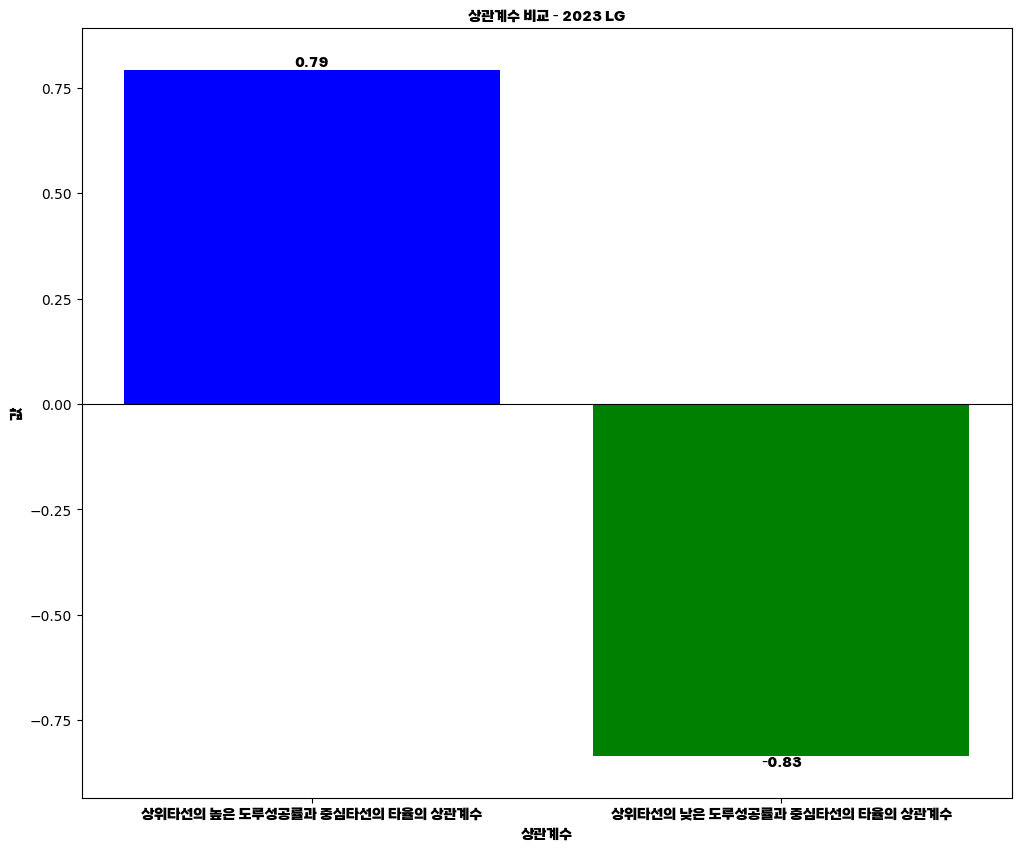

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 LG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)
# x축 그리기
# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_2022.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

lg_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lg_2022['타율'] = pd.to_numeric(lg_2022['타율'], errors='coerce')
lg_2022['도루성공률'] = pd.to_numeric(lg_2022['도루성공률'], errors='coerce')

lg_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lg_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      225 non-null    int64  
 1   선수명     225 non-null    object 
 2   팀명      225 non-null    object 
 3   타율      224 non-null    float64
 4   타수      225 non-null    int64  
 5   타점      225 non-null    int64  
 6   타순      225 non-null    object 
 7   도루허용    225 non-null    int64  
 8   도루저지    225 non-null    int64  
 9   도루성공률   153 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 17.7+ KB


In [ ]:
able = lg_2022[lg_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lg_2022[lg_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lg_2022[lg_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(45, 10) (75, 10) (98, 10)


In [ ]:
table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_3 = table.nlargest(30, '타율')
center_4 = center.nlargest(30, '도루성공률')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.8689410034951714, p-value: 6.668705329859511e-07

상관계수: -0.9593899601419491, p-value: 6.335865329796409e-17


<Figure size 2000x600 with 0 Axes>

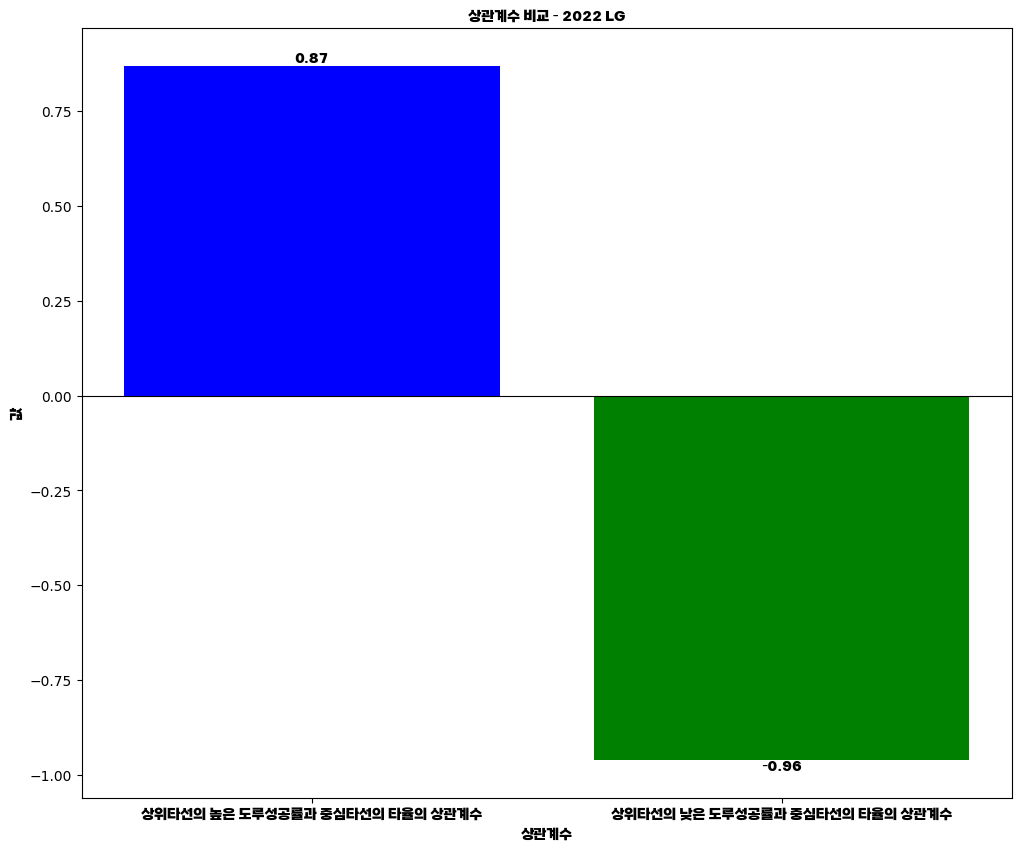

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 LG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_batting_order_2021.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

lg_2021 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lg_2021['타율'] = pd.to_numeric(lg_2021['타율'], errors='coerce')
lg_2021['도루성공률'] = pd.to_numeric(lg_2021['도루성공률'], errors='coerce')


lg_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lg_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      253 non-null    int64  
 1   선수명     253 non-null    object 
 2   팀명      253 non-null    object 
 3   타율      251 non-null    float64
 4   타수      253 non-null    int64  
 5   타점      253 non-null    int64  
 6   타순      253 non-null    object 
 7   도루허용    253 non-null    int64  
 8   도루저지    253 non-null    int64  
 9   도루성공률   187 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 19.9+ KB


In [ ]:
able = lg_2021[lg_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lg_2021[lg_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lg_2021[lg_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(45, 10) (79, 10) (124, 10)
상관계수: 0.806890861814482, p-value: 1.718162979084793e-05

상관계수: -0.9647165021631618, p-value: 9.14563204542422e-18


<Figure size 2000x600 with 0 Axes>

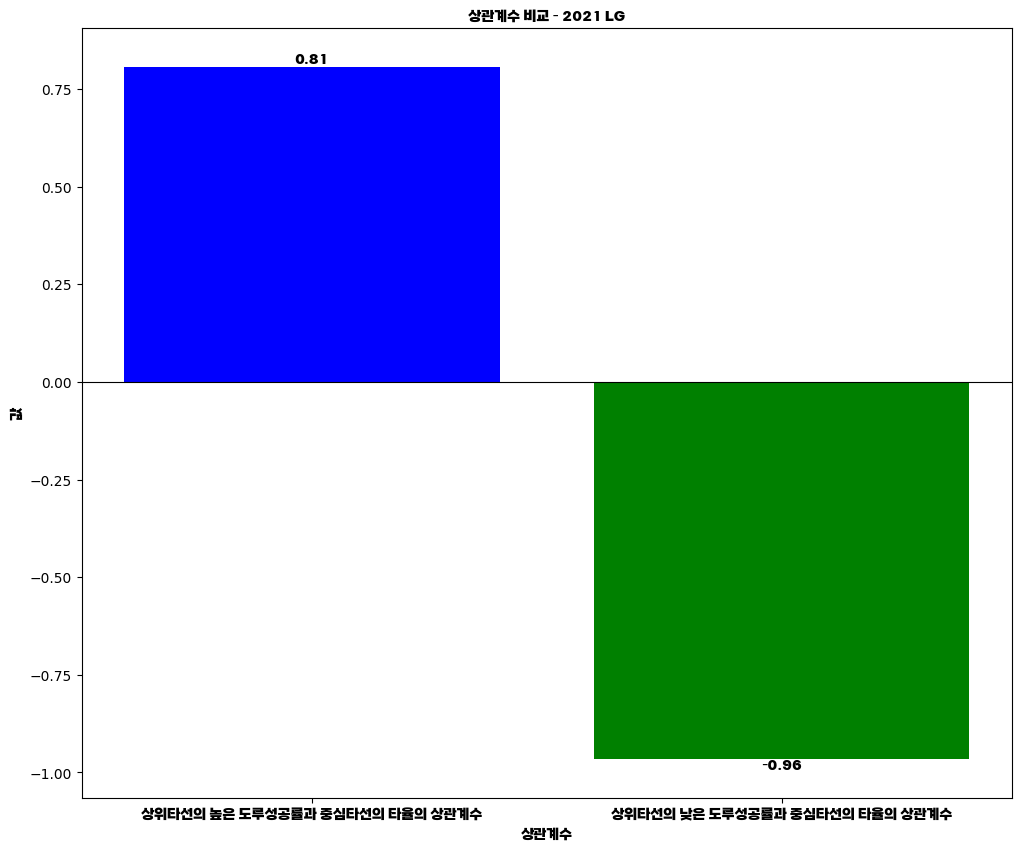

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 LG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_2020.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


lg_2020 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lg_2020['타율'] = pd.to_numeric(lg_2020['타율'], errors='coerce')
lg_2020['도루성공률'] = pd.to_numeric(lg_2020['도루성공률'], errors='coerce')

lg_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lg_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      227 non-null    int64  
 1   선수명     227 non-null    object 
 2   팀명      227 non-null    object 
 3   타율      220 non-null    float64
 4   타수      227 non-null    int64  
 5   타점      227 non-null    int64  
 6   타순      227 non-null    object 
 7   도루허용    227 non-null    int64  
 8   도루저지    227 non-null    int64  
 9   도루성공률   145 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 17.9+ KB


In [ ]:
table = lg_2020[lg_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lg_2020[lg_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lg_2020[lg_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_5}, p-value: {p_value_5}') # 3-5번의 도루 성공률, 1-2번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(31, 10) (67, 10) (111, 10)
상관계수: 0.7802322979930054, p-value: 4.953916368005491e-05

상관계수: 0.5973267005516949, p-value: 0.005419222872127852

상관계수: -0.8565641126441863, p-value: 1.432983162799381e-06


<Figure size 2000x600 with 0 Axes>

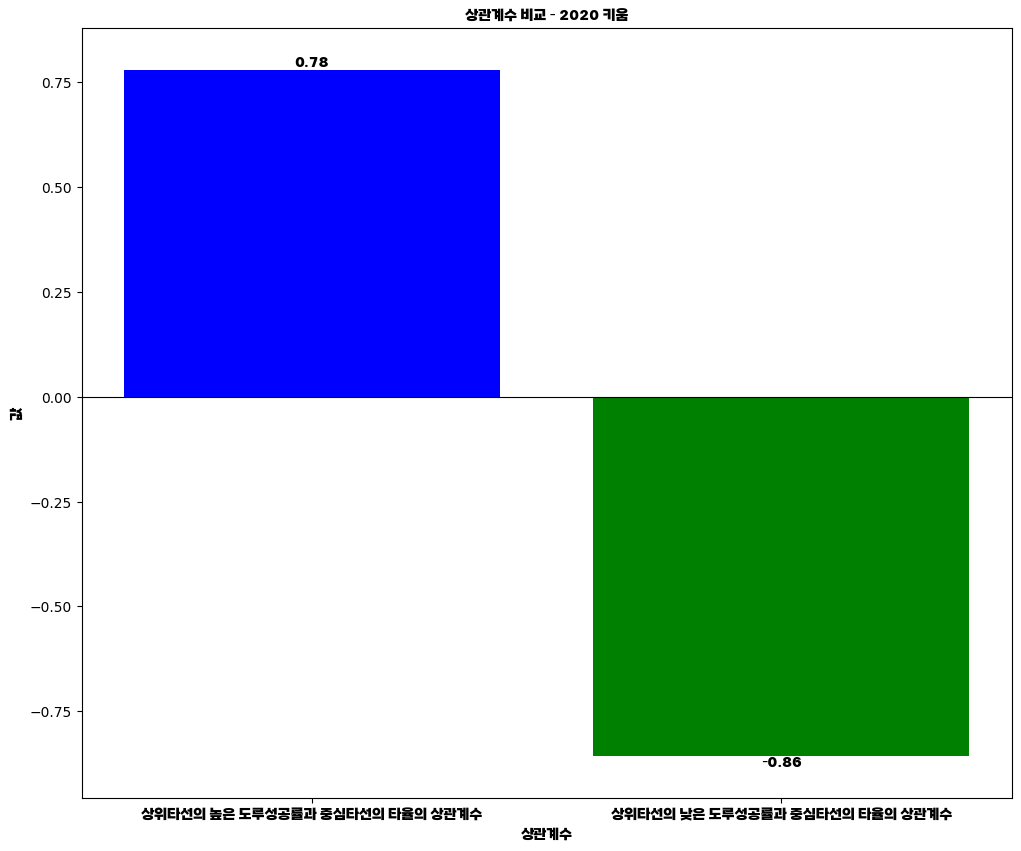

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 키움', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/LG/LG_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


lg_2019 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
lg_2019['타율'] = pd.to_numeric(lg_2019['타율'], errors='coerce')
lg_2019['도루성공률'] = pd.to_numeric(lg_2019['도루성공률'], errors='coerce')

lg_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
lg_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      204 non-null    int64  
 1   선수명     204 non-null    object 
 2   팀명      204 non-null    object 
 3   타율      199 non-null    float64
 4   타수      204 non-null    int64  
 5   타점      204 non-null    int64  
 6   타순      204 non-null    object 
 7   도루허용    204 non-null    int64  
 8   도루저지    204 non-null    int64  
 9   도루성공률   144 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 16.1+ KB


In [ ]:
table = lg_2019[lg_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = lg_2019[lg_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = lg_2019[lg_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(33, 10) (56, 10) (107, 10)
상관계수: 0.7958385053507133, p-value: 2.7150524980956353e-05

상관계수: -0.5250755159210174, p-value: 0.017442015562810546


<Figure size 2000x600 with 0 Axes>

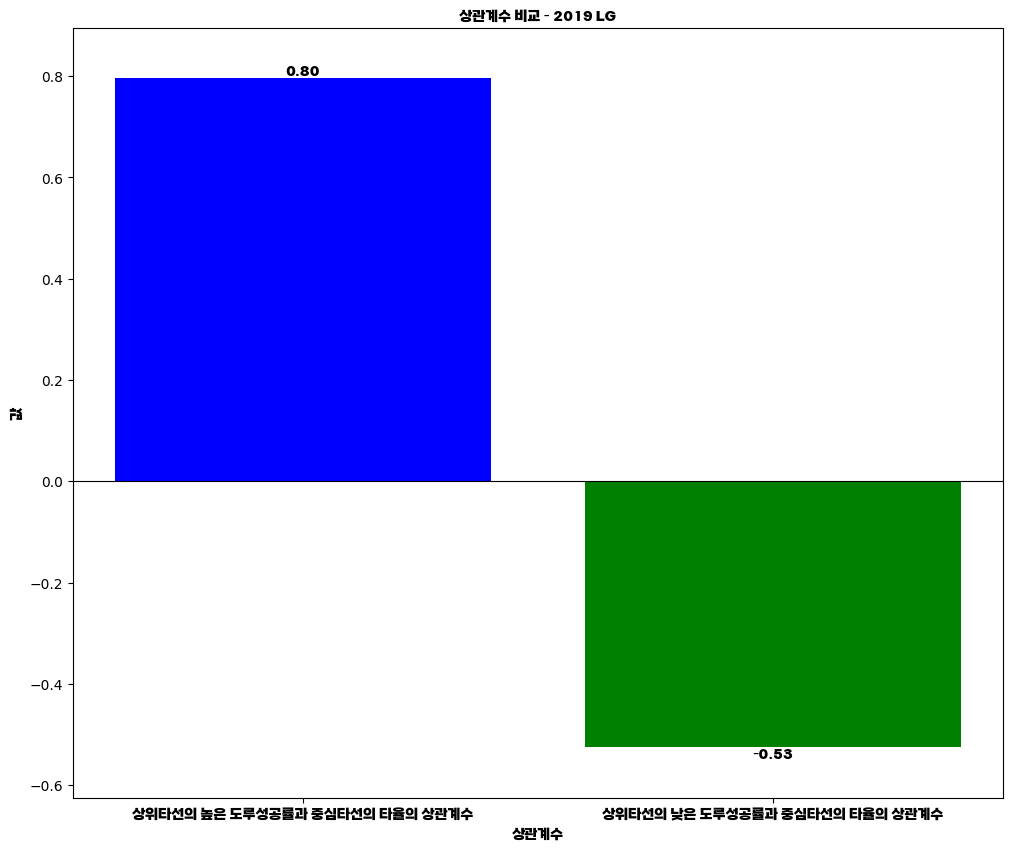

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 LG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# NC

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_2023.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_batting_order_2023.csv', encoding='cp949')

df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

nc_2023 = df4.merge(df3_run, on='선수명')
nc_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,김성욱,NC,0.667,3,2,1,0,1,1,2,0,1,0,1번,6,1,85.7
1,8,김성욱,NC,0.24,25,6,1,0,1,2,1,2,5,0,2번,6,1,85.7
2,7,김성욱,NC,0.222,9,2,1,0,1,1,1,0,2,1,3번,6,1,85.7
3,9,김성욱,NC,0.111,9,1,0,0,0,0,1,0,4,0,4번,6,1,85.7
4,11,김성욱,NC,0.185,65,12,1,0,1,2,6,3,24,3,5번,6,1,85.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,4,오장한,NC,0.333,3,1,0,0,0,0,0,0,1,0,8번,0,0,-
232,21,오장한,NC,0.143,7,1,0,0,0,0,1,0,5,0,하위(6~9번),0,0,-
233,17,박주찬,NC,0.0,3,0,0,0,0,0,0,0,1,0,7번,0,0,-
234,14,박주찬,NC,0.182,11,2,0,0,0,0,0,0,1,0,9번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
nc_2023['타율'] = pd.to_numeric(nc_2023['타율'], errors='coerce')
nc_2023['도루성공률'] = pd.to_numeric(nc_2023['도루성공률'], errors='coerce')

nc_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
nc_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      236 non-null    int64  
 1   선수명     236 non-null    object 
 2   팀명      236 non-null    object 
 3   타율      234 non-null    float64
 4   타수      236 non-null    int64  
 5   타점      236 non-null    int64  
 6   타순      236 non-null    object 
 7   도루허용    236 non-null    int64  
 8   도루저지    236 non-null    int64  
 9   도루성공률   168 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 18.6+ KB


In [ ]:
table = nc_2023[nc_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = nc_2023[nc_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = nc_2023[nc_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(54, 10) (70, 10) (112, 10)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(37, 10)

In [ ]:
table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')


table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.8392288758534245, p-value: 3.743399459229716e-06

상관계수: -0.8990306018967612, p-value: 7.144546932768924e-08


<Figure size 2000x600 with 0 Axes>

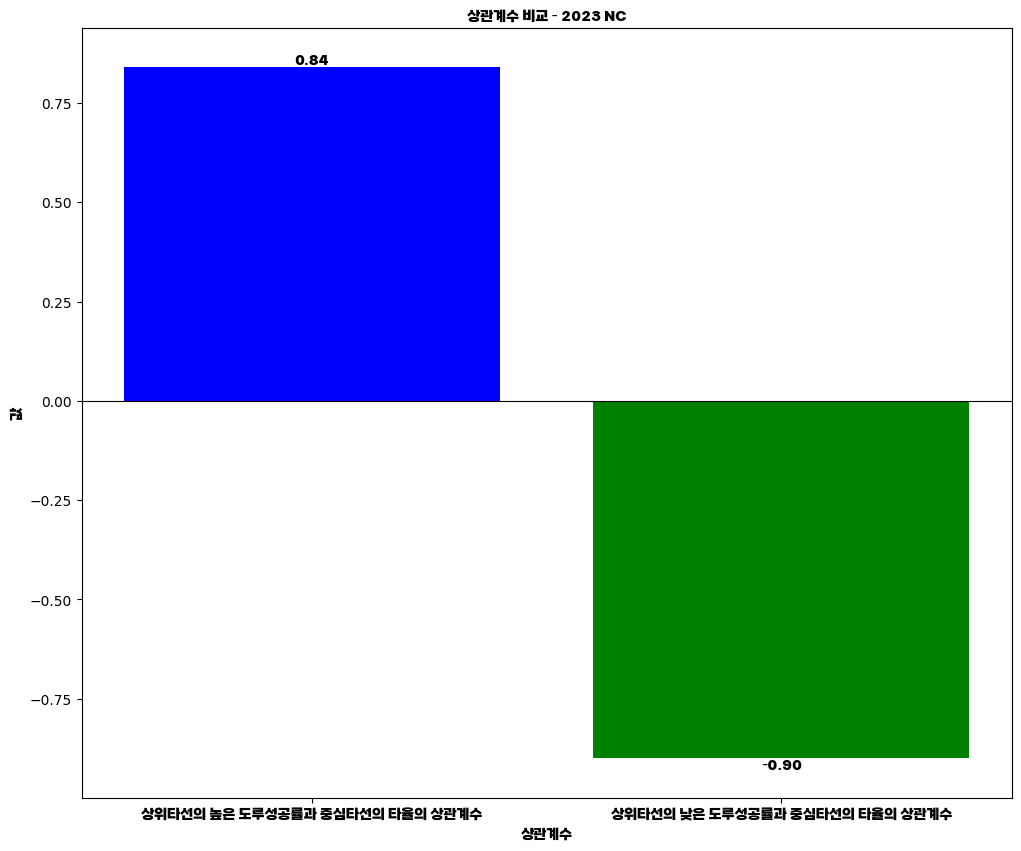

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 NC', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_2022.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

nc_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
nc_2022['타율'] = pd.to_numeric(nc_2022['타율'], errors='coerce')
nc_2022['도루성공률'] = pd.to_numeric(nc_2022['도루성공률'], errors='coerce')

nc_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
nc_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      237 non-null    int64  
 1   선수명     237 non-null    object 
 2   팀명      237 non-null    object 
 3   타율      233 non-null    float64
 4   타수      237 non-null    int64  
 5   타점      237 non-null    int64  
 6   타순      237 non-null    object 
 7   도루허용    237 non-null    int64  
 8   도루저지    237 non-null    int64  
 9   도루성공률   183 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 18.6+ KB


In [ ]:
able = doosan_2022[doosan_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2022[doosan_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2022[doosan_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(37, 10) (72, 9) (130, 9)


In [ ]:
table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.820758900149303, p-value: 9.274026991131333e-06

상관계수: -0.8838682282080936, p-value: 9.641594932039758e-11


<Figure size 2000x600 with 0 Axes>

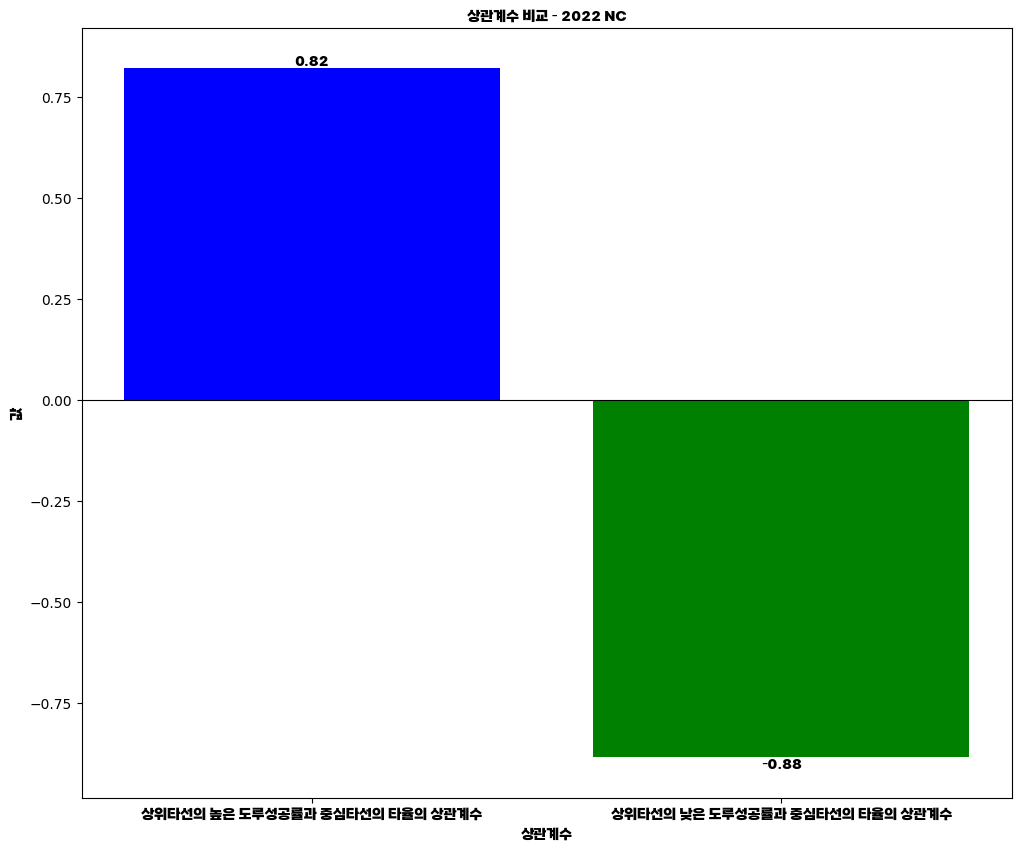

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 NC', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_batting_order_2021.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

nc_2021 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
nc_2021['타율'] = pd.to_numeric(nc_2021['타율'], errors='coerce')
nc_2021['도루성공률'] = pd.to_numeric(nc_2021['도루성공률'], errors='coerce')


nc_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
nc_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      266 non-null    int64  
 1   선수명     266 non-null    object 
 2   팀명      266 non-null    object 
 3   타율      260 non-null    float64
 4   타수      266 non-null    int64  
 5   타점      266 non-null    int64  
 6   타순      266 non-null    object 
 7   도루허용    266 non-null    int64  
 8   도루저지    266 non-null    int64  
 9   도루성공률   202 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.9+ KB


In [ ]:
able = nc_2021[nc_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = nc_2021[nc_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = nc_2021[nc_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(37, 10) (70, 10) (122, 10)
상관계수: 0.7893277179662365, p-value: 3.510324424103249e-05

상관계수: -0.8617597360291201, p-value: 9.59452364924599e-10


<Figure size 2000x600 with 0 Axes>

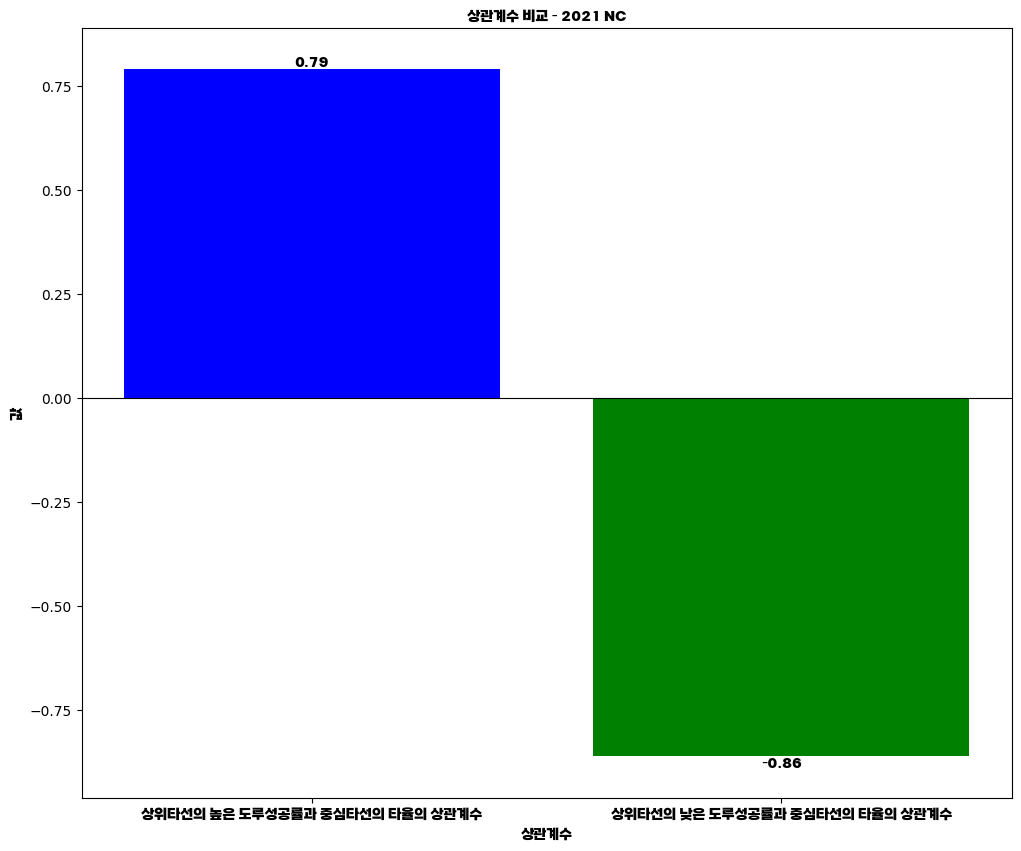

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 NC', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_2020.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


nc_2020 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
nc_2020['타율'] = pd.to_numeric(nc_2020['타율'], errors='coerce')
nc_2020['도루성공률'] = pd.to_numeric(nc_2020['도루성공률'], errors='coerce')

nc_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
nc_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      241 non-null    int64  
 1   선수명     241 non-null    object 
 2   팀명      241 non-null    object 
 3   타율      235 non-null    float64
 4   타수      241 non-null    int64  
 5   타점      241 non-null    int64  
 6   타순      241 non-null    object 
 7   도루허용    241 non-null    int64  
 8   도루저지    241 non-null    int64  
 9   도루성공률   178 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 19.0+ KB


In [ ]:
table = nc_2020[nc_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = nc_2020[nc_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = nc_2020[nc_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(44, 10) (74, 10) (111, 10)
상관계수: 0.5212036756986078, p-value: 0.0031430427392232464

상관계수: -0.9021902774872469, p-value: 5.4307279951488757e-08


<Figure size 2000x600 with 0 Axes>

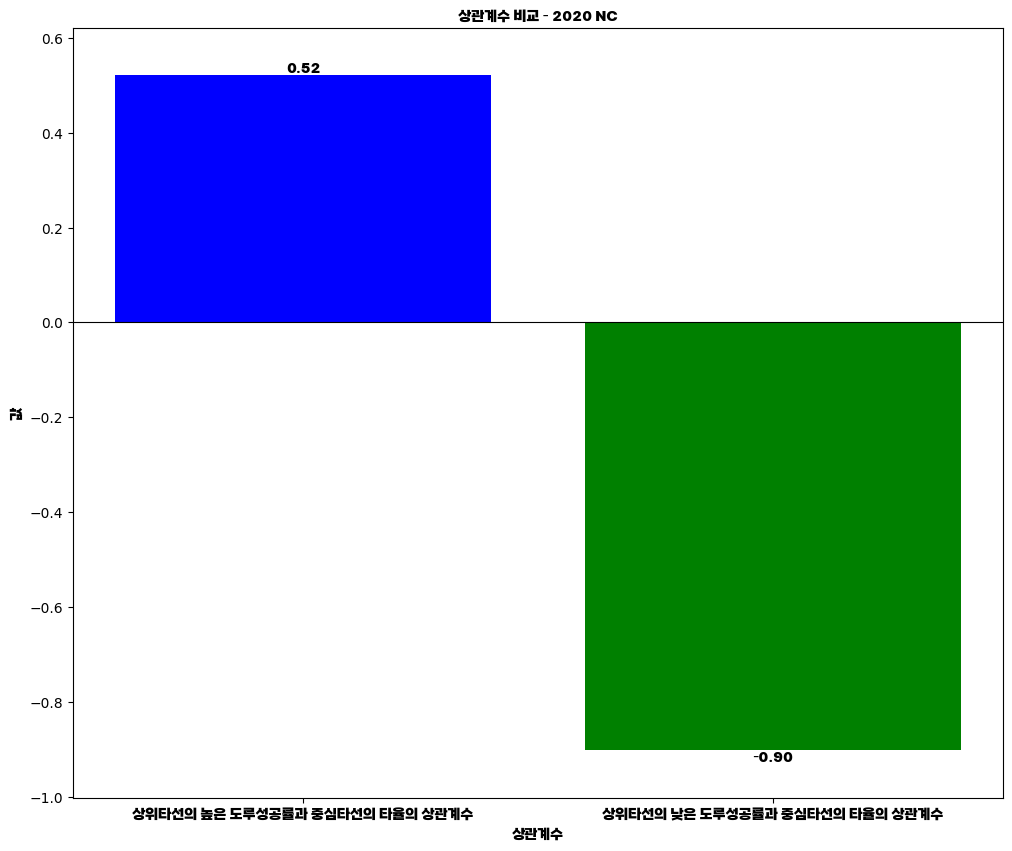

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 NC', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/NC/NC_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


nc_2019 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
nc_2019['타율'] = pd.to_numeric(nc_2019['타율'], errors='coerce')
nc_2019['도루성공률'] = pd.to_numeric(nc_2019['도루성공률'], errors='coerce')

nc_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
nc_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      257 non-null    int64  
 1   선수명     257 non-null    object 
 2   팀명      257 non-null    object 
 3   타율      254 non-null    float64
 4   타수      257 non-null    int64  
 5   타점      257 non-null    int64  
 6   타순      257 non-null    object 
 7   도루허용    257 non-null    int64  
 8   도루저지    257 non-null    int64  
 9   도루성공률   203 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.2+ KB


In [ ]:
table = nc_2019[nc_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = nc_2019[nc_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = nc_2019[nc_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(49, 10) (77, 10) (116, 10)
상관계수: 0.7888657260267807, p-value: 3.573700122023288e-05

상관계수: -0.9354280045117286, p-value: 3.605170388225405e-14


<Figure size 2000x600 with 0 Axes>

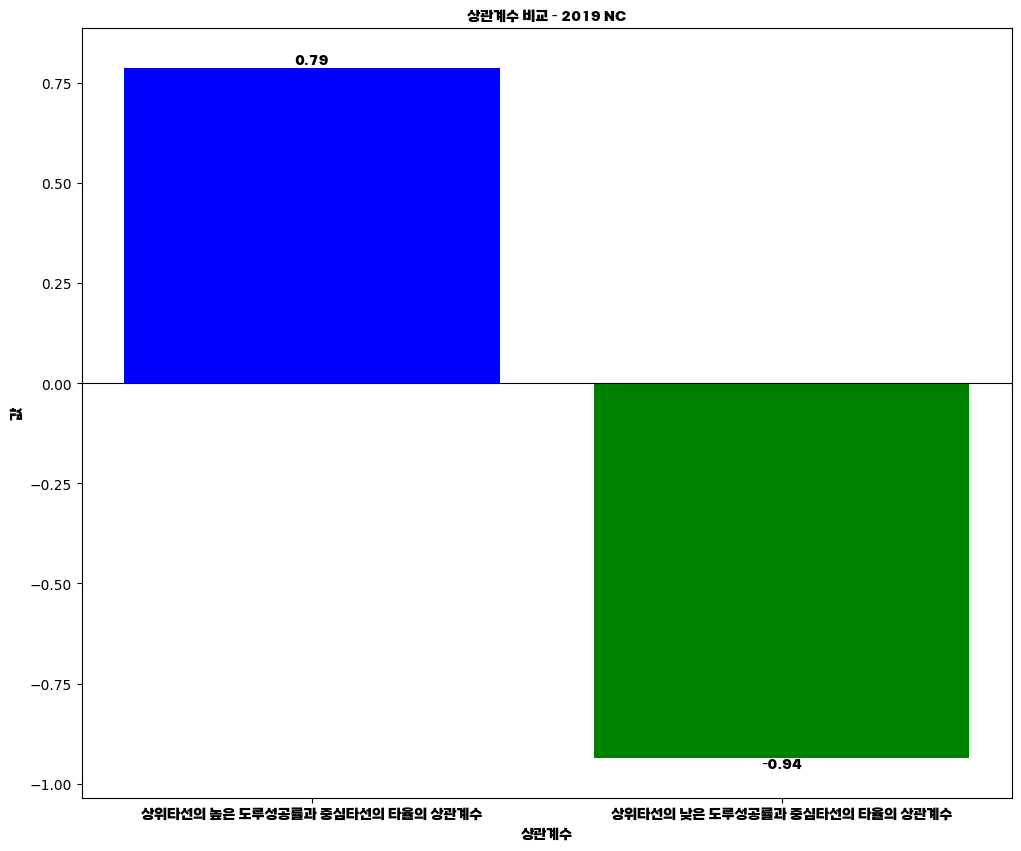

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 NC', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# SSG

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_2023.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_batting_order_2023.csv', encoding='cp949')

In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ssg_2023 = df4.merge(df3_run, on='선수명')
ssg_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,김정민,SSG,1.0,1,1,0,0,0,0,0,0,0,0,1번,0,0,-
1,14,김정민,SSG,0.000,1,0,0,0,0,0,0,0,1,0,6번,0,0,-
2,1,김정민,SSG,1.0,1,1,0,0,0,0,0,0,0,0,상위(1~2번),0,0,-
3,23,김정민,SSG,0.0,1,0,0,0,0,0,0,0,1,0,하위(6~9번),0,0,-
4,2,오태곤,SSG,0.408,49,20,6,1,2,7,3,1,6,2,1번,20,1,95.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,4,이재원,SSG,0.250,4,1,0,0,0,0,0,0,1,0,8번,0,0,-
231,17,이재원,SSG,0.075,40,3,1,0,0,2,2,0,7,4,9번,0,0,-
232,21,이재원,SSG,0.091,44,4,1,0,0,2,2,0,8,4,하위(6~9번),0,0,-
233,17,김건웅,SSG,0.000,3,0,0,0,0,0,0,0,2,0,8번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ssg_2023['타율'] = pd.to_numeric(ssg_2023['타율'], errors='coerce')
ssg_2023['도루성공률'] = pd.to_numeric(ssg_2023['도루성공률'], errors='coerce')

ssg_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ssg_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      235 non-null    int64  
 1   선수명     235 non-null    object 
 2   팀명      235 non-null    object 
 3   타율      226 non-null    float64
 4   타수      235 non-null    int64  
 5   타점      235 non-null    int64  
 6   타순      235 non-null    object 
 7   도루허용    235 non-null    int64  
 8   도루저지    235 non-null    int64  
 9   도루성공률   146 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 18.5+ KB


In [ ]:
table = ssg_2023[ssg_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ssg_2023[ssg_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ssg_2023[ssg_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(53, 10) (72, 10) (110, 10)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(35, 10)

In [ ]:
table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')


table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.6520114958465095, p-value: 9.47261207365862e-05

상관계수: -0.8477405819982652, p-value: 2.3707293517737784e-06


<Figure size 2000x600 with 0 Axes>

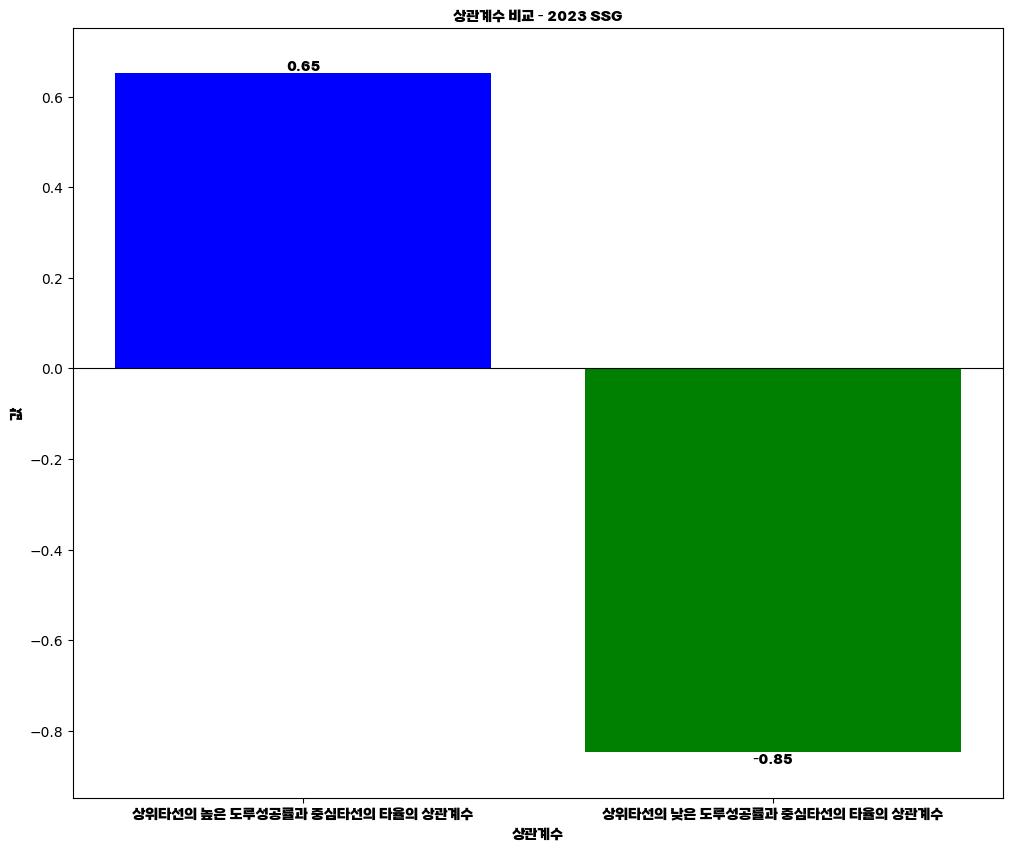

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 SSG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_2022.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ssg_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ssg_2022['타율'] = pd.to_numeric(ssg_2022['타율'], errors='coerce')
ssg_2022['도루성공률'] = pd.to_numeric(ssg_2022['도루성공률'], errors='coerce')

ssg_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ssg_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      247 non-null    int64  
 1   선수명     247 non-null    object 
 2   팀명      247 non-null    object 
 3   타율      240 non-null    float64
 4   타수      247 non-null    int64  
 5   타점      247 non-null    int64  
 6   타순      247 non-null    object 
 7   도루허용    247 non-null    int64  
 8   도루저지    247 non-null    int64  
 9   도루성공률   144 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 19.4+ KB


In [ ]:
able = ssg_2022[ssg_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ssg_2022[ssg_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ssg_2022[ssg_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(35, 10) (74, 10) (119, 10)


In [ ]:
table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.7647453418897004, p-value: 8.598001555037216e-05

상관계수: -0.9583172937918256, p-value: 9.066557763294002e-17


<Figure size 2000x600 with 0 Axes>

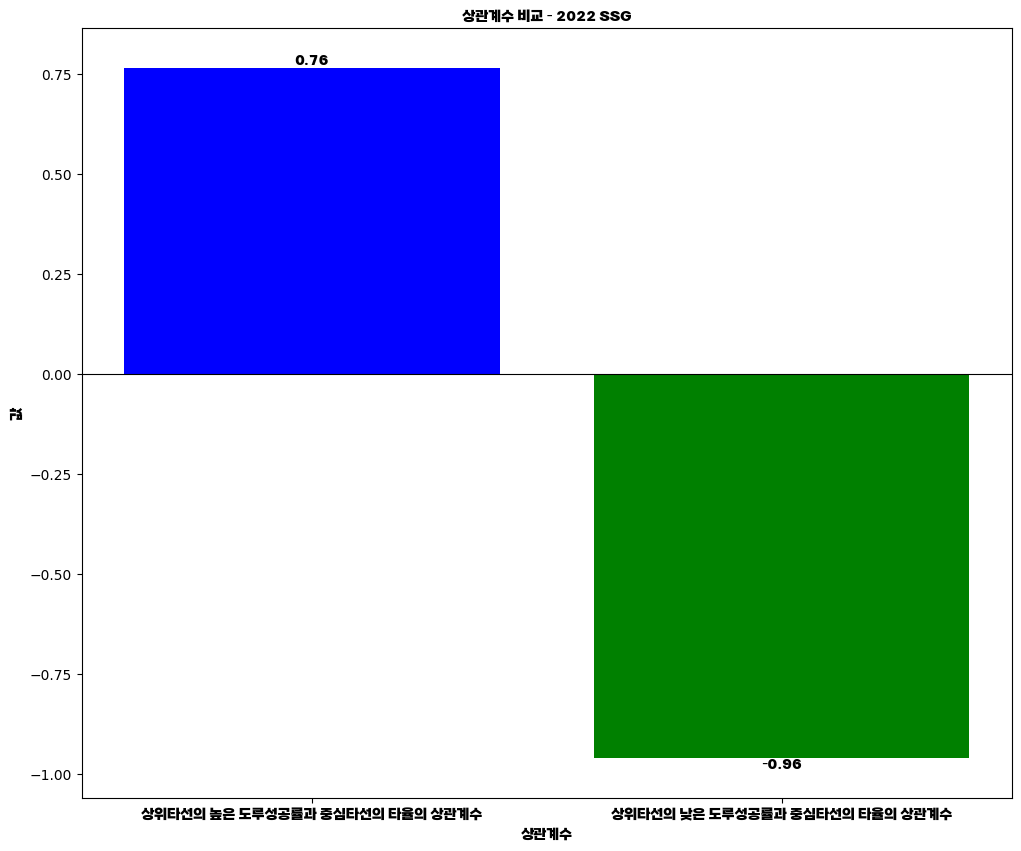

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 SSG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_batting_order_2021.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ssg_2021 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ssg_2021['타율'] = pd.to_numeric(ssg_2021['타율'], errors='coerce')
ssg_2021['도루성공률'] = pd.to_numeric(ssg_2021['도루성공률'], errors='coerce')


ssg_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ssg_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      231 non-null    int64  
 1   선수명     231 non-null    object 
 2   팀명      231 non-null    object 
 3   타율      223 non-null    float64
 4   타수      231 non-null    int64  
 5   타점      231 non-null    int64  
 6   타순      231 non-null    object 
 7   도루허용    231 non-null    int64  
 8   도루저지    231 non-null    int64  
 9   도루성공률   159 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 18.2+ KB


In [ ]:
able = ssg_2021[ssg_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ssg_2021[ssg_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ssg_2021[ssg_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(35, 10) (68, 10) (109, 10)
상관계수: 0.7919164048159478, p-value: 3.1728650721086924e-05

상관계수: -0.9358798993686658, p-value: 3.276807716102376e-14


<Figure size 2000x600 with 0 Axes>

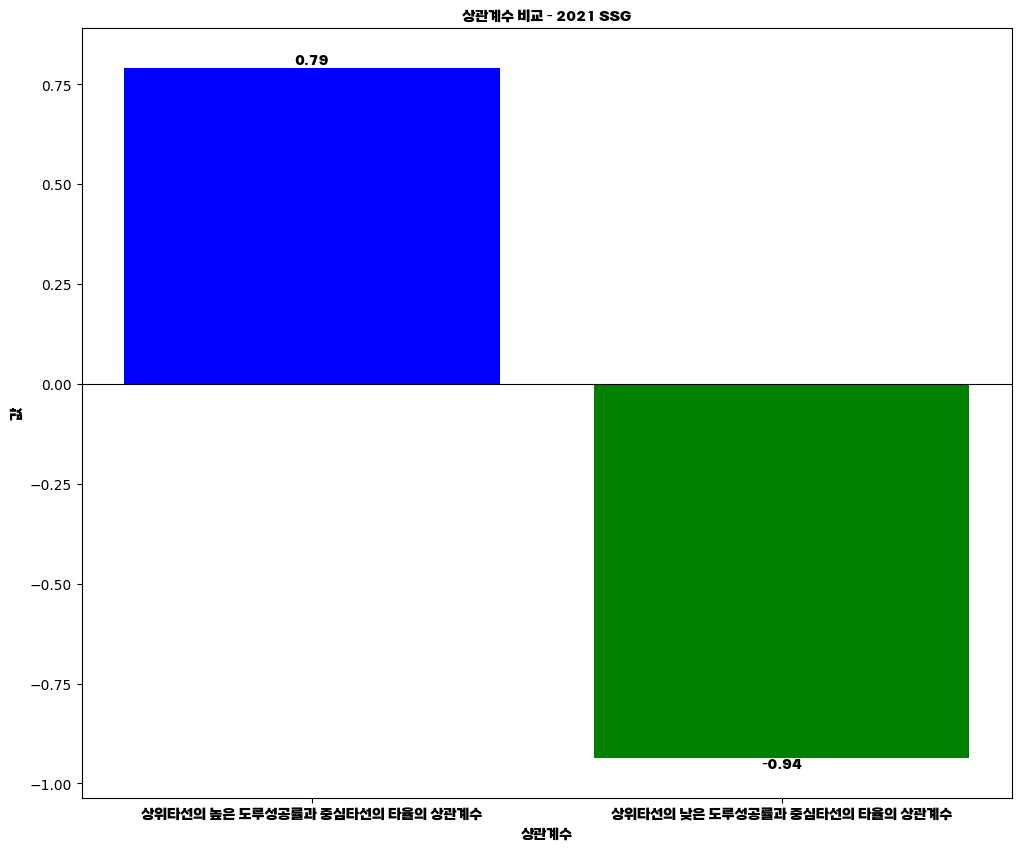

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 SSG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_2020.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


ssg_2020 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ssg_2020['타율'] = pd.to_numeric(ssg_2020['타율'], errors='coerce')
ssg_2020['도루성공률'] = pd.to_numeric(ssg_2020['도루성공률'], errors='coerce')

ssg_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ssg_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      286 non-null    int64  
 1   선수명     286 non-null    object 
 2   팀명      286 non-null    object 
 3   타율      283 non-null    float64
 4   타수      286 non-null    int64  
 5   타점      286 non-null    int64  
 6   타순      286 non-null    object 
 7   도루허용    286 non-null    int64  
 8   도루저지    286 non-null    int64  
 9   도루성공률   213 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 22.5+ KB


In [ ]:
table = ssg_2020[ssg_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ssg_2020[ssg_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ssg_2020[ssg_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(53, 10) (91, 10) (134, 10)
상관계수: 0.746356327021254, p-value: 2.1860447151133377e-06

상관계수: -0.674858708069271, p-value: 0.0010974163408522402


<Figure size 2000x600 with 0 Axes>

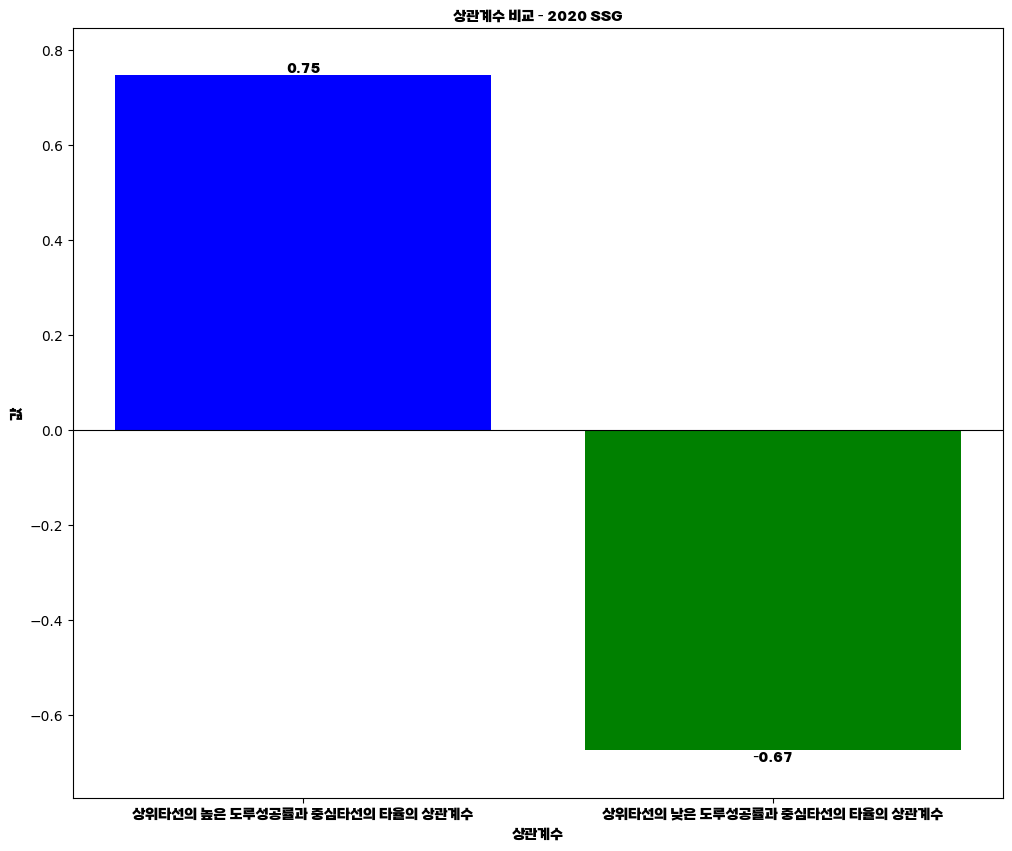

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 SSG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/SSG/SSG_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]


ssg_2019 = df4.merge(df3_run, on='선수명')

# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ssg_2019['타율'] = pd.to_numeric(ssg_2019['타율'], errors='coerce')
ssg_2019['도루성공률'] = pd.to_numeric(ssg_2019['도루성공률'], errors='coerce')

ssg_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ssg_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      214 non-null    int64  
 1   선수명     214 non-null    object 
 2   팀명      214 non-null    object 
 3   타율      214 non-null    float64
 4   타수      214 non-null    int64  
 5   타점      214 non-null    int64  
 6   타순      214 non-null    object 
 7   도루허용    214 non-null    int64  
 8   도루저지    214 non-null    int64  
 9   도루성공률   138 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 16.8+ KB


In [ ]:
table = ssg_2019[ssg_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ssg_2019[ssg_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ssg_2019[ssg_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(20, '도루성공률')
center_1 = center.nlargest(20, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(34, 10) (60, 10) (108, 10)
상관계수: 0.8278330850449424, p-value: 6.634448719964253e-06

상관계수: -0.9519248645914491, p-value: 6.423397522042276e-16


<Figure size 2000x600 with 0 Axes>

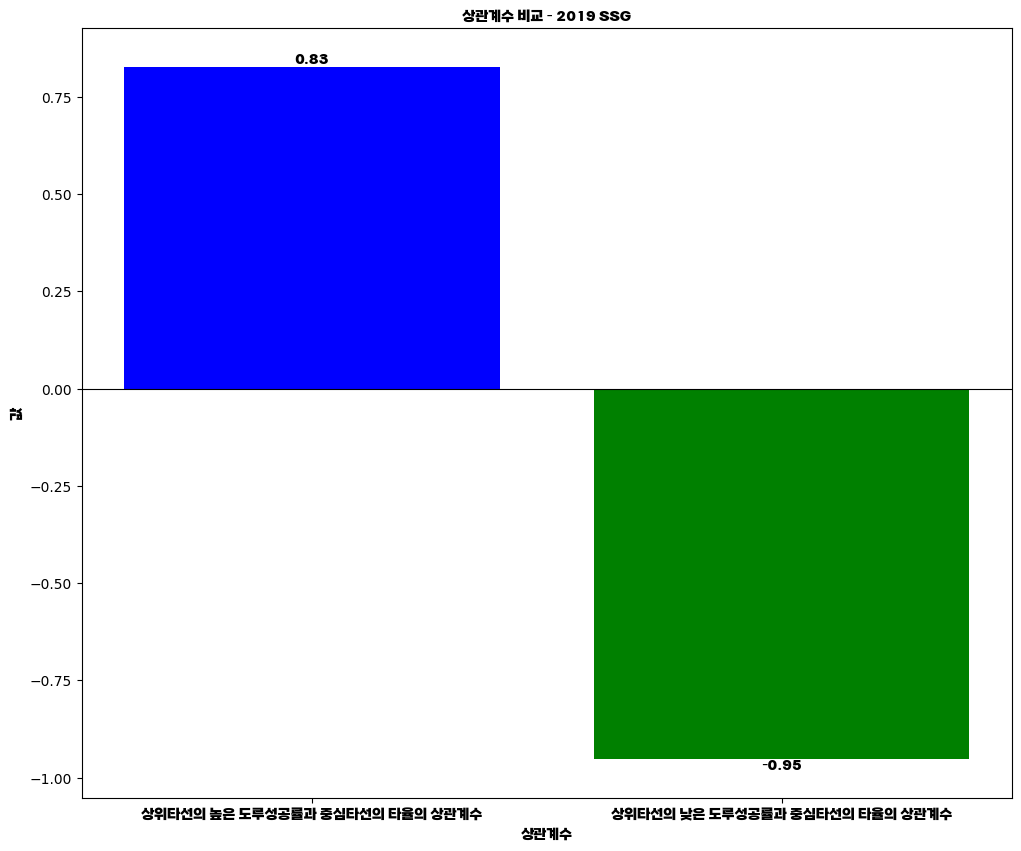

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 SSG', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# KT

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_2023.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/runner/KT_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/batting_order/KT_batting_order_2023.csv', encoding='cp949')

In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kt_2023 = df4.merge(df3_run, on='선수명')
kt_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,문상철,KT,0.429,7,3,1,0,0,1,0,0,2,0,1번,3,1,75.0
1,11,문상철,KT,0.250,12,3,0,0,0,2,1,0,4,0,2번,3,1,75.0
2,9,문상철,KT,0.209,67,14,4,0,0,6,4,0,16,0,3번,3,1,75.0
3,3,문상철,KT,0.333,27,9,5,0,0,4,3,0,6,1,4번,3,1,75.0
4,9,문상철,KT,0.256,78,20,5,0,4,16,2,2,21,1,5번,3,1,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,28,손민석,KT,0.1,10,1,0,0,0,1,1,1,3,0,하위(6~9번),0,0,-
270,8,박민석,KT,0.25,4,1,0,0,0,0,0,0,3,0,9번,0,0,-
271,13,박민석,KT,0.25,4,1,0,0,0,0,0,0,3,0,하위(6~9번),0,0,-
272,22,김병준,KT,0.0,2,0,0,0,0,0,0,0,2,0,9번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kt_2023['타율'] = pd.to_numeric(kt_2023['타율'], errors='coerce')
kt_2023['도루성공률'] = pd.to_numeric(kt_2023['도루성공률'], errors='coerce')

kt_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kt_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      274 non-null    int64  
 1   선수명     274 non-null    object 
 2   팀명      274 non-null    object 
 3   타율      269 non-null    float64
 4   타수      274 non-null    int64  
 5   타점      274 non-null    int64  
 6   타순      274 non-null    object 
 7   도루허용    274 non-null    int64  
 8   도루저지    274 non-null    int64  
 9   도루성공률   222 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 21.5+ KB


In [ ]:
table = kt_2023[kt_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kt_2023[kt_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kt_2023[kt_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(68, 10) (69, 10) (137, 10)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(58, 10)

In [ ]:
table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')


table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.5459065306288653, p-value: 0.0018055027944784722

상관계수: -0.8029136400326207, p-value: 2.0322838699344627e-05


<Figure size 2000x600 with 0 Axes>

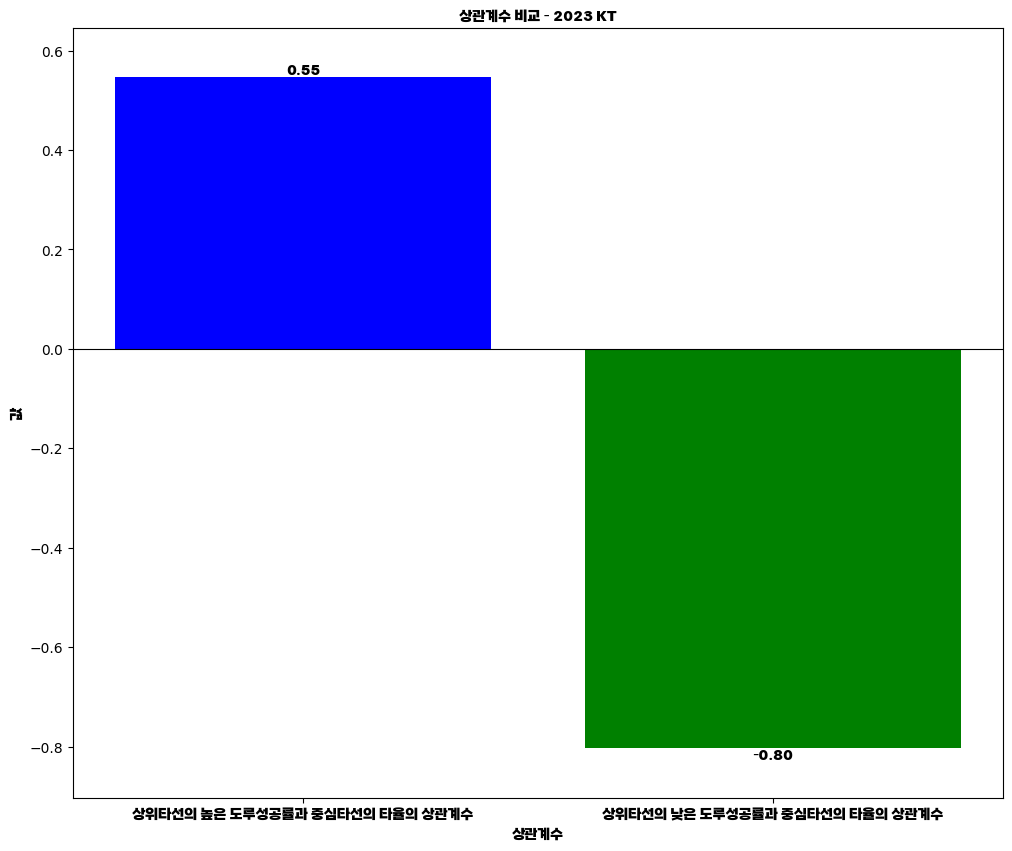

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 KT', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_2022.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/runner/KT_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/batting_order/KT_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kt_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kt_2022['타율'] = pd.to_numeric(kt_2022['타율'], errors='coerce')
kt_2022['도루성공률'] = pd.to_numeric(kt_2022['도루성공률'], errors='coerce')

kt_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kt_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      238 non-null    int64  
 1   선수명     238 non-null    object 
 2   팀명      238 non-null    object 
 3   타율      236 non-null    float64
 4   타수      238 non-null    int64  
 5   타점      238 non-null    int64  
 6   타순      238 non-null    object 
 7   도루허용    238 non-null    int64  
 8   도루저지    238 non-null    int64  
 9   도루성공률   192 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 18.7+ KB


In [ ]:
able = kt_2022[kt_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kt_2022[kt_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kt_2022[kt_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(58, 10) (79, 10) (105, 10)


In [ ]:
table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.4866052798559184, p-value: 0.0014532206763514192

상관계수: -0.6341286284546442, p-value: 0.00016805223990106792


<Figure size 2000x600 with 0 Axes>

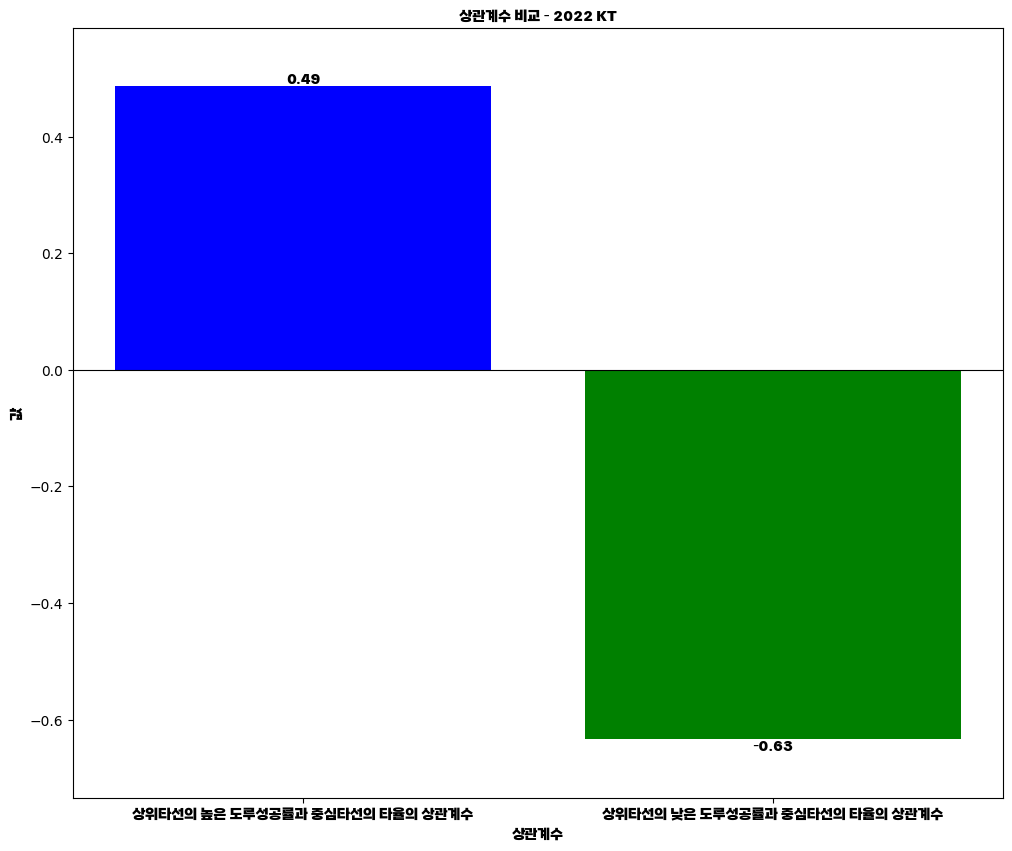

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 KT', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/runner/KT_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/batting_order/KT_batting_order_2021.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kt_2021 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kt_2021['타율'] = pd.to_numeric(kt_2021['타율'], errors='coerce')
kt_2021['도루성공률'] = pd.to_numeric(kt_2021['도루성공률'], errors='coerce')

kt_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kt_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259 entries, 0 to 258
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      259 non-null    int64  
 1   선수명     259 non-null    object 
 2   팀명      259 non-null    object 
 3   타율      255 non-null    float64
 4   타수      259 non-null    int64  
 5   타점      259 non-null    int64  
 6   타순      259 non-null    object 
 7   도루허용    259 non-null    int64  
 8   도루저지    259 non-null    int64  
 9   도루성공률   223 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.4+ KB


In [ ]:
able = kt_2021[kt_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kt_2021[kt_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kt_2021[kt_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(58, 10) (80, 10) (117, 10)
상관계수: 0.6050815431359664, p-value: 3.5341915226853044e-05

상관계수: -0.8781843949429962, p-value: 1.8149900853049395e-10


<Figure size 2000x600 with 0 Axes>

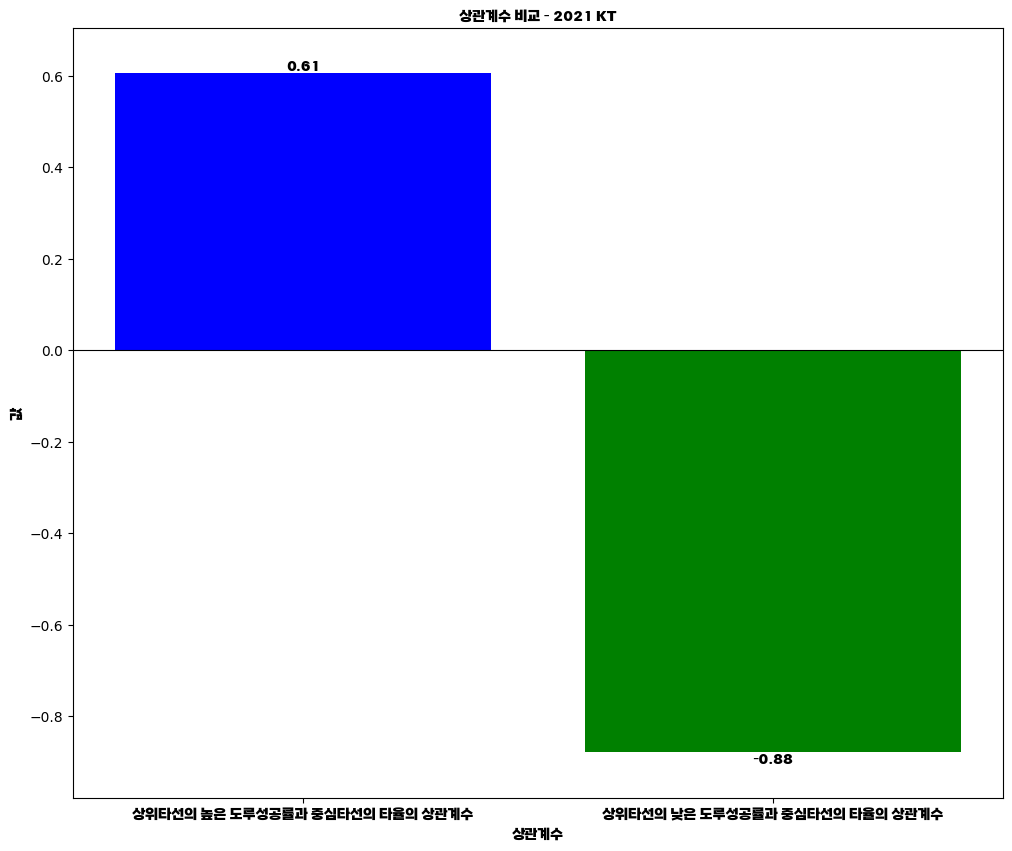

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 KT', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_2020.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/runner/KT_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/batting_order/KT_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kt_2020 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kt_2020['타율'] = pd.to_numeric(kt_2020['타율'], errors='coerce')
kt_2020['도루성공률'] = pd.to_numeric(kt_2020['도루성공률'], errors='coerce')

kt_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kt_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      211 non-null    int64  
 1   선수명     211 non-null    object 
 2   팀명      211 non-null    object 
 3   타율      205 non-null    float64
 4   타수      211 non-null    int64  
 5   타점      211 non-null    int64  
 6   타순      211 non-null    object 
 7   도루허용    211 non-null    int64  
 8   도루저지    211 non-null    int64  
 9   도루성공률   149 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 16.6+ KB


In [ ]:
table = kt_2020[kt_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kt_2020[kt_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kt_2020[kt_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(36, 10) (67, 10) (97, 10)
상관계수: 0.5734894491123976, p-value: 0.000922975439441771

상관계수: -0.6932664386491284, p-value: 0.0007008609723761298


<Figure size 2000x600 with 0 Axes>

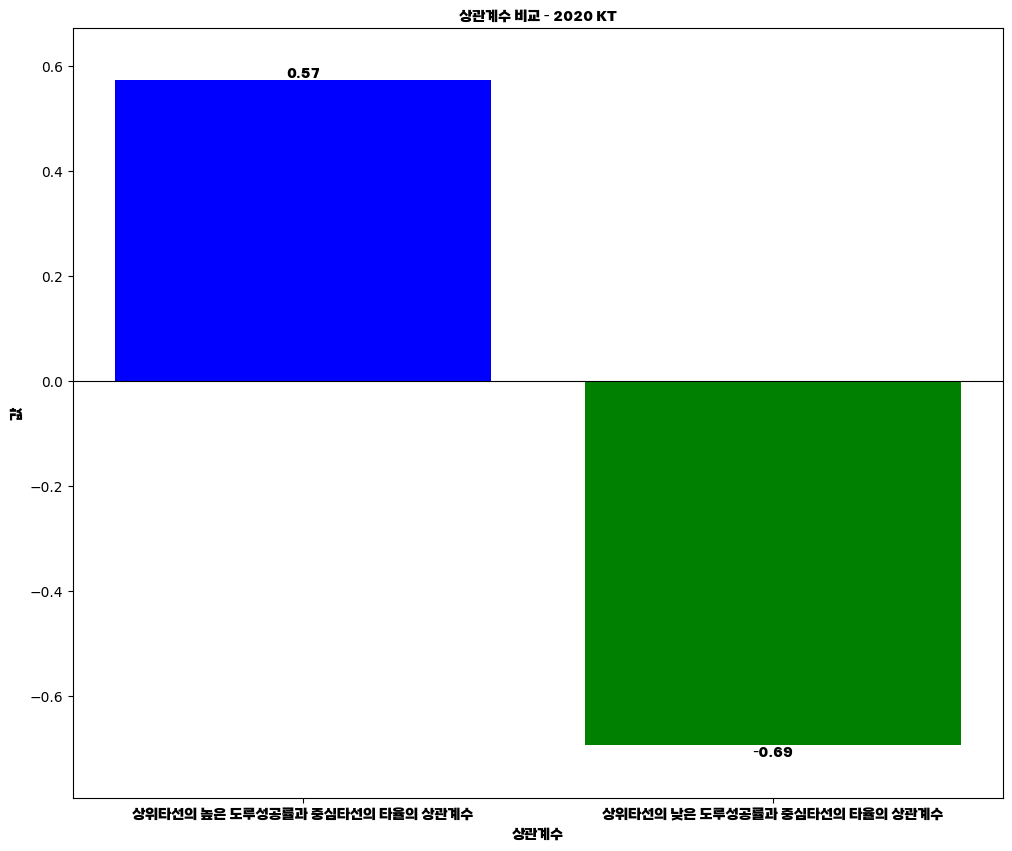

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 KT', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/hitter/KT_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/runner/KT_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/KT/batting_order/KT_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

kt_2019 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
kt_2019['타율'] = pd.to_numeric(kt_2019['타율'], errors='coerce')
kt_2019['도루성공률'] = pd.to_numeric(kt_2019['도루성공률'], errors='coerce')

kt_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
kt_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      224 non-null    int64  
 1   선수명     224 non-null    object 
 2   팀명      224 non-null    object 
 3   타율      218 non-null    float64
 4   타수      224 non-null    int64  
 5   타점      224 non-null    int64  
 6   타순      224 non-null    object 
 7   도루허용    224 non-null    int64  
 8   도루저지    224 non-null    int64  
 9   도루성공률   157 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 17.6+ KB


In [ ]:
table = kt_2019[kt_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = kt_2019[kt_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = kt_2019[kt_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(37, 10) (61, 10) (111, 10)
상관계수: 0.6178982618412286, p-value: 0.00027438162746015244

상관계수: -0.7660526198475616, p-value: 8.058292326258167e-07


<Figure size 2000x600 with 0 Axes>

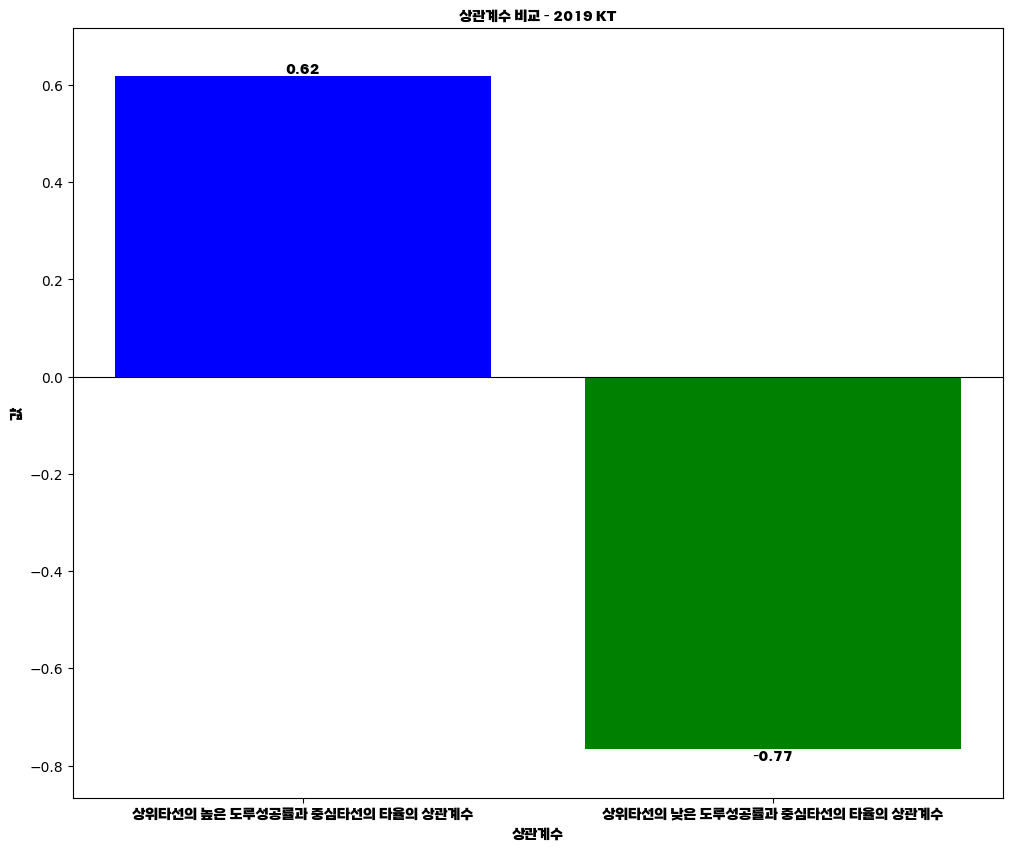

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 KT', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# 한화

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_2023.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_batting_order_2023.csv', encoding='cp949')

In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

hw_2023 = df4.merge(df3_run, on='선수명')
hw_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,최재훈,한화,1.0,1,1,1,0,0,2,0,0,0,0,1번,1,1,50.0
1,10,최재훈,한화,0.214,42,9,2,0,1,4,10,2,10,0,5번,1,1,50.0
2,10,최재훈,한화,0.262,122,32,2,0,0,7,15,11,14,5,6번,1,1,50.0
3,11,최재훈,한화,0.224,58,13,4,0,0,10,14,3,4,2,7번,1,1,50.0
4,9,최재훈,한화,0.247,93,23,2,0,0,9,15,7,18,2,8번,1,1,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,16,이민준,한화,-,0,0,0,0,0,0,1,0,0,0,8번,0,0,-
243,16,이민준,한화,0.0,1,0,0,0,0,0,0,0,0,0,9번,0,0,-
244,26,이민준,한화,0.0,1,0,0,0,0,0,1,0,0,0,하위(6~9번),0,0,-
245,16,이상혁,한화,0.0,2,0,0,0,0,0,0,0,1,0,9번,1,1,50.0


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
hw_2023['타율'] = pd.to_numeric(hw_2023['타율'], errors='coerce')
hw_2023['도루성공률'] = pd.to_numeric(hw_2023['도루성공률'], errors='coerce')

hw_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
hw_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      247 non-null    int64  
 1   선수명     247 non-null    object 
 2   팀명      247 non-null    object 
 3   타율      245 non-null    float64
 4   타수      247 non-null    int64  
 5   타점      247 non-null    int64  
 6   타순      247 non-null    object 
 7   도루허용    247 non-null    int64  
 8   도루저지    247 non-null    int64  
 9   도루성공률   183 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 19.4+ KB


In [ ]:
table = hw_2023[hw_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = hw_2023[hw_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = hw_2023[hw_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(54, 10) (66, 10) (127, 10)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(47, 10)

In [ ]:
table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')


table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.570879886195321, p-value: 0.000985946302645288

상관계수: -0.8971573761963143, p-value: 8.370797071328346e-08


<Figure size 2000x600 with 0 Axes>

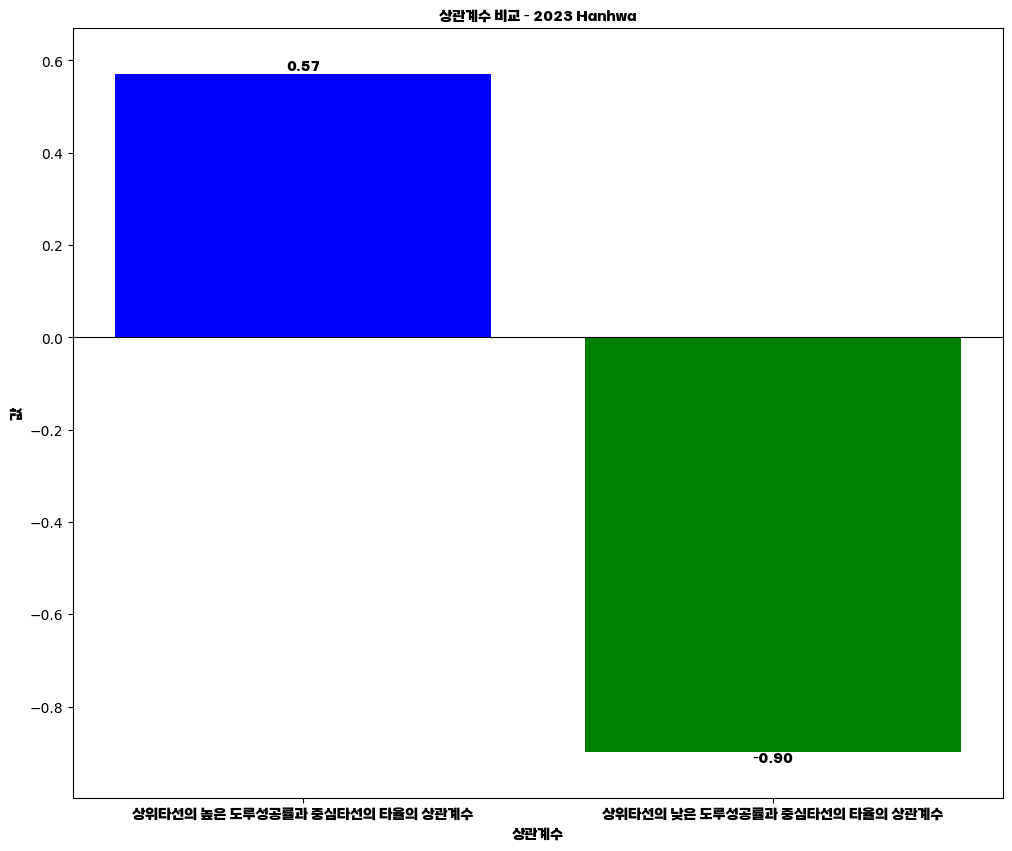

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 Hanhwa', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_2022.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

hw_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
hw_2022['타율'] = pd.to_numeric(hw_2022['타율'], errors='coerce')
hw_2022['도루성공률'] = pd.to_numeric(hw_2022['도루성공률'], errors='coerce')

hw_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
hw_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      227 non-null    int64  
 1   선수명     227 non-null    object 
 2   팀명      227 non-null    object 
 3   타율      226 non-null    float64
 4   타수      227 non-null    int64  
 5   타점      227 non-null    int64  
 6   타순      227 non-null    object 
 7   도루허용    227 non-null    int64  
 8   도루저지    227 non-null    int64  
 9   도루성공률   173 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 17.9+ KB


In [ ]:
able = doosan_2022[doosan_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = doosan_2022[doosan_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = doosan_2022[doosan_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(47, 10) (72, 9) (130, 9)


In [ ]:
table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.6314697284760735, p-value: 1.2465654077373982e-05

상관계수: -0.899110178849386, p-value: 1.482060930262105e-11


<Figure size 2000x600 with 0 Axes>

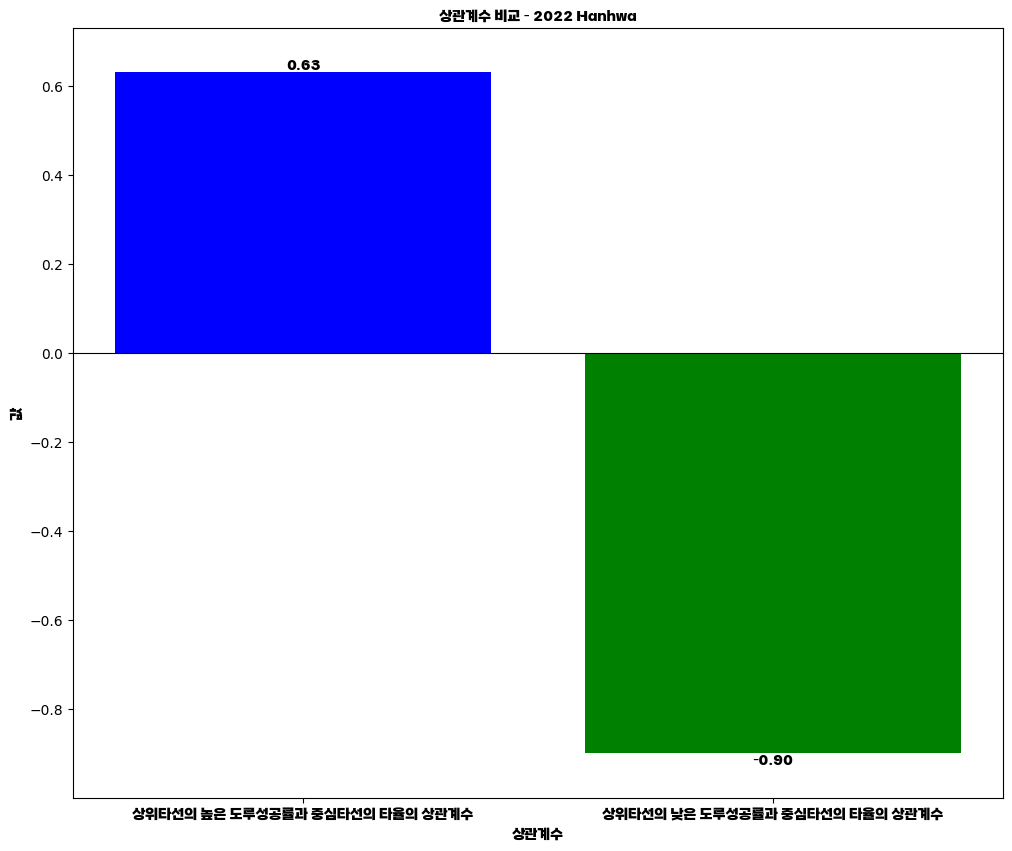

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 Hanhwa', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)


# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanwha_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_batting_order_2021.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

hw_2021 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
hw_2021['타율'] = pd.to_numeric(hw_2021['타율'], errors='coerce')
hw_2021['도루성공률'] = pd.to_numeric(hw_2021['도루성공률'], errors='coerce')

hw_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
hw_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      257 non-null    int64  
 1   선수명     257 non-null    object 
 2   팀명      257 non-null    object 
 3   타율      248 non-null    float64
 4   타수      257 non-null    int64  
 5   타점      257 non-null    int64  
 6   타순      257 non-null    object 
 7   도루허용    257 non-null    int64  
 8   도루저지    257 non-null    int64  
 9   도루성공률   197 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.2+ KB


In [ ]:
able = hw_2021[hw_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = hw_2021[hw_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = hw_2021[hw_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(47, 10) (63, 10) (126, 10)
상관계수: 0.732711530449578, p-value: 7.651581742902767e-08

상관계수: -0.7450782016233108, p-value: 2.3250547731397123e-06


<Figure size 2000x600 with 0 Axes>

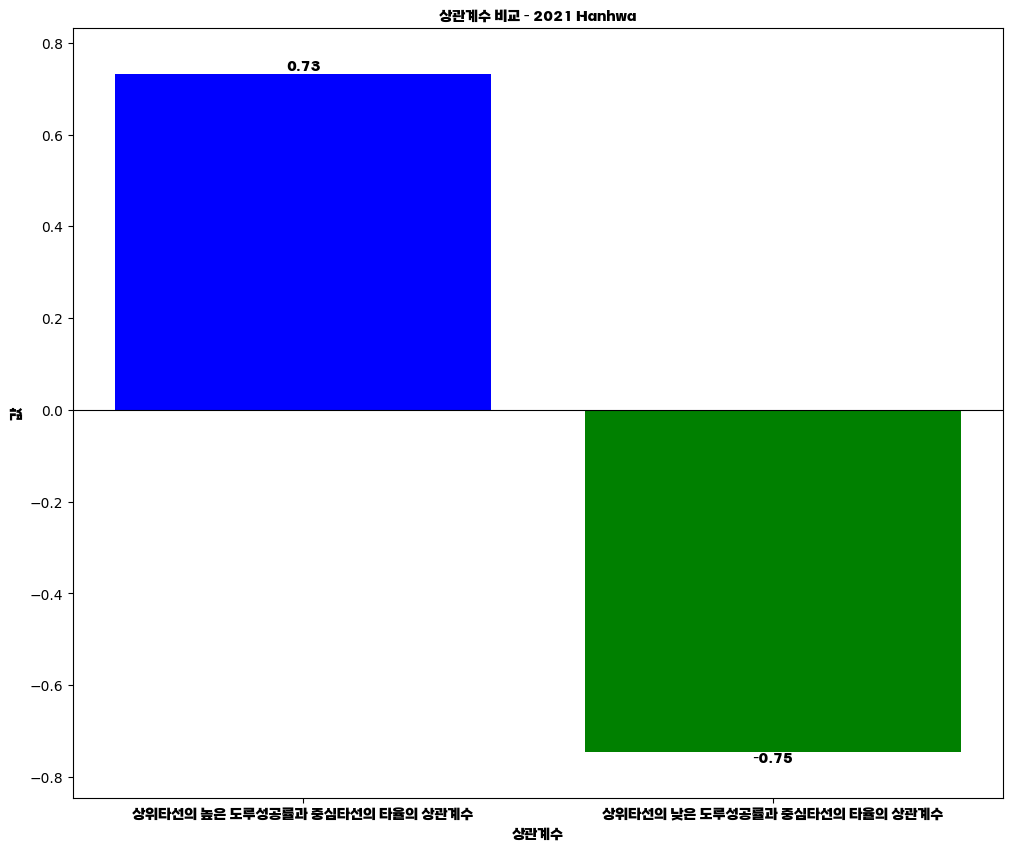

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 Hanhwa', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_2020.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

hw_2020 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
hw_2020['타율'] = pd.to_numeric(hw_2020['타율'], errors='coerce')
hw_2020['도루성공률'] = pd.to_numeric(hw_2020['도루성공률'], errors='coerce')

hw_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
hw_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      344 non-null    int64  
 1   선수명     344 non-null    object 
 2   팀명      344 non-null    object 
 3   타율      344 non-null    float64
 4   타수      344 non-null    int64  
 5   타점      344 non-null    int64  
 6   타순      344 non-null    object 
 7   도루허용    344 non-null    int64  
 8   도루저지    344 non-null    int64  
 9   도루성공률   173 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 27.0+ KB


In [ ]:
table = hw_2020[hw_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = hw_2020[hw_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = hw_2020[hw_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(39, 10) (103, 10) (165, 10)
상관계수: 0.6368758785026719, p-value: 0.0001542442876938714

상관계수: -0.4348350461815854, p-value: 0.05536344742276258


<Figure size 2000x600 with 0 Axes>

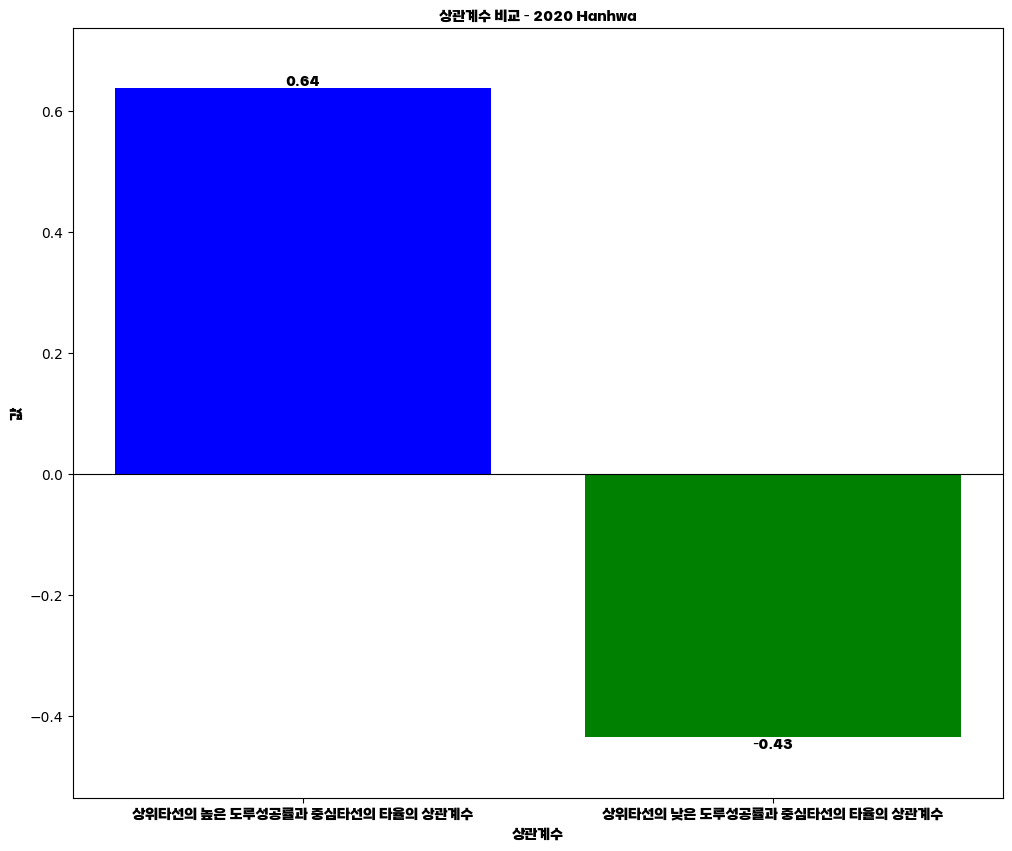

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 Hanhwa', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/한화/Hanhwa_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

hw_2019 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
hw_2019['타율'] = pd.to_numeric(hw_2019['타율'], errors='coerce')
hw_2019['도루성공률'] = pd.to_numeric(hw_2019['도루성공률'], errors='coerce')

hw_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
hw_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      254 non-null    int64  
 1   선수명     254 non-null    object 
 2   팀명      254 non-null    object 
 3   타율      247 non-null    float64
 4   타수      254 non-null    int64  
 5   타점      254 non-null    int64  
 6   타순      254 non-null    object 
 7   도루허용    254 non-null    int64  
 8   도루저지    254 non-null    int64  
 9   도루성공률   179 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.0+ KB


In [ ]:
table = hw_2019[hw_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = hw_2019[hw_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = hw_2019[hw_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(44, 10) (73, 10) (123, 10)
상관계수: 0.861018612252071, p-value: 1.0290905583540126e-09

상관계수: -0.9619806266373614, p-value: 2.5583123068457858e-17


<Figure size 2000x600 with 0 Axes>

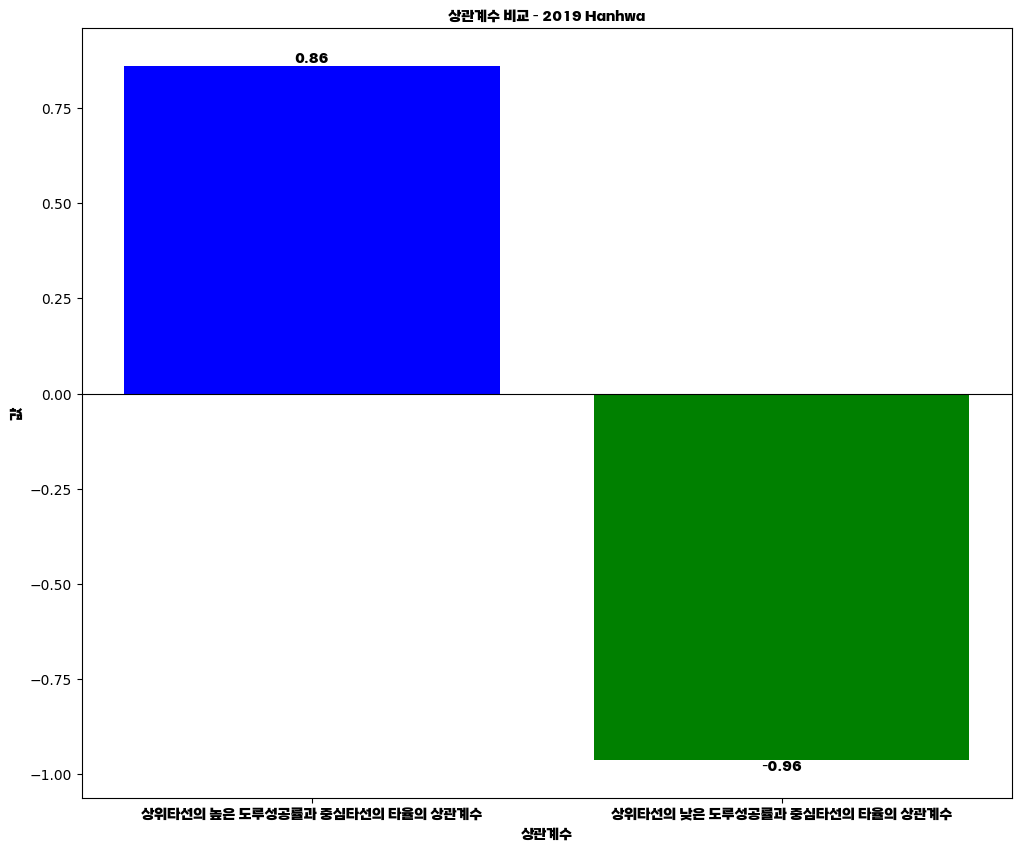

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 Hanhwa', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# 삼성

## 2023

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_2023.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_detail_2023.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_runner_2023.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_batting_order_2023.csv', encoding='cp949')


In [ ]:
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ss_2023 = df4.merge(df3_run, on='선수명')
ss_2023

,순위,선수명,팀명,타율,타수,안타,2루타,3루타,홈런,타점,볼넷,사구,삼진,병살타,타순,도루허용,도루저지,도루성공률
0,1,구자욱,삼성,0.373,67,25,9,0,1,10,8,1,7,0,1번,12,4,75.0
1,5,구자욱,삼성,0.286,28,8,4,0,0,3,1,0,7,0,2번,12,4,75.0
2,4,구자욱,삼성,0.349,332,116,23,0,10,55,42,3,62,5,3번,12,4,75.0
3,7,구자욱,삼성,0.143,21,3,1,1,0,3,0,0,4,0,4번,12,4,75.0
4,15,구자욱,삼성,0.0,3,0,0,0,0,0,2,0,1,0,6번,12,4,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,24,김도환,삼성,0.0,2,0,0,0,0,0,1,0,0,0,8번,0,0,-
264,13,김도환,삼성,0.2,5,1,0,0,0,0,0,0,0,0,9번,0,0,-
265,26,김도환,삼성,0.143,7,1,0,0,0,0,1,0,0,0,하위(6~9번),0,0,-
266,21,이상민,삼성,0.0,1,0,0,0,0,0,0,0,0,0,9번,0,0,-


In [ ]:
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ss_2023['타율'] = pd.to_numeric(ss_2023['타율'], errors='coerce')
ss_2023['도루성공률'] = pd.to_numeric(ss_2023['도루성공률'], errors='coerce')

ss_2023.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ss_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      268 non-null    int64  
 1   선수명     268 non-null    object 
 2   팀명      268 non-null    object 
 3   타율      265 non-null    float64
 4   타수      268 non-null    int64  
 5   타점      268 non-null    int64  
 6   타순      268 non-null    object 
 7   도루허용    268 non-null    int64  
 8   도루저지    268 non-null    int64  
 9   도루성공률   191 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 21.1+ KB


In [ ]:
table = ss_2023[ss_2023['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ss_2023[ss_2023['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ss_2023[ss_2023['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]

print(table.shape, center.shape, bottom.shape)

(51, 10) (78, 10) (139, 10)


In [ ]:
table= table.dropna(subset=['도루성공률'])
table.shape

(43, 10)

In [ ]:
table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')


table_2 = table.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.6747767359601302, p-value: 4.318370111594119e-05

상관계수: -0.9112596600737436, p-value: 2.340246975220576e-08


<Figure size 2000x600 with 0 Axes>

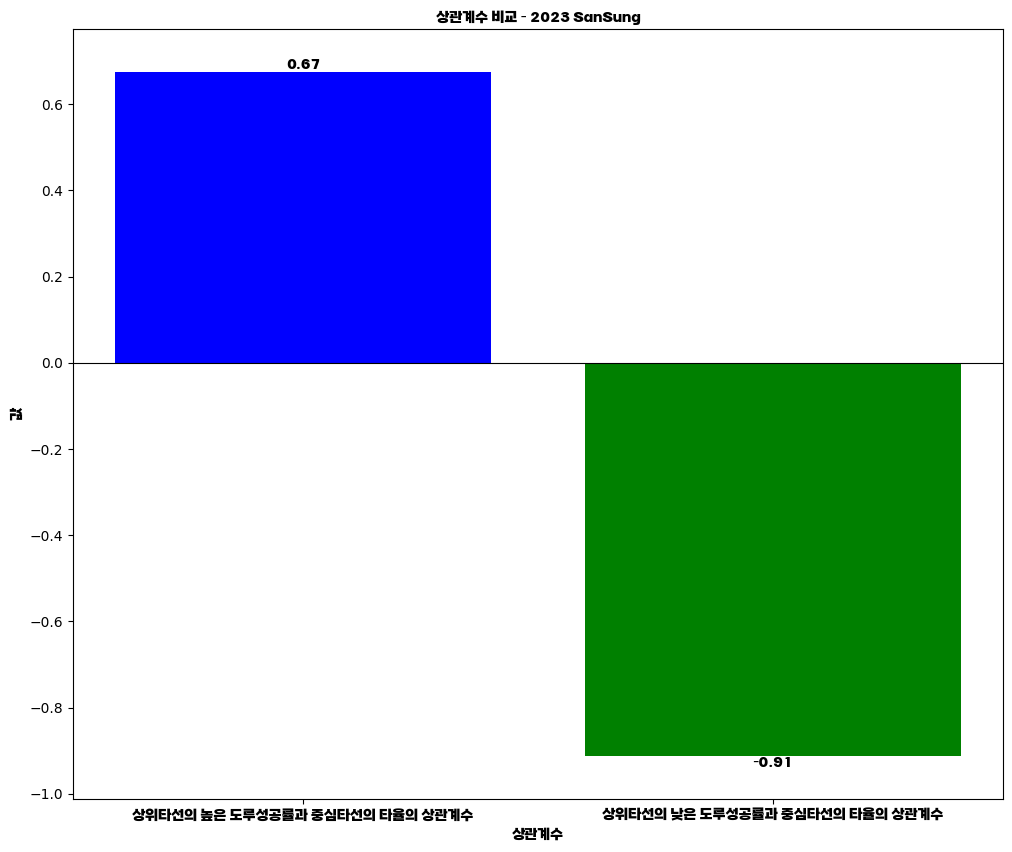

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2023 SanSung', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_2022.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_detail_2022.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_runner_2022.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_batting_order_2022.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ss_2022 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ss_2022['타율'] = pd.to_numeric(ss_2022['타율'], errors='coerce')
ss_2022['도루성공률'] = pd.to_numeric(ss_2022['도루성공률'], errors='coerce')

ss_2022.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ss_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      283 non-null    int64  
 1   선수명     283 non-null    object 
 2   팀명      283 non-null    object 
 3   타율      278 non-null    float64
 4   타수      283 non-null    int64  
 5   타점      283 non-null    int64  
 6   타순      283 non-null    object 
 7   도루허용    283 non-null    int64  
 8   도루저지    283 non-null    int64  
 9   도루성공률   150 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 22.2+ KB


In [ ]:
able = ss_2022[ss_2022['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ss_2022[ss_2022['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ss_2022[ss_2022['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)

(43, 10) (87, 10) (138, 10)


In [ ]:
table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

상관계수: 0.614631656512874, p-value: 2.450271352364611e-05

상관계수: -0.8746145253583958, p-value: 2.657964521572352e-10


<Figure size 2000x600 with 0 Axes>

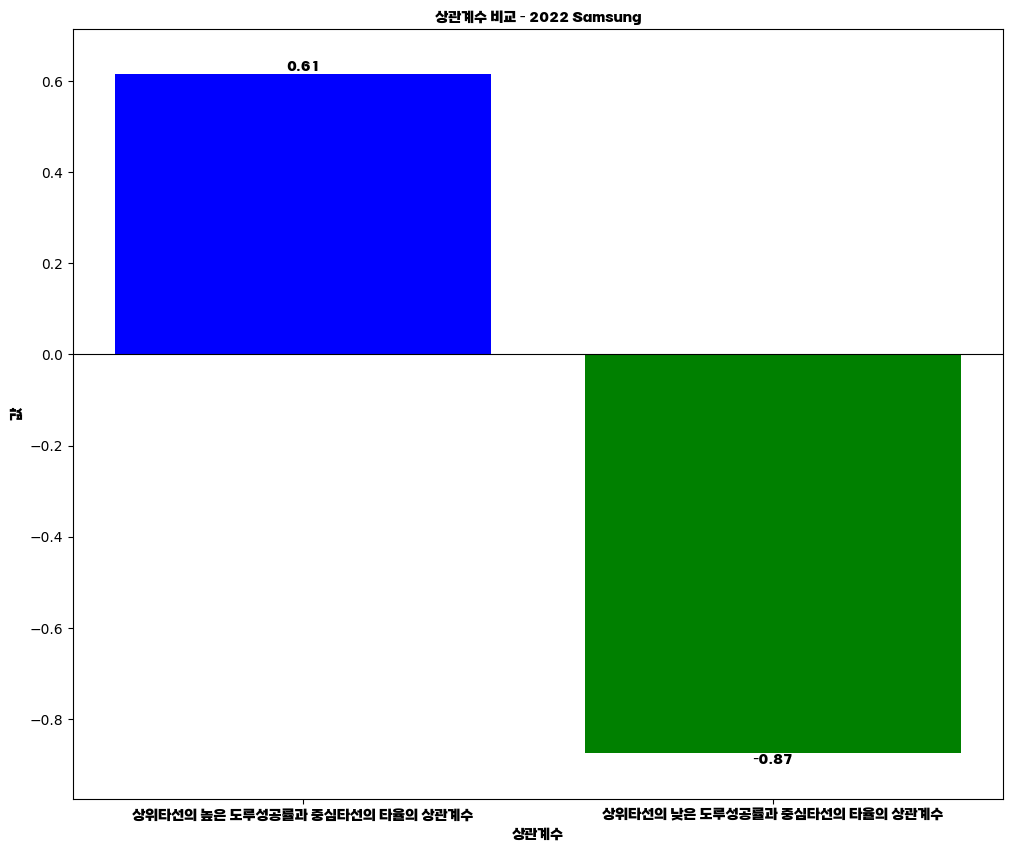

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2022 Samsung', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_2021.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_detail_2021.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_runner_2021.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_batting_order_2021.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ss_2021 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ss_2021['타율'] = pd.to_numeric(ss_2021['타율'], errors='coerce')
ss_2021['도루성공률'] = pd.to_numeric(ss_2021['도루성공률'], errors='coerce')

ss_2021.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ss_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      212 non-null    int64  
 1   선수명     212 non-null    object 
 2   팀명      212 non-null    object 
 3   타율      212 non-null    float64
 4   타수      212 non-null    int64  
 5   타점      212 non-null    int64  
 6   타순      212 non-null    object 
 7   도루허용    212 non-null    int64  
 8   도루저지    212 non-null    int64  
 9   도루성공률   149 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 16.7+ KB


In [ ]:
able = ss_2021[ss_2021['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ss_2021[ss_2021['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ss_2021[ss_2021['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])

print(table.shape, center.shape, bottom.shape)

table_1 = table.nlargest(40, '도루성공률')
center_1 = center.nlargest(40, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율

(43, 10) (66, 10) (97, 10)
상관계수: 0.7122480126595438, p-value: 2.544936314908505e-07

상관계수: -0.7995065740736333, p-value: 1.1624409197104891e-07


<Figure size 2000x600 with 0 Axes>

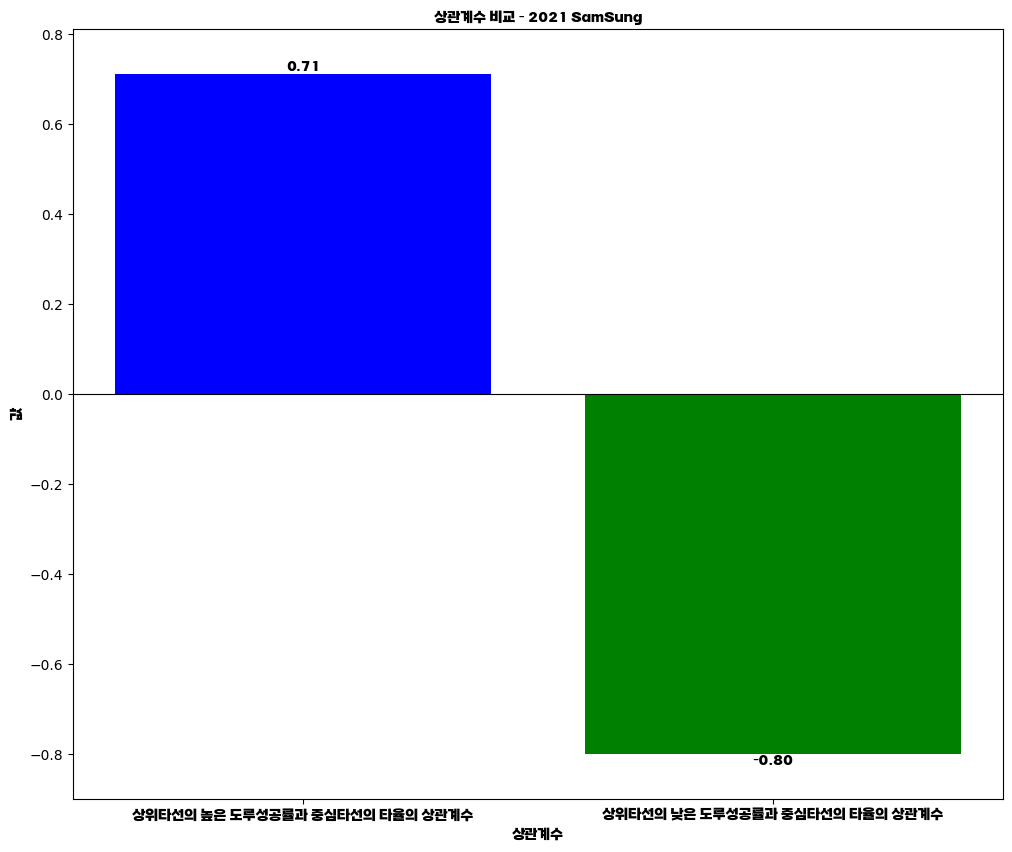

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2021 SamSung', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_2020.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_detail_2020.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_runner_2020.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_batting_order_2020.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ss_2020 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ss_2020['타율'] = pd.to_numeric(ss_2020['타율'], errors='coerce')
ss_2020['도루성공률'] = pd.to_numeric(ss_2020['도루성공률'], errors='coerce')

ss_2020.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ss_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      265 non-null    int64  
 1   선수명     265 non-null    object 
 2   팀명      265 non-null    object 
 3   타율      260 non-null    float64
 4   타수      265 non-null    int64  
 5   타점      265 non-null    int64  
 6   타순      265 non-null    object 
 7   도루허용    265 non-null    int64  
 8   도루저지    265 non-null    int64  
 9   도루성공률   194 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 20.8+ KB


In [ ]:
table = ss_2020[ss_2020['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ss_2020[ss_2020['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ss_2020[ss_2020['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table_0= table.dropna(subset=['도루성공률'])
print(table_0.shape, center.shape, bottom.shape)

table_1 = table_0.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_3 = table.nlargest(20, '타율')
center_4 = center.nlargest(20, '도루성공률')

table_2 = table_0.nsmallest(20, '도루성공률')
center_2 = center.nlargest(20, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])
correlation_5, p_value_5 = pearsonr(center_4['도루성공률'], table_3['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율
print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(47, 10) (85, 10) (121, 10)
상관계수: 0.9523946259797307, p-value: 5.614688452744396e-16

상관계수: -0.807249633428116, p-value: 1.6920195687042167e-05


<Figure size 2000x600 with 0 Axes>

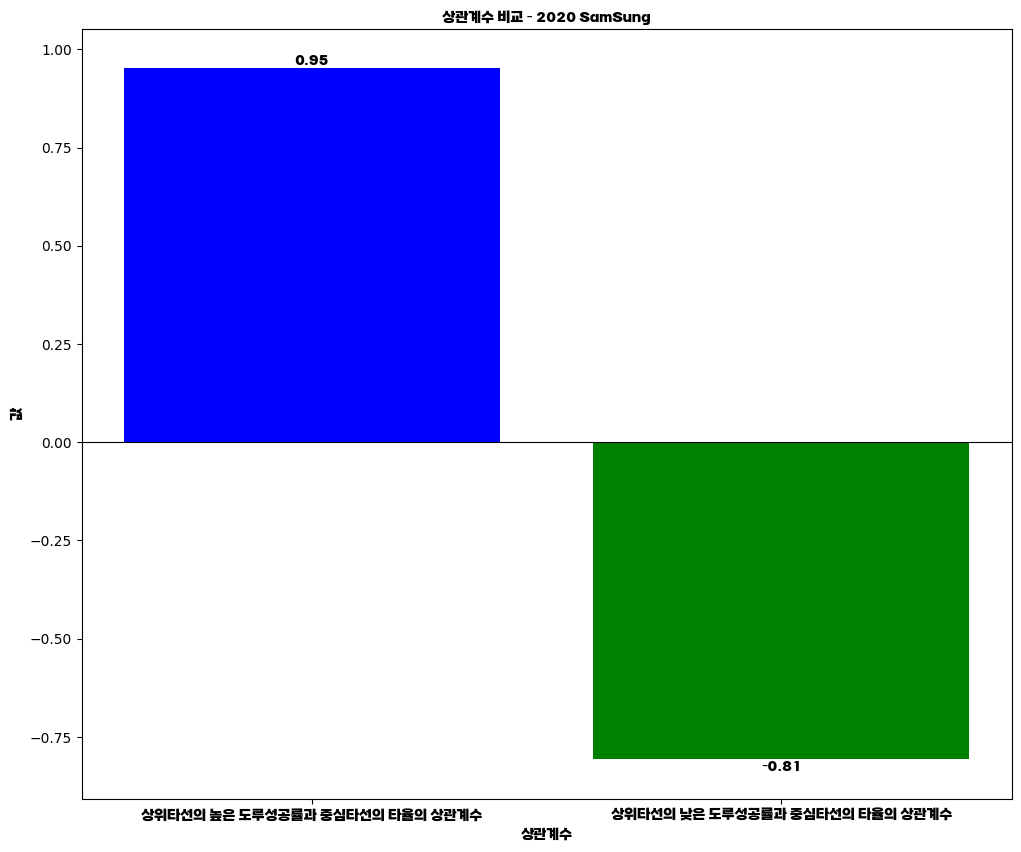

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2020 SamSung', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_2019.csv', encoding='cp949')
df2 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_hitter_detail_2019.csv', encoding='cp949')
df3 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_runner_2019.csv', encoding='cp949')
df4 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/삼성/Samsung_batting_order_2019.csv', encoding='cp949')
df3_run = df3[['선수명', '도루허용', '도루저지', '도루성공률']]

ss_2019 = df4.merge(df3_run, on='선수명')
# '타율', 도루성공률' 열을 float 타입으로 변환 (변환 불가능한 값은 NaN으로 처리)
ss_2019['타율'] = pd.to_numeric(ss_2019['타율'], errors='coerce')
ss_2019['도루성공률'] = pd.to_numeric(ss_2019['도루성공률'], errors='coerce')

ss_2019.drop(['안타', '2루타', '3루타', '홈런', '볼넷', '사구', '삼진', '병살타'], axis=1, inplace=True)
# 변환 결과 확인
ss_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      235 non-null    int64  
 1   선수명     235 non-null    object 
 2   팀명      235 non-null    object 
 3   타율      231 non-null    float64
 4   타수      235 non-null    int64  
 5   타점      235 non-null    int64  
 6   타순      235 non-null    object 
 7   도루허용    235 non-null    int64  
 8   도루저지    235 non-null    int64  
 9   도루성공률   163 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 18.5+ KB


In [ ]:
table = ss_2019[ss_2019['타순'].isin(['1번', '2번', '상위(1~2번)'])]
center = ss_2019[ss_2019['타순'].isin(['3번', '4번', '5번', '중심(3~5번)'])]
bottom = ss_2019[ss_2019['타순'].isin(['6번', '7번', '8번', '9번', '하위(6~9번)'])]
table= table.dropna(subset=['도루성공률'])
print(table.shape, center.shape, bottom.shape)



table_1 = table.nlargest(30, '도루성공률')
center_1 = center.nlargest(30, '타율')

table_2 = table.nsmallest(30, '도루성공률')
center_2 = center.nlargest(30, '타율')

# 상관계수 계산
correlation_1, p_value_1 = pearsonr(table_1['도루성공률'], center_1['타율'])

correlation_2, p_value_2 = pearsonr(table_2['도루성공률'], center_2['타율'])

print(f'상관계수: {correlation_1}, p-value: {p_value_1}') # 1-2번의 도루 성공률, 3-5번의 타율

print()
print(f'상관계수: {correlation_2}, p-value: {p_value_2}') # 1-2번의 낮은 도루 성공률, 3-5번의 타율


(38, 10) (64, 10) (127, 10)
상관계수: 0.5823735034262632, p-value: 0.0007341794148968612

상관계수: -0.8224804749365755, p-value: 2.4626382498246727e-08


<Figure size 2000x600 with 0 Axes>

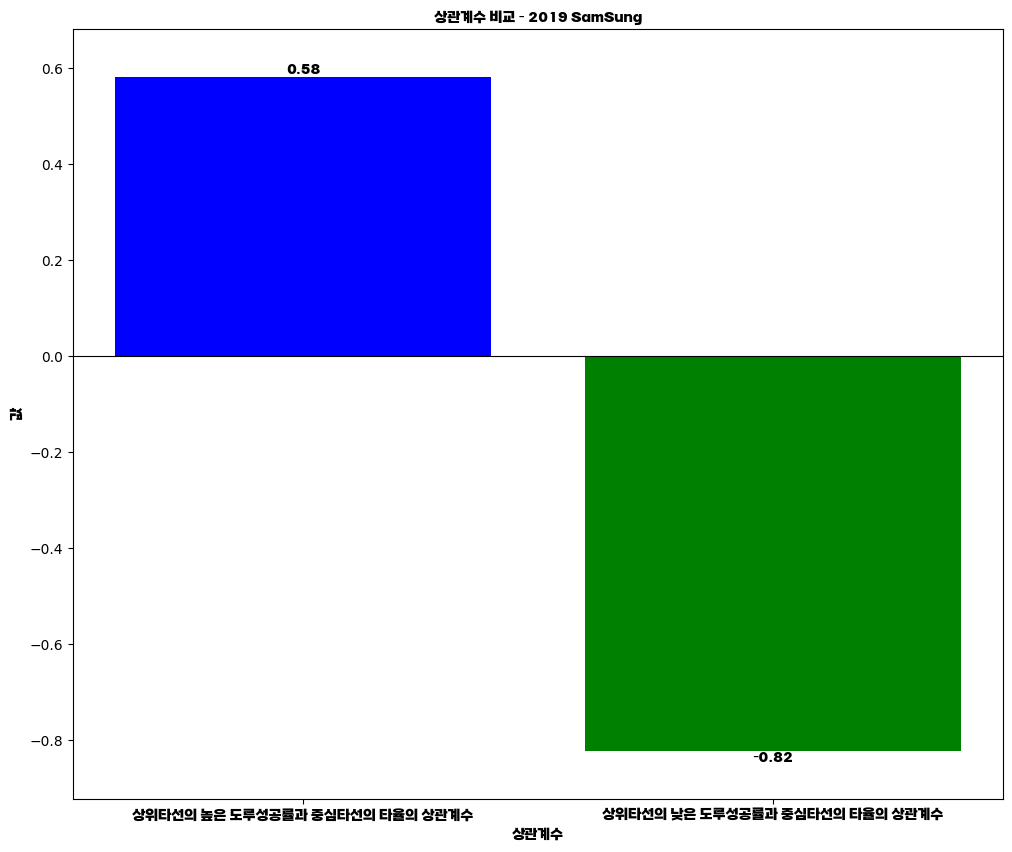

In [ ]:
# 상관관계 시각화
plt.figure(figsize=(20, 6))

# 상관계수 비교 시각화
labels = ['상위타선의 높은 도루성공률과 중심타선의 타율의 상관계수',  '상위타선의 낮은 도루성공률과 중심타선의 타율의 상관계수']
correlation_values = [correlation_1, correlation_2]

plt.figure(figsize=(12, 10))
plt.bar(labels, correlation_values, color=['blue', 'green'])
plt.title('상관계수 비교 - 2019 SamSung', fontproperties=font_prop)
plt.xlabel('상관계수', fontproperties=font_prop)
plt.ylabel('값', fontproperties=font_prop)

# x축 레이블 폰트 설정
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)
# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)
# y축 범위를 음수 값을 포함하도록 설정
plt.ylim(min(correlation_values) - 0.1, max(correlation_values) + 0.1)

# 상관계수 값을 텍스트로 표시
for i, value in enumerate(correlation_values):
    if value >= 0:
        plt.text(i, value, f'{value:.2f}', ha='center', va='bottom', fontproperties=font_prop)
    else:
        plt.text(i, value, f'{value:.2f}', ha='center', va='top', fontproperties=font_prop)

plt.show()

# KBO (상관관계수)

In [ ]:
# 각 연도별 평균 타율 데이터를 저장할 데이터프레임 생성
years = ['2019', '2020', '2021', '2022', '2023']
mean_with_high_steal_ahead = [0.735, 0.73, 0.74, 0.79, 0.74]  # 연도별 도루 능력 타자가 앞에 있을 때의 평균 타율
mean_without_high_steal_ahead = [-0.87, -0.59, -0.84, -0.85, -0.83]  # 연도별 도루 능력 타자가 앞에 없을 때의 평균 타율

# 데이터프레임 생성
data = {
    'Year': years,
    'With_High_Steal_Ahead': mean_with_high_steal_ahead,
    'Without_High_Steal_Ahead': mean_without_high_steal_ahead
}
df = pd.DataFrame(data)

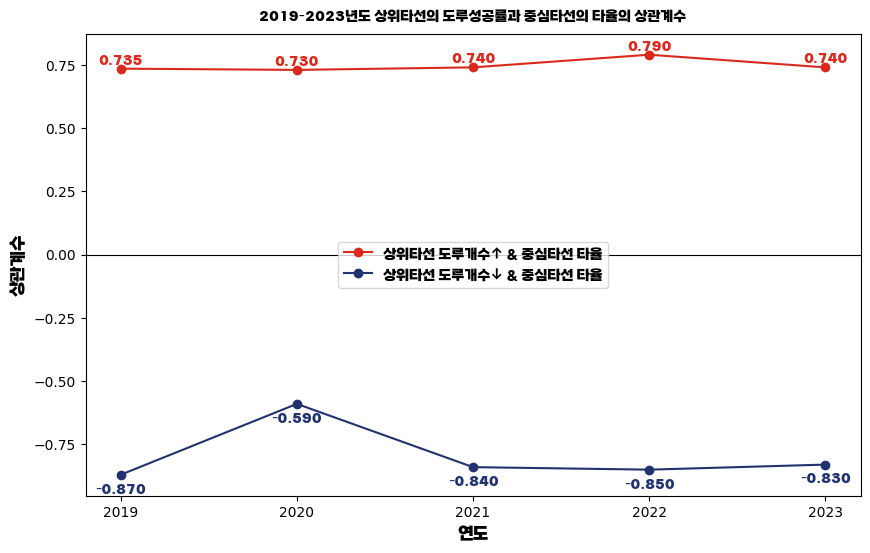

In [ ]:
# 색상 코드 설정
color1 = '#DA291C'  # 상위타선의 높은 도루성공률
color2 = '#22326E'  # 상위타선의 낮은 도루성공률

labels = ['상위타선 도루개수↑ & 중심타선 타율', '상위타선 도루개수↓ & 중심타선 타율']

# 선 그래프로 시각화
plt.figure(figsize=(10, 6))  # figsize 조정

# 각 그룹의 선을 그림
plt.plot(df['Year'], df['With_High_Steal_Ahead'], marker='o', color=color1)
plt.plot(df['Year'], df['Without_High_Steal_Ahead'], marker='o', color=color2)

# 그래프 타이틀 및 축 라벨 설정
plt.xlabel('연도', fontsize=12, fontproperties=font_prop, fontweight='bold')
plt.ylabel('상관계수', fontsize=12, fontproperties=font_prop, fontweight='bold')
plt.title('2019-2023년도 상위타선의 도루성공률과 중심타선의 타율의 상관계수', fontsize=16, fontproperties=font_prop, fontweight='bold', pad=10)

plt.legend(labels, loc='center', bbox_to_anchor=(0.5, 0.5), fontsize=50, prop=font_prop)

# x축 그리기
plt.axhline(0, color='black', linewidth=0.8)

# 선 위에 상관계수 표시
for i in range(len(df)):
    plt.text(df['Year'][i], df['With_High_Steal_Ahead'][i] + 0.02, f'{df["With_High_Steal_Ahead"][i]:.3f}', ha='center', color=color1, fontproperties=font_prop, fontweight='bold')
    plt.text(df['Year'][i], df['Without_High_Steal_Ahead'][i] - 0.07, f'{df["Without_High_Steal_Ahead"][i]:.3f}', ha='center', color=color2, fontproperties=font_prop, fontweight='bold')

plt.savefig('transparent_plot2.png', transparent=True)
plt.show()

# KBO(타율비교)

## 2023

In [ ]:
runner_df_2023 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2023.csv')
hitter_detail_df_2023 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_detail_2023.csv')
hitter_df_2023 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2023.csv')
batting_order_df_2023 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2023.csv')

In [ ]:
runner_df_2023['순위'] = runner_df_2023.groupby('팀명').cumcount() + 1
hitter_detail_df_2023['순위'] = hitter_detail_df_2023.groupby('팀명').cumcount() + 1
hitter_df_2023['순위'] = hitter_df_2023.groupby('팀명').cumcount() + 1
batting_order_df_2023['순위'] = batting_order_df_2023.groupby('팀명').cumcount() + 1

In [ ]:
# 도루성공률과 도루허용 값을 '-'를 NaN으로 변환하고 float 타입으로 변환
runner_df_2023['도루성공률'] = runner_df_2023['도루성공률'].replace('-', np.nan).astype(float)
runner_df_2023['도루허용'] = runner_df_2023['도루허용'].replace('-', np.nan).astype(float)

In [ ]:
# 도루 성공률의 중위수를 계산
median_steal_success_rate_2023 = runner_df_2023['도루성공률'].median()

# 도루 성공률이 중위수 이상인 선수들만 필터링
high_steal_candidates_med_2023 = runner_df_2023[runner_df_2023['도루성공률'] >= median_steal_success_rate_2023]

# 이 선수들 중에서 도루 허용 값의 중위수를 계산하여 기준 설정
median_stolen_bases_allowed_med_2023 = high_steal_candidates_med_2023['도루허용'].median()

# 도루 허용 값이 중위수 이상인 선수들을 도루 능력이 높은 선수로 정의
high_steal_players_med_2023 = high_steal_candidates_med_2023[high_steal_candidates_med_2023['도루허용'] >= median_stolen_bases_allowed_med_2023]['선수명'].tolist()

high_steal_players_med_2023

['박찬호',
 '김도영',
 '이창진',
 '이우성',
 '김규성',
 '최정용',
 '알포드',
 '배정대',
 '김민혁',
 '안치영',
 '조용호',
 '박민우',
 '김주원',
 '마틴',
 '손아섭',
 '김성욱',
 '최정원',
 '최지훈',
 '오태곤',
 '하재훈',
 '김성현',
 '박성한',
 '정수빈',
 '조수행',
 '허경민',
 '양의지',
 '김재호',
 '양석환',
 '김민석',
 '박승욱',
 '전준우',
 '노진혁',
 '이학주',
 '류지혁',
 '김성윤',
 '김지찬',
 '구자욱',
 '강민호',
 '김혜성',
 '도슨',
 '임병욱',
 '이원석',
 '이도윤',
 '김태연',
 '문현빈',
 '이진영']

In [ ]:
# 타순 데이터를 숫자로 변환하는 함수 정의
def extract_batting_order(order):
    if '상위' in order:
        return 1
    elif '중심' in order:
        return 3
    elif '하위' in order:
        return 6
    else:
        return int(order.replace('번', ''))

batting_order_df_2023['타순_숫자'] = batting_order_df_2023['타순'].apply(extract_batting_order)



In [ ]:
# 타자들이 도루 능력이 높은 타자['알포드', '배정대', '안치영', '조용호', '강백호', '문상철', '송민섭', '오윤석', '장준원']의 뒤에 위치한 경우와 그렇지 않은 경우로 구분
# 타순 데이터 정리 및 타순 숫자 추출 (batting_order_df)
# 도루 능력이 높은 타자가 앞 타순에 있는지 여부 판단 (is_high_steal_player_ahead)
def is_high_steal_player_ahead_2023(row):
    current_order = row['타순_숫자']
    return any(batting_order_df_2023[(batting_order_df_2023['순위'] == row['순위']) &
                                     (batting_order_df_2023['타순_숫자'] < current_order)]['선수명'].isin(high_steal_players_med_2023))

# 도루 능력이 높은 타자가 앞 타순에 있는지 여부를 새로운 컬럼에 저장
batting_order_df_2023['is_high_steal_player_ahead'] = batting_order_df_2023.apply(is_high_steal_player_ahead_2023, axis=1)

# 'is_high_steal_player_ahead' 컬럼에서 True와 False의 개수 확인
high_steal_player_ahead_counts_2023 = batting_order_df_2023['is_high_steal_player_ahead'].value_counts()
print(high_steal_player_ahead_counts_2023)

is_high_steal_player_ahead
False    1781
True      703
Name: count, dtype: int64


In [ ]:
# 타율에서 '-'를 NaN으로 변환하고 float 타입으로 변환
batting_order_df_2023['타율'] = batting_order_df_2023['타율'].replace('-', np.nan).astype(float)


In [ ]:
# 타율 그룹 나누기 (도루 능력 타자가 앞에 있는 경우와 없는 경우)
group_with_high_steal_ahead_2023 = batting_order_df_2023[batting_order_df_2023['is_high_steal_player_ahead']]['타율']
group_without_high_steal_ahead_2023 = batting_order_df_2023[~batting_order_df_2023['is_high_steal_player_ahead']]['타율']


In [ ]:
# t-검정 수행
t_stat_2023, p_value_2023 = ttest_ind(group_with_high_steal_ahead_2023.dropna(), group_without_high_steal_ahead_2023.dropna())

# 2023년 데이터에 대한 t-검정 결과 출력
t_test_results_2023 = f"t-Statistic: {t_stat_2023}, p-Value: {p_value_2023}"
print(t_test_results_2023)

t-Statistic: 7.39774097249908, p-Value: 1.8964125602587687e-13


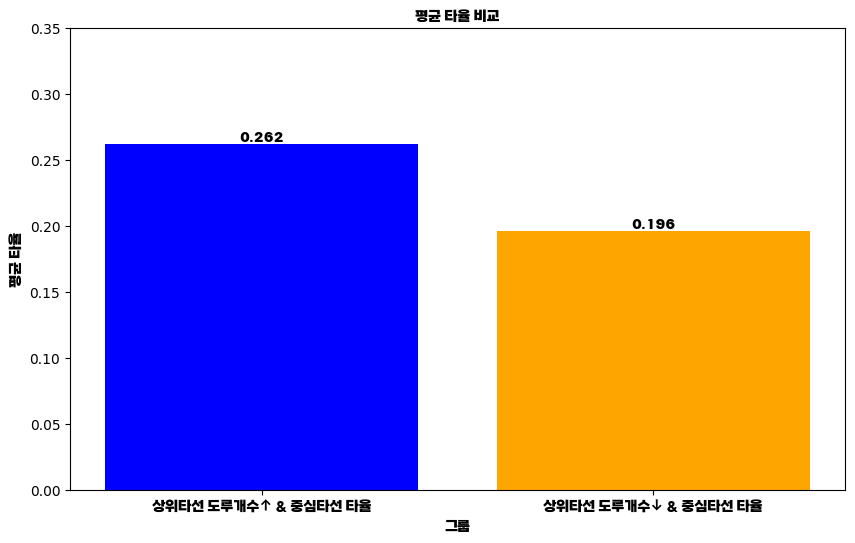

In [ ]:
# 두 그룹의 평균 타율을 바 그래프로 시각화
mean_with_high_steal_ahead_2023 = group_with_high_steal_ahead_2023.mean()
mean_without_high_steal_ahead_2023 = group_without_high_steal_ahead_2023.mean()

# 바 그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(['도루 능력 타자 앞', '도루 능력 타자 없음'],
               [ group_with_high_steal_ahead_2023.mean(), group_without_high_steal_ahead_2023.mean()], color=['blue', 'orange'])
plt.title('평균 타율 비교', fontproperties=font_prop)
plt.xlabel('그룹', fontproperties=font_prop)
plt.ylabel('평균 타율', fontproperties=font_prop)
plt.ylim(0, 0.35)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2022

In [ ]:
runner_df_2022 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2022.csv')
hitter_detail_df_2022 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_detail_2022.csv')
hitter_df_2022 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2022.csv')
batting_order_df_2022 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2022.csv')

In [ ]:
runner_df_2022['순위'] = runner_df_2022.groupby('팀명').cumcount() + 1
hitter_detail_df_2022['순위'] = hitter_detail_df_2022.groupby('팀명').cumcount() + 1
hitter_df_2022['순위'] = hitter_df_2022.groupby('팀명').cumcount() + 1
batting_order_df_2022['순위'] = batting_order_df_2022.groupby('팀명').cumcount() + 1


# 도루성공률과 도루허용 값을 '-'를 NaN으로 변환하고 float 타입으로 변환
runner_df_2022['도루성공률'] = runner_df_2022['도루성공률'].replace('-', np.nan).astype(float)
runner_df_2022['도루허용'] = runner_df_2022['도루허용'].replace('-', np.nan).astype(float)


# 도루 성공률의 중위수를 계산
median_steal_success_rate_2022 = runner_df_2022['도루성공률'].median()

# 도루 성공률이 중위수 이상인 선수들만 필터링
high_steal_candidates_med_2022 = runner_df_2022[runner_df_2022['도루성공률'] >= median_steal_success_rate_2022]

# 이 선수들 중에서 도루 허용 값의 중위수를 계산하여 기준 설정
median_stolen_bases_allowed_med_2022 = high_steal_candidates_med_2022['도루허용'].median()

# 도루 허용 값이 중위수 이상인 선수들을 도루 능력이 높은 선수로 정의
high_steal_players_med_2022 = high_steal_candidates_med_2022[high_steal_candidates_med_2022['도루허용'] >= median_stolen_bases_allowed_med_2022]['선수명'].tolist()

high_steal_players_med_2022


['박찬호',
 '김도영',
 '김선빈',
 '나성범',
 '심우준',
 '배정대',
 '알포드',
 '권동진',
 '홍현빈',
 '박해민',
 '오지환',
 '홍창기',
 '서건창',
 '문보경',
 '가르시아',
 '박민우',
 '김기환',
 '마티니',
 '김주원',
 '박준영',
 '최지훈',
 '추신수',
 '오태곤',
 '조수행',
 '허경민',
 '강진성',
 '안재석',
 '박승욱',
 '안치홍',
 '장두성',
 '정훈',
 '김지찬',
 '피렐라',
 '구자욱',
 '김성윤',
 '김재혁',
 '김혜성',
 '이용규',
 '이정후',
 '하주석',
 '노수광',
 '노시환',
 '박정현']

In [ ]:
# 타순 숫자 추출 함수 정의
def extract_batting_order(order):
    if '상위' in order:
        return 1
    elif '중심' in order:
        return 3
    elif '하위' in order:
        return 6
    else:
        return int(order.replace('번', ''))

batting_order_df_2022['타순_숫자'] = batting_order_df_2022['타순'].apply(extract_batting_order)

In [ ]:
# 도루 능력이 높은 타자가 바로 앞 타순에 있는지를 확인하는 함수 정의
# 타자들이 도루 능력이 높은 타자['심우준', '알포드', '권동진', '홍현빈', '김준태', '라모스', '이시원']의 뒤에 위치한 경우와 그렇지 않은 경우로 구분
# 타순 데이터 정리 및 타순 숫자 추출 (batting_order_df)
# 도루 능력이 높은 타자가 앞 타순에 있는지 여부 판단 (is_high_steal_player_ahead)
def is_high_steal_player_ahead_2022(row):
    current_order = row['타순_숫자']
    return any(batting_order_df_2022[(batting_order_df_2022['순위'] == row['순위']) &
                                     (batting_order_df_2022['타순_숫자'] < current_order)]['선수명'].isin(high_steal_players_med_2022))

# 도루 능력이 높은 타자가 앞 타순에 있는지 여부를 새로운 컬럼에 저장
batting_order_df_2022['is_high_steal_player_ahead'] = batting_order_df_2022.apply(is_high_steal_player_ahead_2022, axis=1)

# 'is_high_steal_player_ahead' 컬럼에서 True와 False의 개수 확인
high_steal_player_ahead_counts_2022 = batting_order_df_2022['is_high_steal_player_ahead'].value_counts()
print(high_steal_player_ahead_counts_2022)

is_high_steal_player_ahead
False    1804
True      568
Name: count, dtype: int64


In [ ]:
# 타율에서 '-'를 NaN으로 변환하고 float 타입으로 변환
batting_order_df_2022['타율'] = batting_order_df_2022['타율'].replace('-', np.nan).astype(float)


In [ ]:
# 타율 그룹 나누기 (도루 능력 타자가 앞에 있는 경우와 없는 경우)
group_with_high_steal_ahead_2022 = batting_order_df_2022[batting_order_df_2022['is_high_steal_player_ahead']]['타율']
group_without_high_steal_ahead_2022 = batting_order_df_2022[~batting_order_df_2022['is_high_steal_player_ahead']]['타율']


In [ ]:
# t-검정 수행
t_stat_2022, p_value_2022 = ttest_ind(group_with_high_steal_ahead_2022.dropna(), group_without_high_steal_ahead_2022.dropna())

# 2022년 데이터에 대한 t-검정 결과 출력
t_test_results_2022 = f"t-Statistic: {t_stat_2022}, p-Value: {p_value_2022}"
print(t_test_results_2022)

t-Statistic: 4.728782583732287, p-Value: 2.3933022867753346e-06


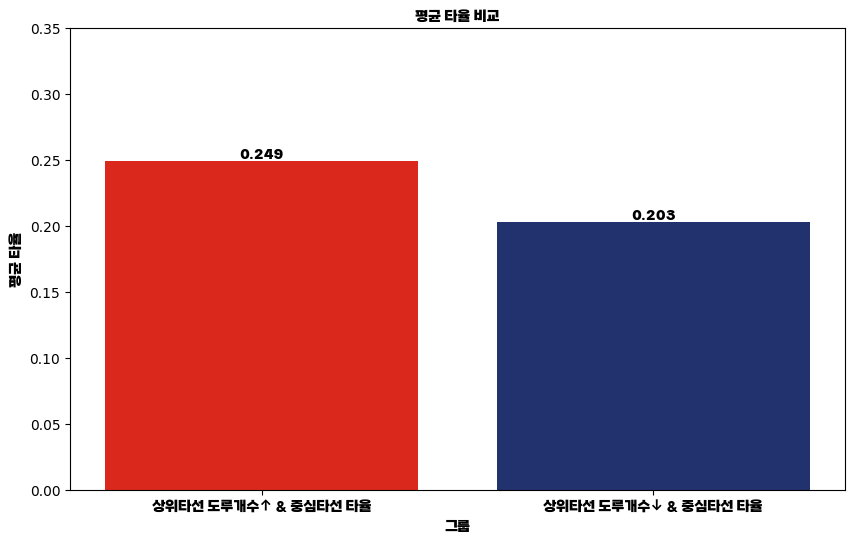

In [ ]:
# 두 그룹의 평균 타율을 바 그래프로 시각화
mean_with_high_steal_ahead_2022 = group_with_high_steal_ahead_2022.mean()
mean_without_high_steal_ahead_2022 = group_without_high_steal_ahead_2022.mean()

# 바 그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(['도루 능력 타자 앞', '도루 능력 타자 없음'],
               [ group_with_high_steal_ahead_2022.mean(), group_without_high_steal_ahead_2022.mean()], color=[color1,color2])
plt.title('평균 타율 비교', fontproperties=font_prop)
plt.xlabel('그룹', fontproperties=font_prop)
plt.ylabel('평균 타율', fontproperties=font_prop)
plt.ylim(0, 0.35)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2021

In [ ]:
runner_df_2021 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2021.csv')
hitter_detail_df_2021 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_detail_2021.csv')
hitter_df_2021 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2021.csv')
batting_order_df_2021 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2021.csv')

In [ ]:
runner_df_2021['순위'] = runner_df_2021.groupby('팀명').cumcount() + 1
hitter_detail_df_2021['순위'] = hitter_detail_df_2021.groupby('팀명').cumcount() + 1
hitter_df_2021['순위'] = hitter_df_2021.groupby('팀명').cumcount() + 1
batting_order_df_2021['순위'] = batting_order_df_2021.groupby('팀명').cumcount() + 1

In [ ]:
# 도루성공률과 도루허용 값을 '-'를 NaN으로 변환하고 float 타입으로 변환
runner_df_2021['도루성공률'] = runner_df_2021['도루성공률'].replace('-', np.nan).astype(float)
runner_df_2021['도루허용'] = runner_df_2021['도루허용'].replace('-', np.nan).astype(float)

In [ ]:
# 도루 성공률의 중위수를 계산
median_steal_success_rate_2021 = runner_df_2021['도루성공률'].median()

# 도루 성공률이 중위수 이상인 선수들만 필터링
high_steal_candidates_med_2021 = runner_df_2021[runner_df_2021['도루성공률'] >= median_steal_success_rate_2021]

# 이 선수들 중에서 도루 허용 값의 중위수를 계산하여 기준 설정
median_stolen_bases_allowed_med_2021 = high_steal_candidates_med_2021['도루허용'].median()

# 도루 허용 값이 중위수 이상인 선수들을 도루 능력이 높은 선수로 정의
high_steal_players_med_2021 = high_steal_candidates_med_2021[high_steal_candidates_med_2021['도루허용'] >= median_stolen_bases_allowed_med_2021]['선수명'].tolist()


In [ ]:
high_steal_players_med_2021

['최원준',
 '박찬호',
 '이창진',
 '김호령',
 '배정대',
 '심우준',
 '송민섭',
 '황재균',
 '강백호',
 '김민혁',
 '호잉',
 '오윤석',
 '김병희',
 '홍창기',
 '서건창',
 '오지환',
 '김용의',
 '이영빈',
 '이재원',
 '채은성',
 '김현수',
 '문보경',
 '이형종',
 '알테어',
 '김기환',
 '박민우',
 '강진성',
 '김주원',
 '이명기',
 '정진기',
 '최지훈',
 '추신수',
 '박성한',
 '오태곤',
 '김성현',
 '안상현',
 '조수행',
 '박건우',
 '강승호',
 '박세혁',
 '박지훈',
 '안권수',
 '정훈',
 '김재유',
 '전준우',
 '장두성',
 '신윤후',
 '박해민',
 '구자욱',
 '김지찬',
 '김상수',
 '김혜성',
 '이용규',
 '이정후',
 '박정음',
 '이지영',
 '전병우',
 '하주석',
 '노수광',
 '김민하',
 '노시환',
 '이원석',
 '정진호',
 '강상원']

In [ ]:
# 타순 데이터를 숫자로 변환하는 함수 정의
def extract_batting_order(order):
    if '상위' in order:
        return 1
    elif '중심' in order:
        return 3
    elif '하위' in order:
        return 6
    else:
        return int(order.replace('번', ''))

batting_order_df_2021['타순_숫자'] = batting_order_df_2021['타순'].apply(extract_batting_order)



In [ ]:
# 도루 능력이 높은 타자가 바로 앞 타순에 있는지를 확인하는 함수 정의
# 도루 능력이 높은 타자가 바로 앞 타순에 있는지를 확인하는 함수 정의
# 타자들이 도루 능력이 높은 타자['송민섭', '황재균', '오윤석', '김병희', '문상철', '김건형', '김태훈', '박승욱', '알몬테', '유한준', '천성호']의 바로 뒤에 위치한 경우와 그렇지 않은 경우로 구분
# 타순 데이터 정리 및 타순 숫자 추출 (batting_order_df)
# 도루 능력이 높은 타자가 앞 타순에 있는지 여부 판단 (is_high_steal_player_ahead)
def is_high_steal_player_ahead_2021(row):
    current_order = row['타순_숫자']
    return any(batting_order_df_2021[(batting_order_df_2021['순위'] == row['순위']) &
                                     (batting_order_df_2021['타순_숫자'] < current_order)]['선수명'].isin(high_steal_players_med_2021))

# 도루 능력이 높은 타자가 앞 타순에 있는지 여부를 새로운 컬럼에 저장
batting_order_df_2021['is_high_steal_player_ahead'] = batting_order_df_2021.apply(is_high_steal_player_ahead_2021, axis=1)


In [ ]:
# 'is_high_steal_player_ahead' 컬럼에서 True와 False의 개수 확인
high_steal_player_ahead_counts_2021 = batting_order_df_2021['is_high_steal_player_ahead'].value_counts()
print(high_steal_player_ahead_counts_2021)


is_high_steal_player_ahead
False    1541
True      862
Name: count, dtype: int64


In [ ]:
# 타율에서 '-'를 NaN으로 변환하고 float 타입으로 변환
batting_order_df_2021['타율'] = batting_order_df_2021['타율'].replace('-', np.nan).astype(float)


In [ ]:
# 타율 그룹 나누기 (도루 능력 타자가 앞에 있는 경우와 없는 경우)
group_with_high_steal_ahead_2021 = batting_order_df_2021[batting_order_df_2021['is_high_steal_player_ahead']]['타율']
group_without_high_steal_ahead_2021 = batting_order_df_2021[~batting_order_df_2021['is_high_steal_player_ahead']]['타율']

In [ ]:
# t-검정 수행
t_stat_2021, p_value_2021 = ttest_ind(group_with_high_steal_ahead_2021.dropna(), group_without_high_steal_ahead_2021.dropna())


In [ ]:
# 2021년 데이터에 대한 t-검정 결과 출력
t_test_results_2021 = f"t-Statistic: {t_stat_2021}, p-Value: {p_value_2021}"
print(t_test_results_2021)


t-Statistic: 7.966331238182177, p-Value: 2.520814904501345e-15


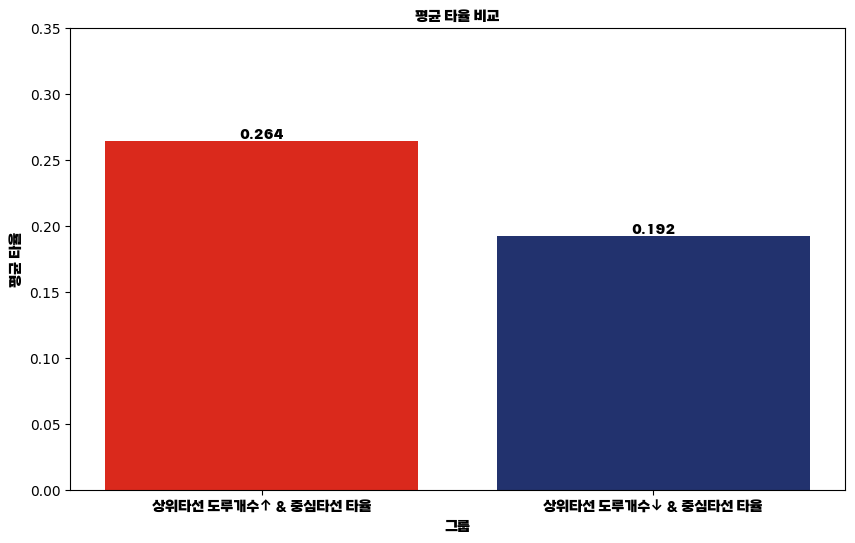

In [ ]:
# 두 그룹의 평균 타율을 바 그래프로 시각화
mean_with_high_steal_ahead_2021 = group_with_high_steal_ahead_2021.mean()
mean_without_high_steal_ahead_2021 = group_without_high_steal_ahead_2021.mean()

# 바 그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(['도루 능력 타자 앞', '도루 능력 타자 없음'],
               [group_with_high_steal_ahead_2021.mean(), group_without_high_steal_ahead_2021.mean()], color=[color1, color2])
plt.title('평균 타율 비교', fontproperties=font_prop)
plt.xlabel('그룹', fontproperties=font_prop)
plt.ylabel('평균 타율', fontproperties=font_prop)
plt.ylim(0, 0.35)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)


# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2020

In [ ]:
runner_df_2020 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2020.csv')
hitter_detail_df_2020 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_detail_2020.csv')
hitter_df_2020 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2020.csv')
batting_order_df_2020 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2020.csv')

In [ ]:
runner_df_2020['순위'] = runner_df_2020.groupby('팀명').cumcount() + 1
hitter_detail_df_2020['순위'] = hitter_detail_df_2020.groupby('팀명').cumcount() + 1
hitter_df_2020['순위'] = hitter_df_2020.groupby('팀명').cumcount() + 1
batting_order_df_2020['순위'] = batting_order_df_2020.groupby('팀명').cumcount() + 1

In [ ]:
runner_df_2020['도루성공률'] = runner_df_2020['도루성공률'].replace('-', np.nan).astype(float)
runner_df_2020['도루허용'] = runner_df_2020['도루허용'].replace('-', np.nan).astype(float)


In [ ]:
# 도루 성공률의 중위수를 계산
median_steal_success_rate_2020 = runner_df_2020['도루성공률'].median()

# 도루 성공률이 중위수 이상인 선수들만 필터링
high_steal_candidates_med_2020 = runner_df_2020[runner_df_2020['도루성공률'] >= median_steal_success_rate_2020]

# 이 선수들 중에서 도루 허용 값의 중위수를 계산하여 기준 설정
median_stolen_bases_allowed_med_2020 = high_steal_candidates_med_2020['도루허용'].median()

# 도루 허용 값이 중위수 이상인 선수들을 도루 능력이 높은 선수로 정의
high_steal_players_med_2020 = high_steal_candidates_med_2020[high_steal_candidates_med_2020['도루허용'] >= median_stolen_bases_allowed_med_2020]['선수명'].tolist()



high_steal_players_med_2020

['최원준',
 '심우준',
 '조용호',
 '김민혁',
 '강백호',
 '박승욱',
 '오지환',
 '홍창기',
 '신민재',
 '김용의',
 '정근우',
 '손호영',
 '알테어',
 '박민우',
 '김성욱',
 '강진성',
 '양의지',
 '최지훈',
 '오태곤',
 '최정',
 '김창평',
 '정진기',
 '정수빈',
 '허경민',
 '이유찬',
 '오재원',
 '박건우',
 '김재호',
 '김재환',
 '마차도',
 '안치홍',
 '정훈',
 '김동한',
 '김재유',
 '손아섭',
 '박해민',
 '김지찬',
 '구자욱',
 '김상수',
 '살라디노',
 '이학주',
 '박찬도',
 '김혜성',
 '서건창',
 '김하성',
 '이정후',
 '박정음',
 '전병우',
 '박준태',
 '이용규']

In [ ]:
import re

def extract_batting_order(order):
    if '상위' in order:
        return 1
    elif '중심' in order:
        return 3
    elif '하위' in order:
        return 6
    else:
        # 숫자만 추출
        match = re.search(r'\d+', order)
        if match:
            return int(match.group())
        else:
            return None  # 혹은 적절한 기본값

batting_order_df_2020['타순_숫자'] = batting_order_df_2020['타순'].apply(extract_batting_order)

In [ ]:
def is_high_steal_player_ahead_2020(row):
    current_order = row['타순_숫자']
    return any(batting_order_df_2020[(batting_order_df_2020['순위'] == row['순위']) &
                                     (batting_order_df_2020['타순_숫자'] < current_order)]['선수명'].isin(high_steal_players_med_2020))

# 도루 능력이 높은 타자가 앞 타순에 있는지 여부를 새로운 컬럼에 저장
batting_order_df_2020['is_high_steal_player_ahead'] = batting_order_df_2020.apply(is_high_steal_player_ahead_2020, axis=1)

# 'is_high_steal_player_ahead' 컬럼에서 True와 False의 개수 확인
high_steal_player_ahead_counts_2020 = batting_order_df_2020['is_high_steal_player_ahead'].value_counts()
print(high_steal_player_ahead_counts_2020)

is_high_steal_player_ahead
False    1702
True      770
Name: count, dtype: int64


In [ ]:
# 타율에서 '-'를 NaN으로 변환하고 float 타입으로 변환
batting_order_df_2020['타율'] = batting_order_df_2020['타율'].replace('-', np.nan).astype(float)


In [ ]:
# 타율 그룹 나누기 (도루 능력 타자가 앞에 있는 경우와 없는 경우)
group_with_high_steal_ahead_2020 = batting_order_df_2020[batting_order_df_2020['is_high_steal_player_ahead']]['타율']
group_without_high_steal_ahead_2020 = batting_order_df_2020[~batting_order_df_2020['is_high_steal_player_ahead']]['타율']


In [ ]:
# t-검정 수행
t_stat_2020, p_value_2020 = ttest_ind(group_with_high_steal_ahead_2020.dropna(), group_without_high_steal_ahead_2020.dropna())


# 2020년 데이터에 대한 t-검정 결과 출력
t_test_results_2020 = f"t-Statistic: {t_stat_2020}, p-Value: {p_value_2020}"
print(t_test_results_2020)


t-Statistic: 4.9933611559253155, p-Value: 6.354781858245342e-07


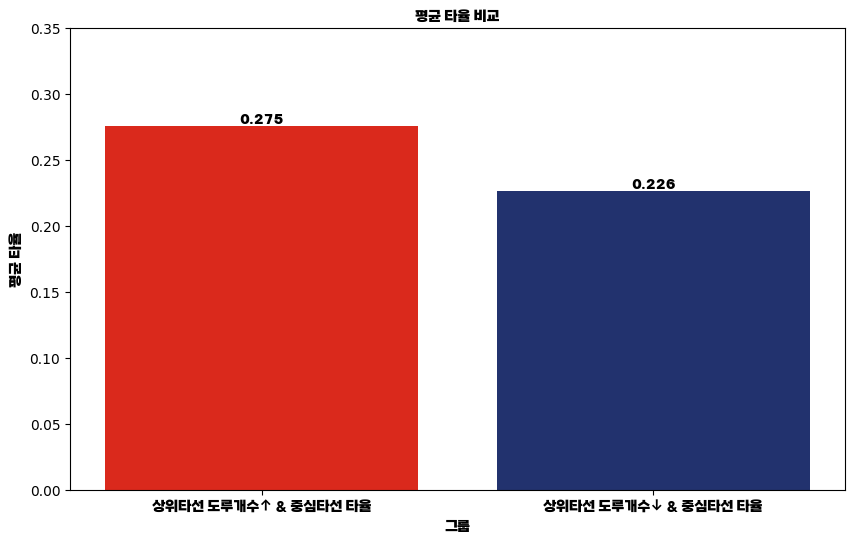

In [ ]:
# 두 그룹의 평균 타율을 바 그래프로 시각화
mean_with_high_steal_ahead_2020 = group_with_high_steal_ahead_2020.mean()
mean_without_high_steal_ahead_2020 = group_without_high_steal_ahead_2020.mean()

# 바 그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(['도루 능력 타자 앞', '도루 능력 타자 없음'],
               [ group_with_high_steal_ahead_2020.mean(), group_without_high_steal_ahead_2020.mean()], color=[color1, color2])
plt.title('평균 타율 비교', fontproperties=font_prop)
plt.xlabel('그룹', fontproperties=font_prop)
plt.ylabel('평균 타율', fontproperties=font_prop)
plt.ylim(0, 0.35)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

## 2019

In [ ]:
runner_df_2019 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_runner_2019.csv')
hitter_detail_df_2019 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_detail_2019.csv')
hitter_df_2019 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_hitter_2019.csv')
batting_order_df_2019 = pd.read_csv('/content/drive/MyDrive/DATATHON/data/@KBO_10개구단/KBO_batting_order_2019.csv')

In [ ]:
runner_df_2019['순위'] = runner_df_2019.groupby('팀명').cumcount() + 1
hitter_detail_df_2019['순위'] = hitter_detail_df_2019.groupby('팀명').cumcount() + 1
hitter_df_2019['순위'] = hitter_df_2019.groupby('팀명').cumcount() + 1
batting_order_df_2019['순위'] = batting_order_df_2019.groupby('팀명').cumcount() + 1

In [ ]:
# 도루성공률과 도루허용 값을 '-'를 NaN으로 변환하고 float 타입으로 변환
runner_df_2019['도루성공률'] = runner_df_2019['도루성공률'].replace('-', np.nan).astype(float)
runner_df_2019['도루허용'] = runner_df_2019['도루허용'].replace('-', np.nan).astype(float)

In [ ]:
# 도루 성공률의 중위수를 계산
# 도루 성공률이 이 중위수 값 이상인 선수들을 선택
median_steal_success_rate = runner_df_2019['도루성공률'].median()

# 도루 성공률이 중위수 이상인 선수들만 필터링
high_steal_candidates_med = runner_df_2019[runner_df_2019['도루성공률'] >= median_steal_success_rate]

# 도루 허용 값의 중위수를 계산하여 기준 설정
median_stolen_bases_allowed_med = high_steal_candidates_med['도루허용'].median()

# 도루 허용 값이 중위수 이상인 선수들을 도루 능력이 높은 선수로 정의
high_steal_players_med_2019 = high_steal_candidates_med[high_steal_candidates_med['도루허용'] >= median_stolen_bases_allowed_med]['선수명'].tolist()


high_steal_players_med_2019

['박찬호',
 '최원준',
 '심우준',
 '김민혁',
 '오태곤',
 '오지환',
 '이천웅',
 '정주현',
 '김용의',
 '박민우',
 '이명기',
 '김태진',
 '이상호',
 '최승민',
 '고종욱',
 '노수광',
 '김재현',
 '안상현',
 '김성현',
 '로맥',
 '정수빈',
 '류지혁',
 '박건우',
 '허경민',
 '박세혁',
 '오재원',
 '이유찬',
 '정진호',
 '민병헌',
 '전준우',
 '강로한',
 '박해민',
 '김상수',
 '이학주',
 '구자욱',
 '러프',
 '박계범',
 '김하성',
 '김혜성',
 '서건창',
 '임병욱',
 '이지영',
 '호잉',
 '정은원',
 '장진혁',
 '송광민',
 '이성열',
 '오선진',
 '김민하']

In [ ]:
# 타순 숫자 추출 함수 정의
def extract_batting_order(order):
    if '상위' in order:
        return 1
    elif '중심' in order:
        return 3
    elif '하위' in order:
        return 6
    else:
        return int(order.replace('번', ''))

batting_order_df_2019['타순_숫자'] = batting_order_df_2019['타순'].apply(extract_batting_order)

In [ ]:
# 도루 능력이 높은 타자가 바로 앞 타순에 있는지를 확인하는 함수 정의
# 타자들이 도루 능력이 높은 타자['심우준', '김민혁', '오태곤', '강백호']의 바로 뒤에 위치한 경우와 그렇지 않은 경우로 구분
# 타순 데이터 정리 및 타순 숫자 추출 (batting_order_df)
# 도루 능력이 높은 타자가 앞 타순에 있는지 여부 판단 (is_high_steal_player_ahead)
def is_high_steal_player_ahead_2019(row):
    current_order = row['타순_숫자']
    return any(batting_order_df_2019[(batting_order_df_2019['순위'] == row['순위']) &
                                     (batting_order_df_2019['타순_숫자'] < current_order)]['선수명'].isin(high_steal_players_med_2019))

# 도루 능력이 높은 타자가 앞 타순에 있는지 여부를 새로운 컬럼에 저장
batting_order_df_2019['is_high_steal_player_ahead'] = batting_order_df_2019.apply(is_high_steal_player_ahead_2019, axis=1)

In [ ]:
# 'is_high_steal_player_ahead' 컬럼에서 True와 False의 개수 확인
high_steal_player_ahead_counts_2019 = batting_order_df_2019['is_high_steal_player_ahead'].value_counts()

high_steal_player_ahead_counts_2019

is_high_steal_player_ahead
False    1548
True      762
Name: count, dtype: int64

In [ ]:
batting_order_df_2019['타율'] = batting_order_df_2019['타율'].replace('-', np.nan).astype(float)

In [ ]:
# 타율 그룹 나누기 (도루 능력 타자가 앞에 있는 경우와 없는 경우)
group_with_high_steal_ahead_2019 = batting_order_df_2019[batting_order_df_2019['is_high_steal_player_ahead']]['타율']
group_without_high_steal_ahead_2019 = batting_order_df_2019[~batting_order_df_2019['is_high_steal_player_ahead']]['타율']


In [ ]:
# t-검정 수행
t_stat_2019, p_value_2019 = ttest_ind(group_with_high_steal_ahead_2019.dropna(), group_without_high_steal_ahead_2019.dropna())


In [ ]:
# 2019년 데이터에 대한 t-검정 결과 출력
t_test_results_2019 = f"t-Statistic: {t_stat_2019}, p-Value: {p_value_2019}"
print(t_test_results_2019)

t-Statistic: 3.914698073629652, p-Value: 9.319186116073941e-05


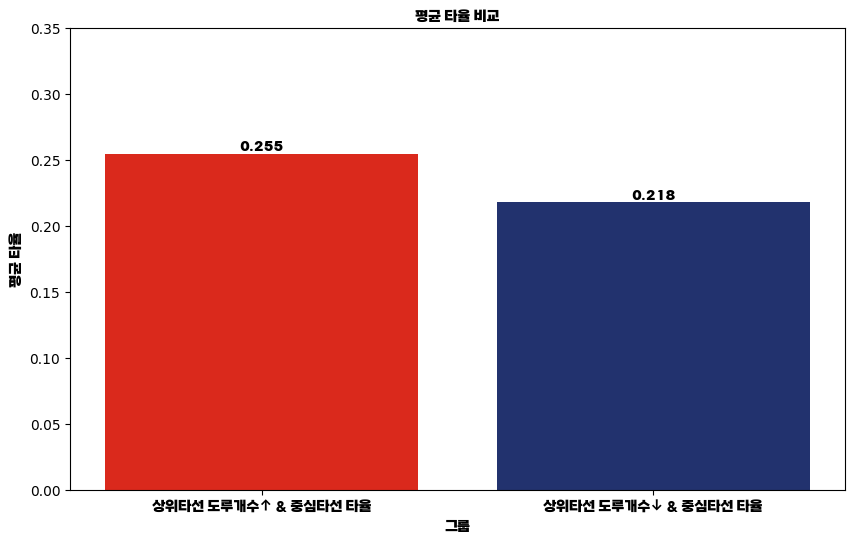

In [ ]:
# 두 그룹의 평균 타율을 바 그래프로 시각화
mean_with_high_steal_ahead_2019 = group_with_high_steal_ahead_2019.mean()
mean_without_high_steal_ahead_2019 = group_without_high_steal_ahead_2019.mean()

# 바 그래프로 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
bars = plt.bar(['도루 능력 타자 앞', '도루 능력 타자 없음'],
               [ group_with_high_steal_ahead_2019.mean(), group_without_high_steal_ahead_2019.mean()], color=[color1, color2])
plt.title('평균 타율 비교', fontproperties=font_prop)
plt.xlabel('그룹', fontproperties=font_prop)
plt.ylabel('평균 타율', fontproperties=font_prop)
plt.ylim(0, 0.35)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontproperties=font_prop)

# 바 위에 숫자 표시
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.3f}', ha='center', va='bottom', fontproperties=font_prop)

plt.show()

# KBO (타율비교) 시각화

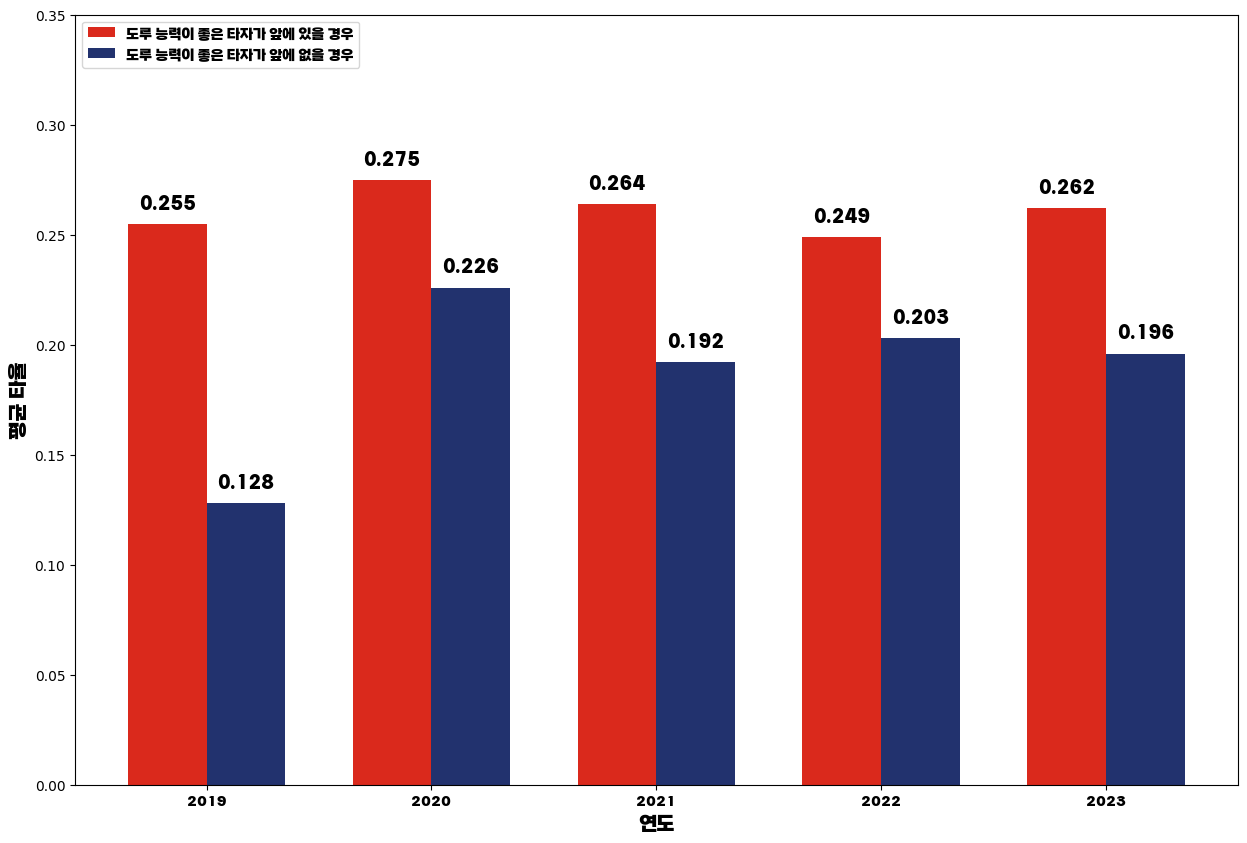

In [ ]:
# 데이터프레임 생성
years = ['2019', '2020', '2021', '2022', '2023']
mean_with_high_steal_ahead = [0.255, 0.275, 0.264, 0.249, 0.262]  # 연도별 도루 능력 타자가 앞에 있을 때의 평균 타율
mean_without_high_steal_ahead = [0.128, 0.226, 0.192, 0.203, 0.196]  # 연도별 도루 능력 타자가 앞에 없을 때의 평균 타율

data = {
    'Year': years,
    'With_High_Steal_Ahead': mean_with_high_steal_ahead,
    'Without_High_Steal_Ahead': mean_without_high_steal_ahead
}
df = pd.DataFrame(data)

# 색상 정의
color1 = '#DA291C'  # 빨간색
color2 = '#22326E'  # 파란색

# 바 차트로 시각화
plt.figure(figsize=(15,10))
bar_width = 0.35
index = np.arange(len(df['Year']))

# 각 그룹의 바를 그림
bars1 = plt.bar(index, df['With_High_Steal_Ahead'], bar_width, label='도루 능력이 좋은 타자가 앞에 있을 경우', color=color1)
bars2 = plt.bar(index + bar_width, df['Without_High_Steal_Ahead'], bar_width, label='도루 능력이 좋은 타자가 앞에 없을 경우', color=color2)

# 그래프 타이틀 및 축 라벨 설정
plt.xlabel('연도', fontsize=14, fontproperties=font_prop)
plt.ylabel('평균 타율', fontsize=14, fontproperties=font_prop)
plt.xticks(index + bar_width / 2, df['Year'], fontsize=12, fontproperties=font_prop)
plt.ylim(0, 0.35)  # 타율의 범위를 지정
plt.legend(fontsize=12, loc='upper left', prop=font_prop)

# 바 위에 평균 타율 표시
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=13, fontproperties=font_prop)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.005, f'{height:.3f}', ha='center', va='bottom', fontsize=13, fontproperties=font_prop)

# 그래프를 투명 배경으로 저장
plt.savefig('transparent_plot.png', transparent=True)
plt.show()